<a href="https://www.kaggle.com/code/hanpat99/2-eda-bcg-powerco-churn-problem?scriptVersionId=131114716" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# BCG - PowerCo customer churn problem : Forage Project



# 1. Background
This [challenge](https://www.theforage.com/virtual-internships/prototype/Tcz8gTtprzAS4xSoK/Data-Science-?ref=D7dEe4AjnkT7G8uPb) is about predicting the customer churn of one of BCG's clients called PowerCo. PowerCo is a leader, specializing in gas and electricity distribution to residential neighburhoods and SMEs. Due to liberalization policies in the power sector, many companies are being forced to reduce their long-run average costs in order to remain competitive in the market. They want a new, viable and effective pricing stategy to combat customer churn. PowerCo wants to explore the possibility of a 20% discounted rate preventing customer churn and have commissioned BCG to test this hypothesis. They also want us to define and assess customer's price sensitivity.

# 2. [Problem Statement](https://www.theforage.com/virtual-internships/prototype/Tcz8gTtprzAS4xSoK/Data-Science-?ref=D7dEe4AjnkT7G8uPb) from BCG Gamma:

## TASK 1: Business Understanding & Hypothesis Framing


## TASK 2: Exploratory Data Analysis (current task)

BCG Gamma has been given the following sub-tasks to carry-out in this step.

## Sub-Task 1:

Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions. This first subtask is for you to gain a holistic understanding of the dataset. You should spend around 1 hour on this.

## Sub-Task 2:

Verify the hypothesis of price sensitivity being to some extent correlated with churn. It is up to you to define price sensitivity and calculate it. You should spend around 30 minutes on this.


## Sub-Task 3:

Prepare a half-page summary or slide of key findings and add some suggestions for data augmentation – which other sources of data should the client provide you with and which open source datasets might be useful? You should spend 10-15 minutes on this.

For your final deliverable, please submit your analysis (in the form of a jupyter notebook, code script or PDF) as well as your half-page summary document.

**Note:** Use the 2 datasets within the additional resources for this task and if you’re unsure on where to start with visualizing data, use the accompanying links. Be sure to also use the data description document to understand what the columns represent. The task description document outlines the higher-level motivation of the project. Finally, use the eda_starter.ipynb file to get started with some helper functions and methods.

If you are stuck: Think about ways you can define price sensitivity. Make sure to think of all possible ways and investigate them.

Estimated time for task completion: 1.75 hours depending on your learning style.

# 3. Workflow, Initial Assumptions

1. Establish features driving churn, identify trends and patterns, and to handle missing values, outliers, etc. 

2. Check and identify temporal effects on churn.

3. **Define price sensitivity** of customers.

4. Test the **null hypothesis** that customer churn is **not sensitive to price increase**. The **alternate hypothesis** being that, **customers' churn is highly sensitive to price increase**.

5. Report write-up with summary findings and suggestions for data augmentation.

# 4. Import block

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime, scipy
from scipy.stats import skew, pearsonr
import pylab

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=15,8

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import IPython
from IPython.display import display
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plot style
sns.set(color_codes=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 5. EDA

In [2]:
client = pd.read_csv('/kaggle/input/bcg-intership-files/client_data.csv')
price = pd.read_csv('/kaggle/input/bcg-intership-files/price_data.csv')

### Column definition

* id = client company identifier
* activity_new = category of the company’s activity
* channel_sales = code of the sales channel
* cons_12m = electricity consumption of the past 12 months
* cons_gas_12m = gas consumption of the past 12 months
* cons_last_month = electricity consumption of the last month
* date_activ = date of activation of the contract
* date_end = registered date of the end of the contract
* date_modif_prod = date of the last modification of the product
* date_renewal = date of the next contract renewal
* forecast_cons_12m = forecasted electricity consumption for next 12 months
* forecast_cons_year = forecasted electricity consumption for the next calendar year
* forecast_discount_energy = forecasted value of current discount
* forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
* forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
* forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
* forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
* has_gas = indicated if client is also a gas client
* imp_cons = current paid consumption
* margin_gross_pow_ele = gross margin on power subscription
* margin_net_pow_ele = net margin on power subscription
* nb_prod_act = number of active products and services
* net_margin = total net margin
* num_years_antig = antiquity of the client (in number of years)
* origin_up = code of the electricity campaign the customer first subscribed to
* pow_max = subscribed power
* churn = has the client churned over the next 3 months

## Price Data

* id = client company identifier
* price_date = reference date
* price_off_peak_var = price of energy for the 1st period (off peak)
* price_peak_var = price of energy for the 2nd period (peak)
* price_mid_peak_var = price of energy for the 3rd period (mid peak)
* price_off_peak_fix = price of power for the 1st period (off peak)
* price_peak_fix = price of power for the 2nd period (peak)
* price_mid_peak_fix = price of power for the 3rd period (mid peak)

Note: some fields are hashed text strings. This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power


In [3]:
client.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23              0.000                   0   
1      2009-08-21   2015-08-31            189.950                   0   
2      2010-04-16   2015-04-17             47.960                   0   
3      2010-03-30   2015-03-31            240.040                   0   
4      2010-01-13   2015-03-09            445.750                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                     0.000                    1.780   
1                     0.000                   16.270   
2                     0.000                   38.720   
3                     0.000                   19.830   
4                     0.000                  131.730   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                           0.114                       0.098   
1                           0.146                       0.000   
2                           0.166                       0.088   
3                           0.147                       0.000   
4                           0.117                       0.100   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                       40.607       t     0.000                25.440   
1                       44.311       f     0.000                16.380   
2                       44.311       f     0.000                28.600   
3                       44.311       f     0.000                30.220   
4                       40.607       f    52.320                44.910   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0              25.440            2     678.990                3   
1              16.380            1      18.890                6   
2              28.600            1       6.600                6   
3              30.220            1      25.460                6   
4              44.910            1      47.980                6   

                          origin_up  pow_max  churn  
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0  
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0

In [4]:
price.head()

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01               0.151   
1  038af19179925da21a25619c5a24b745  2015-02-01               0.151   
2  038af19179925da21a25619c5a24b745  2015-03-01               0.151   
3  038af19179925da21a25619c5a24b745  2015-04-01               0.150   
4  038af19179925da21a25619c5a24b745  2015-05-01               0.150   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0           0.000               0.000              44.267           0.000   
1           0.000               0.000              44.267           0.000   
2           0.000               0.000              44.267           0.000   
3           0.000               0.000              44.267           0.000   
4           0.000               0.000              44.267           0.000   

   price_mid_peak_fix  
0               0.000  
1               0.000  
2               0.000  
3               0.000  
4               0.000

In [5]:
client.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23              0.000                   0   
1      2009-08-21   2015-08-31            189.950                   0   
2      2010-04-16   2015-04-17             47.960                   0   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                     0.000                    1.780   
1                     0.000                   16.270   
2                     0.000                   38.720   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                           0.114                       0.098   
1                           0.146                       0.000   
2                           0.166                       0.088   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                       40.607       t     0.000                25.440   
1                       44.311       f     0.000                16.380   
2                       44.311       f     0.000                28.600   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0              25.440            2     678.990                3   
1              16.380            1      18.890                6   
2              28.600            1       6.600                6   

                          origin_up  pow_max  churn  
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0

In [6]:
client.iloc[0]

id                                24011ae4ebbe3035111d65fa7c15bc57
channel_sales                     foosdfpfkusacimwkcsosbicdxkicaua
cons_12m                                                         0
cons_gas_12m                                                 54946
cons_last_month                                                  0
date_activ                                              2013-06-15
date_end                                                2016-06-15
date_modif_prod                                         2015-11-01
date_renewal                                            2015-06-23
forecast_cons_12m                                            0.000
forecast_cons_year                                               0
forecast_discount_energy                                     0.000
forecast_meter_rent_12m                                      1.780
forecast_price_energy_off_peak                               0.114
forecast_price_energy_peak                                   0

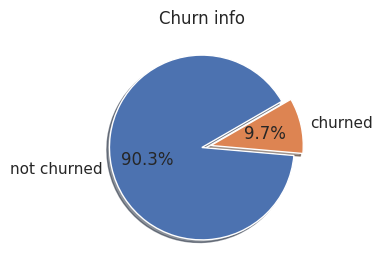

In [7]:
explode = (0, 0.1)
labels=['not churned','churned']
plt.title('Churn info')
client['churn'].value_counts().plot(kind='pie',labels= labels,autopct='%1.1f%%',shadow=True,startangle=30,explode=explode, figsize = (3,3))
plt.ylabel('')

plt.show()

## The target class distribution is highly imbalanced which may impact our model performance. We will overcome this using synthetic data generation in the next step of this challenge (Feature Engineering).

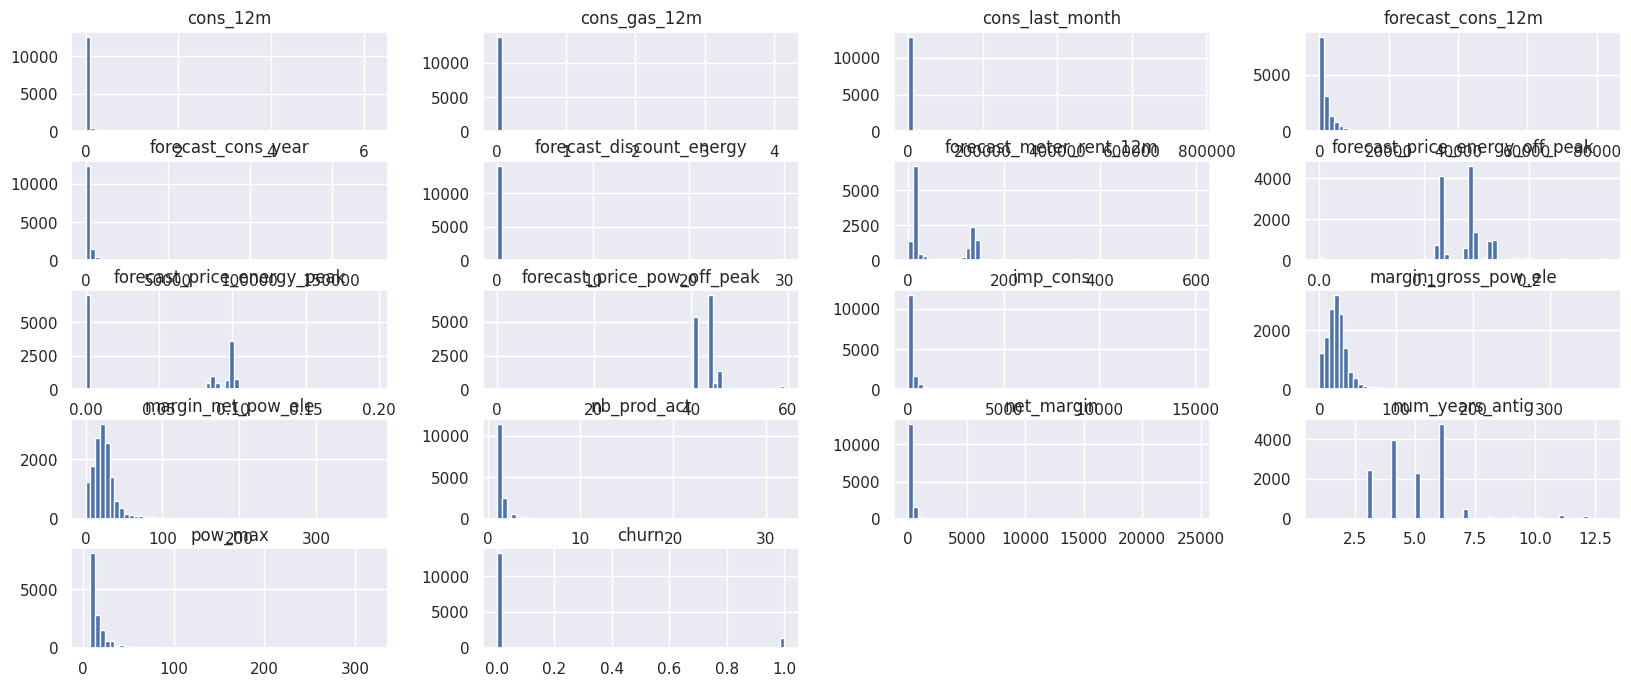

In [8]:
client.hist(
    bins=60, figsize=(20,8)
)
plt.show()

The features values are skewed heavily as well. We will scale these features in the next step of this challenge.

Split when feature value = 0 		 Count	 Non-Churners 	Churners
cons_12m 				 117 	 107 		 10


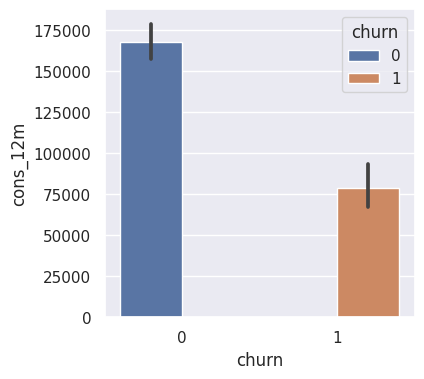

Split when feature value = 0 		 Count	 Non-Churners 	Churners
cons_gas_12m 				 11994 	 10796 		 1198


<Figure size 1500x800 with 0 Axes>

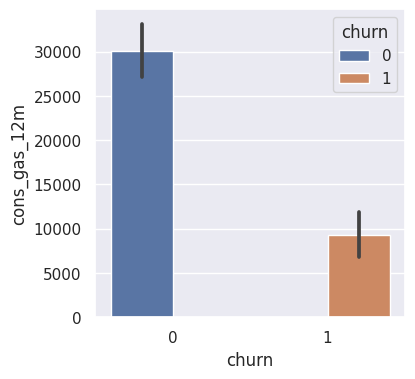

Split when feature value = 0 		 Count	 Non-Churners 	Churners
cons_last_month 				 4983 	 4513 		 470


<Figure size 1500x800 with 0 Axes>

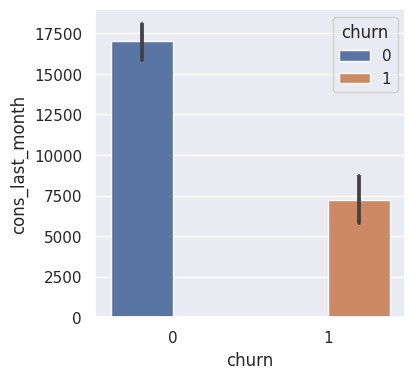

Split when feature value = 0 		 Count	 Non-Churners 	Churners
forecast_cons_12m 				 306 	 288 		 18


<Figure size 1500x800 with 0 Axes>

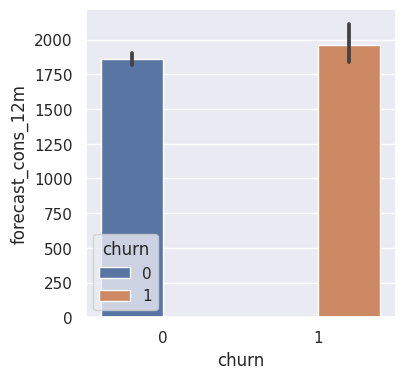

Split when feature value = 0 		 Count	 Non-Churners 	Churners
forecast_cons_year 				 6148 	 5573 		 575


<Figure size 1500x800 with 0 Axes>

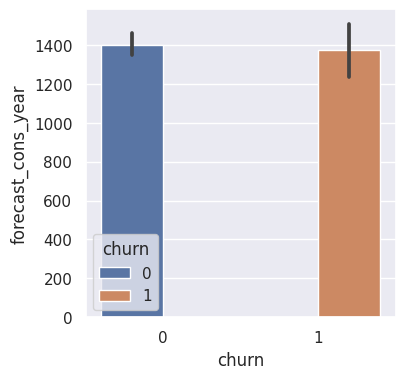

<Figure size 1500x800 with 0 Axes>

In [123]:
consumption = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year']


for feature in consumption:
    
    print('Split when feature value = 0 \t\t Count\t Non-Churners \tChurners')
    print(feature ,'\t\t\t\t',  client[client[feature] == 0].shape[0],'\t', 
              client[client[feature] == 0].loc[:,'churn'].value_counts()[0], '\t\t',
             client[client[feature] == 0].loc[:,'churn'].value_counts()[1])
    plt.figure(figsize=(4,4))
    sns.barplot(data = client, y= feature, x = 'churn', hue = 'churn')
    plt.show()
    plt.tight_layout();

Clients who havent consumed in the past 3 months are defined as churned. Lets investigate if thi is the case.

In [7]:
client.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [3]:
df1 = client[(client['cons_12m'] == 0) & (client['cons_gas_12m'] == 0) ]
df2 = client[(client['cons_12m'] == 0) & (client['cons_gas_12m'] != 0) ]
df3 = client[(client['cons_12m'] != 0) & (client['cons_gas_12m'] == 0) ]
df4 = client[(client['cons_12m'] != 0) & (client['cons_gas_12m'] != 0) ]


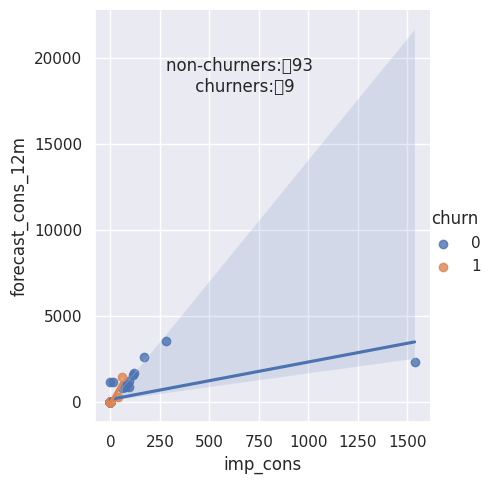

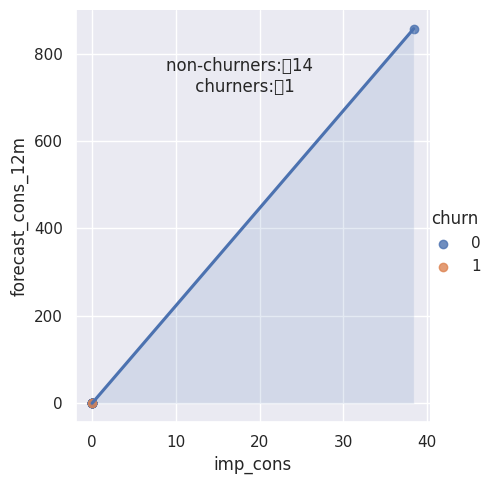

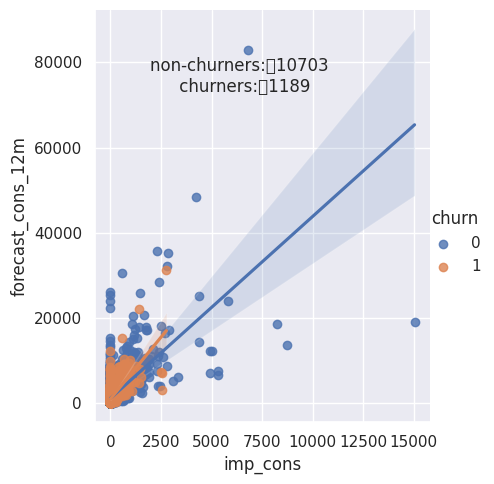

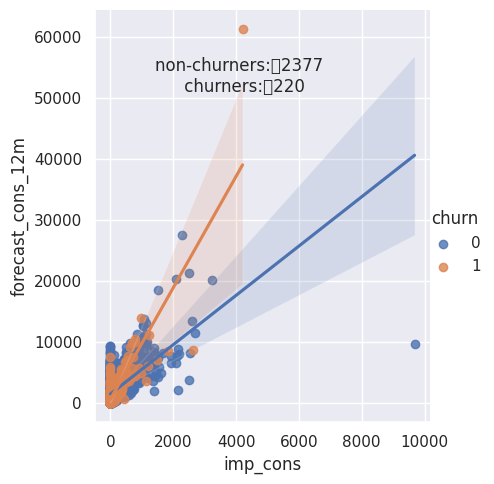

In [87]:
#fig, ax = plt.subplots(2,2, figsize=(2,2))
for idx, df in enumerate([df1, df2, df3, df4]):
  
    facet_txt = f'non-churners:\t{df[df.churn==0].shape[0]} \n churners:\t{df[df.churn==1].shape[0]}'
    g = sns.lmplot(data=df, x="imp_cons", y="forecast_cons_12m", hue = 'churn')
    axes = plt.gca()
    fig = axes.figure
    fig.set_figwidth(5)
    fig.set_figheight(5)
    
    fig.text(0.5,.8, s=facet_txt, fontsize=12, ha='center')

    plt.show();

There are a total of 117 customers (93+9+14+1) havent consumed either electricity or gas in the past 12 months, yet they havent churned. They also have a median antiquity of 6 years. 

In [34]:
client.shape, price.shape

((14606, 26), (193002, 8))

In [35]:
client.info(), price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

(None, None)

In [36]:
client.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count   14606.000     14606.000        14606.000          14606.000   
mean   159220.286     28092.375        16090.270           1868.615   
std    573465.264    162973.059        64364.196           2387.572   
min         0.000         0.000            0.000              0.000   
25%      5674.750         0.000            0.000            494.995   
50%     14115.500         0.000          792.500           1112.875   
75%     40763.750         0.000         3383.000           2401.790   
max   6207104.000   4154590.000       771203.000          82902.830   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count           14606.000                 14606.000                14606.000   
mean             1399.763                     0.967                   63.087   
std              3247.786                     5.108                   66.166   
min                 0.000                     0.000                    0.000   
25%                 0.000                     0.000                   16.180   
50%               314.000                     0.000                   18.795   
75%              1745.750                     0.000                  131.030   
max            175375.000                    30.000                  599.310   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                       14606.000                   14606.000   
mean                            0.137                       0.050   
std                             0.025                       0.049   
min                             0.000                       0.000   
25%                             0.116                       0.000   
50%                             0.143                       0.084   
75%                             0.146                       0.099   
max                             0.274                       0.196   

       forecast_price_pow_off_peak  imp_cons  margin_gross_pow_ele  \
count                    14606.000 14606.000             14606.000   
mean                        43.130   152.787                24.565   
std                          4.486   341.369                20.231   
min                          0.000     0.000                 0.000   
25%                         40.607     0.000                14.280   
50%                         44.311    37.395                21.640   
75%                         44.311   193.980                29.880   
max                         59.266 15042.790               374.640   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig   pow_max  \
count           14606.000    14606.000   14606.000        14606.000 14606.000   
mean               24.563        1.292     189.265            4.998    18.135   
std                20.230        0.710     311.798            1.612    13.535   
min                 0.000        1.000       0.000            1.000     3.300   
25%                14.280        1.000      50.712            4.000    12.500   
50%                21.640        1.000     112.530            5.000    13.856   
75%                29.880        1.000     243.097            6.000    19.172   
max               374.640       32.000   24570.650           13.000   320.000   

          churn  
count 14606.000  
mean      0.097  
std       0.296  
min       0.000  
25%       0.000  
50%       0.000  
75%       0.000  
max       1.000

The consumption and forecast consumption features tend to be skewed towards the right. investigate why this is.

In [15]:
client[client.cons_12m == 0].shape[0]

117

In [ ]:
client[client.cons_12m == 0].count()

In [37]:
price.describe(include='all', datetime_is_numeric=True)

id  price_date  price_off_peak_var  \
count                             193002      193002          193002.000   
unique                             16096          12                 NaN   
top     038af19179925da21a25619c5a24b745  2015-08-01                 NaN   
freq                                  12       16094                 NaN   
mean                                 NaN         NaN               0.141   
std                                  NaN         NaN               0.025   
min                                  NaN         NaN               0.000   
25%                                  NaN         NaN               0.126   
50%                                  NaN         NaN               0.146   
75%                                  NaN         NaN               0.152   
max                                  NaN         NaN               0.281   

        price_peak_var  price_mid_peak_var  price_off_peak_fix  \
count       193002.000          193002.000          193002.000   
unique             NaN                 NaN                 NaN   
top                NaN                 NaN                 NaN   
freq               NaN                 NaN                 NaN   
mean             0.055               0.030              43.334   
std              0.050               0.036               5.410   
min              0.000               0.000               0.000   
25%              0.000               0.000              40.729   
50%              0.085               0.000              44.267   
75%              0.102               0.073              44.445   
max              0.230               0.114              59.445   

        price_peak_fix  price_mid_peak_fix  
count       193002.000          193002.000  
unique             NaN                 NaN  
top                NaN                 NaN  
freq               NaN                 NaN  
mean            10.623               6.410  
std             12.842               7.774  
min              0.000               0.000  
25%              0.000               0.000  
50%              0.000               0.000  
75%             24.340              16.226  
max             36.491              17.458

In [38]:
client.isna().sum(), price.isna().sum()

(id                                0
 channel_sales                     0
 cons_12m                          0
 cons_gas_12m                      0
 cons_last_month                   0
 date_activ                        0
 date_end                          0
 date_modif_prod                   0
 date_renewal                      0
 forecast_cons_12m                 0
 forecast_cons_year                0
 forecast_discount_energy          0
 forecast_meter_rent_12m           0
 forecast_price_energy_off_peak    0
 forecast_price_energy_peak        0
 forecast_price_pow_off_peak       0
 has_gas                           0
 imp_cons                          0
 margin_gross_pow_ele              0
 margin_net_pow_ele                0
 nb_prod_act                       0
 net_margin                        0
 num_years_antig                   0
 origin_up                         0
 pow_max                           0
 churn                             0
 dtype: int64,
 id                    

There seems to be no null values. Let's explore further.

In [25]:
## Add extra price features to help analyse the price dataset

price['fixed_price_component'] = price[['price_off_peak_fix', 'price_peak_fix','price_mid_peak_fix']].sum(axis=1)
price['var_price_component'] = price[['price_off_peak_var','price_peak_var','price_mid_peak_var']].sum(axis=1)

price['off_peak_price_component'] = price[['price_off_peak_fix', 'price_off_peak_var']].sum(axis=1)
price['mid_peak_price_component'] = price[['price_mid_peak_fix', 'price_mid_peak_var']].sum(axis=1)
price['peak_price_component']=price[['price_peak_fix', 'price_peak_var']].sum(axis=1)

price['monthly_bill'] = price[['fixed_price_component','var_price_component']].sum(axis=1)

In [39]:
## Lets first convert the object features with date data to datetime type
      
client['date_activ']      = pd.to_datetime(client['date_activ'])
client['date_end']        = pd.to_datetime(client['date_end'])
client['date_modif_prod'] = pd.to_datetime(client['date_modif_prod'])
client['date_renewal']    = pd.to_datetime(client['date_renewal']) 

price['price_date']       = pd.to_datetime(price['price_date'])

### Categorical type to be given as int
client['churn']=client['churn'].astype('int') 

In [44]:
client['refdt_to_enddt'] = (client['date_end'] - client['date_activ'])
client['refdt_to_enddt'].describe()

count                           14606
mean     2007 days 12:54:07.542105984
std       604 days 21:00:56.519157368
min                 731 days 00:00:00
25%                1461 days 00:00:00
50%                1828 days 12:00:00
75%                2353 days 00:00:00
max                4795 days 00:00:00
Name: refdt_to_enddt, dtype: object

### The median period of subscription is 1828 days or nearly 5 years.

In [49]:
## Lets add three new columns. adding suffix syn to synthetic features.
client['contract_start_year_syn'] = client['date_activ'].dt.year
client['contract_end_year_syn'] = client['date_end'].dt.year
client['period_subscribed_syn'] = client['contract_end_year_syn']-client['contract_start_year_syn']

client['period_subscribed_syn'].describe(), \
client['contract_start_year_syn'].describe(), \
client['contract_end_year_syn'].describe()

(count   14606.000
 mean        5.487
 std         1.660
 min         2.000
 25%         4.000
 50%         5.000
 75%         6.000
 max        13.000
 Name: period_subscribed_syn, dtype: float64,
 count   14606.000
 mean     2010.578
 std         1.653
 min      2003.000
 25%      2010.000
 50%      2011.000
 75%      2012.000
 max      2014.000
 Name: contract_start_year_syn, dtype: float64,
 count   14606.000
 mean     2016.065
 std         0.246
 min      2016.000
 25%      2016.000
 50%      2016.000
 75%      2016.000
 max      2017.000
 Name: contract_end_year_syn, dtype: float64)

In [20]:
## Lets subset the dataframe into feature groups for analyses
client_cat=client.select_dtypes('object')
client_num=client.select_dtypes('number')
client_date=client.select_dtypes('datetime')

num_features_discrete = [feature for feature in client_num.columns if client[feature].nunique()<25]
client_num_discrete = client[num_features_discrete]

features_cont = list(set(client_num.nunique().index.tolist()) -
                     set(num_features_discrete))
client_num_cont = client[features_cont]

## datetime features
client_datetime = client[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 
                          'contract_start_year_syn', 'contract_end_year_syn',
                           'period_subscribed_syn']]

In [21]:
## Lets check for value_counts for cat columns
for i in client_cat.columns[1:]:
    print( client_cat.loc[:,i].value_counts())
    print('\n\n')   

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64



f    11955
t     2651
Name: has_gas, dtype: int64



lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64





In [22]:
client.shape

(14606, 29)

In [23]:
client.skew(), price.skew()

(cons_12m                          5.997
 cons_gas_12m                      9.598
 cons_last_month                   6.391
 forecast_cons_12m                 7.156
 forecast_cons_year               16.588
 forecast_discount_energy          5.155
 forecast_meter_rent_12m           1.505
 forecast_price_energy_off_peak   -0.120
 forecast_price_energy_peak       -0.014
 forecast_price_pow_off_peak      -4.999
 imp_cons                         13.199
 margin_gross_pow_ele              4.473
 margin_net_pow_ele                4.473
 nb_prod_act                       8.637
 net_margin                       36.570
 num_years_antig                   1.446
 pow_max                           5.787
 churn                             2.721
 contract_start_year_syn          -1.237
 contract_end_year_syn             3.544
 period_subscribed_syn             1.240
 dtype: float64,
 price_off_peak_var         -0.312
 price_peak_var             -0.133
 price_mid_peak_var          0.366
 price_off_peak_f

## The target classes are imbalanced and the features are heavily skewed. Lets scale the features. 

# 1.2 Client dataset: Feature groups analysis

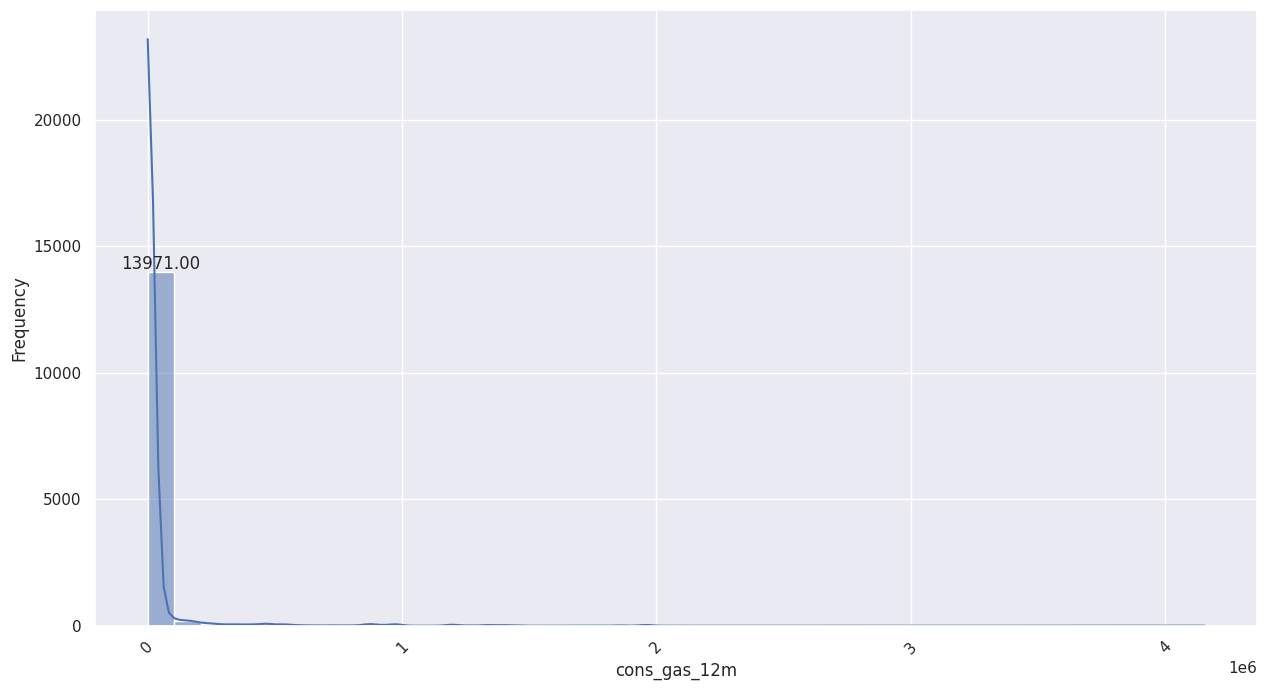

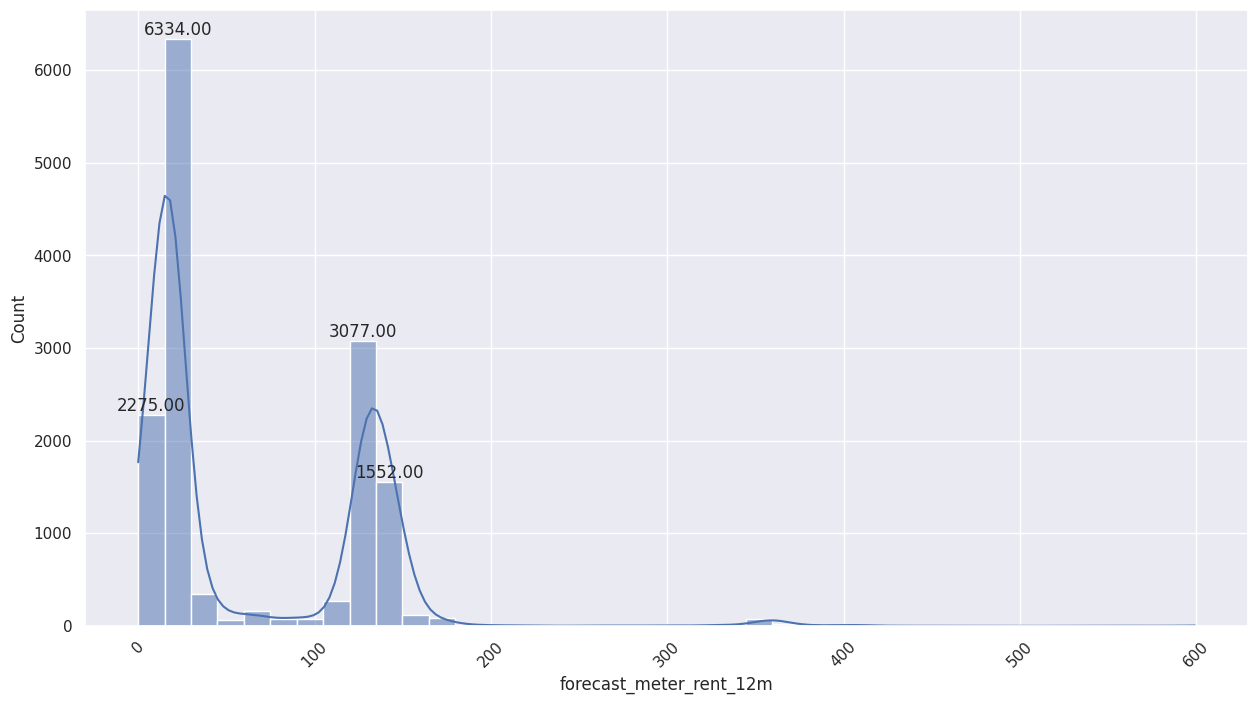

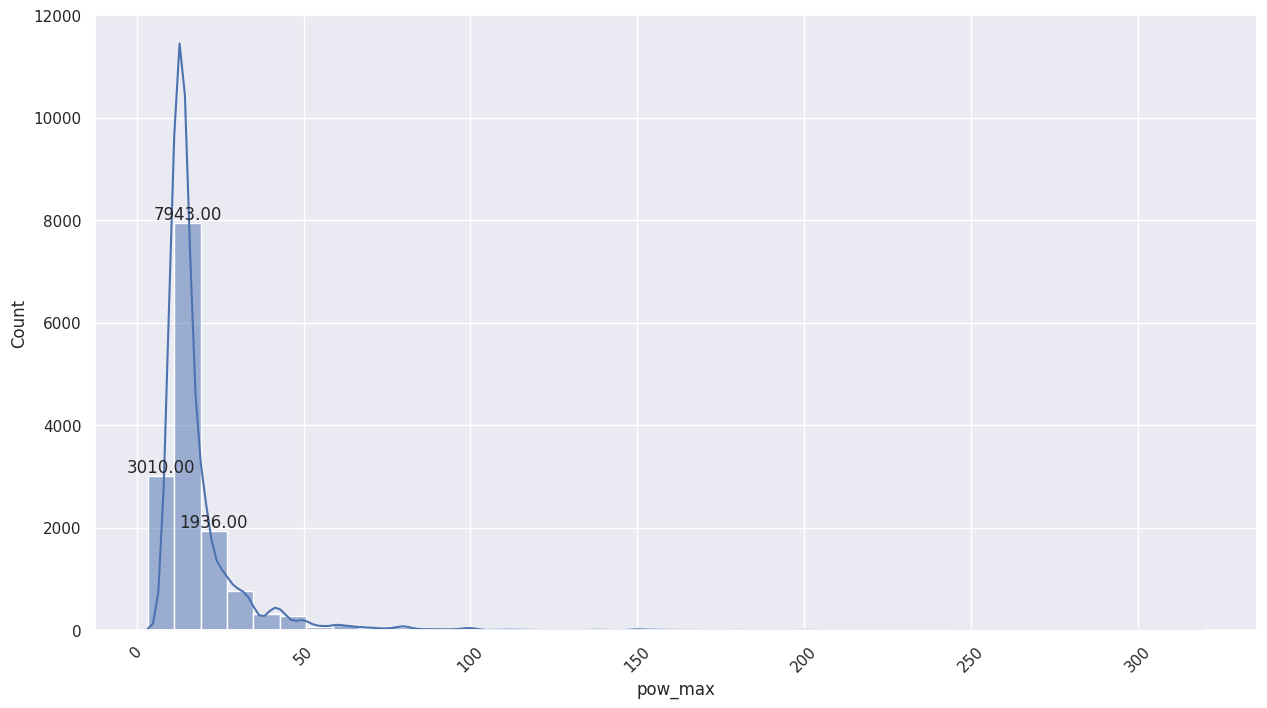

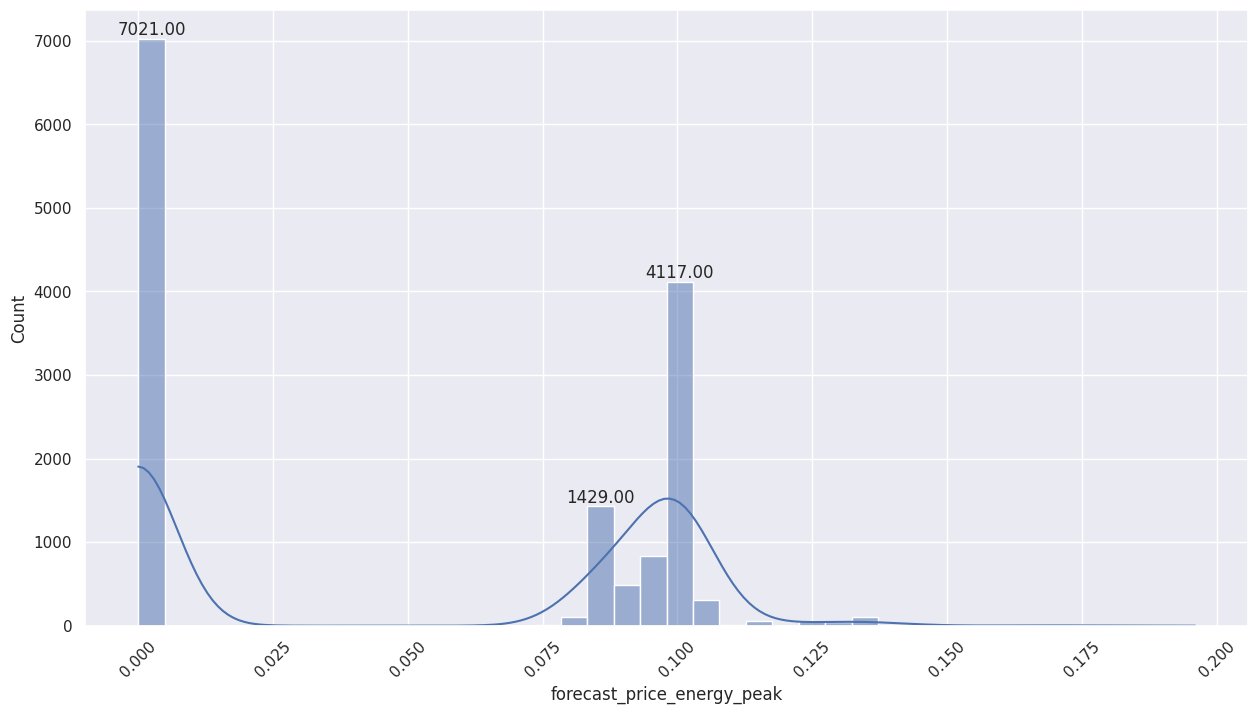

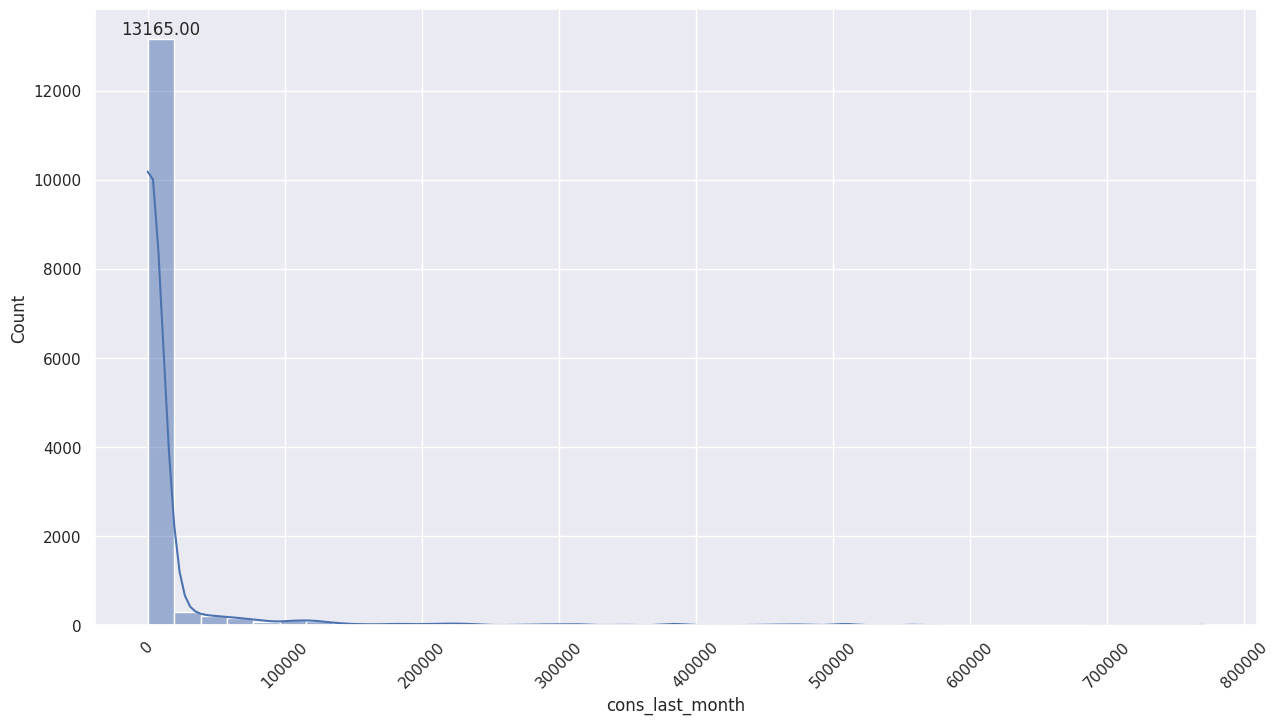

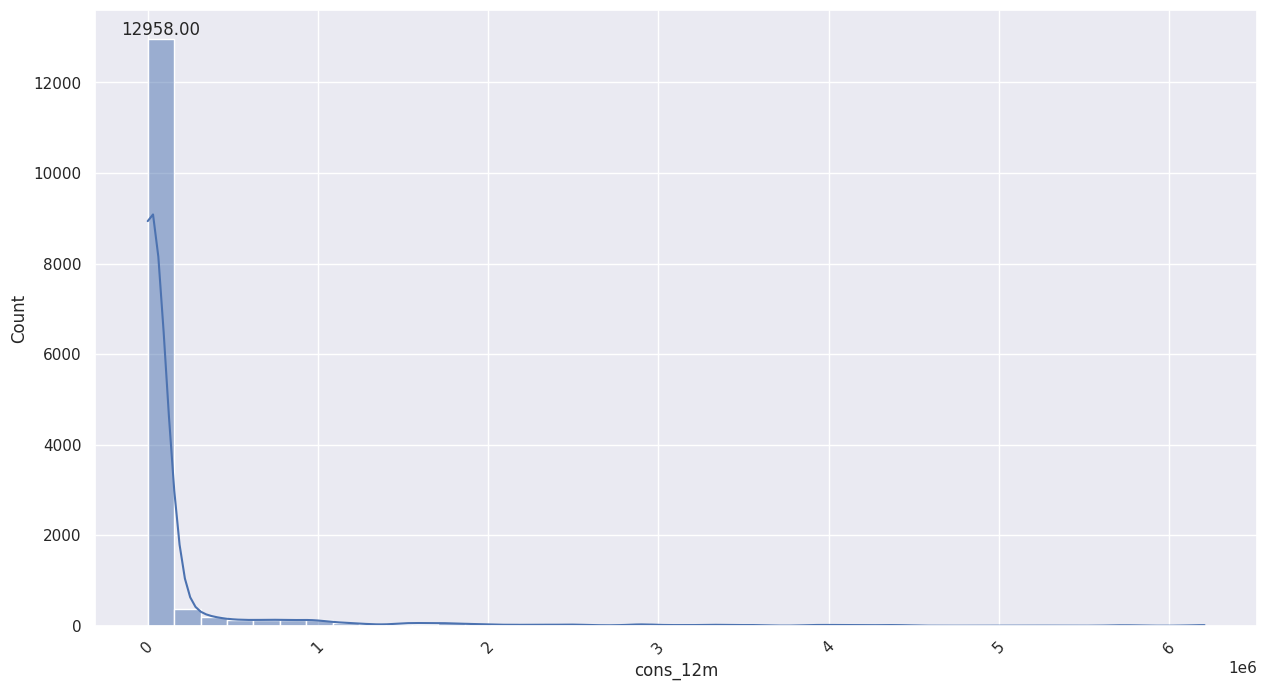

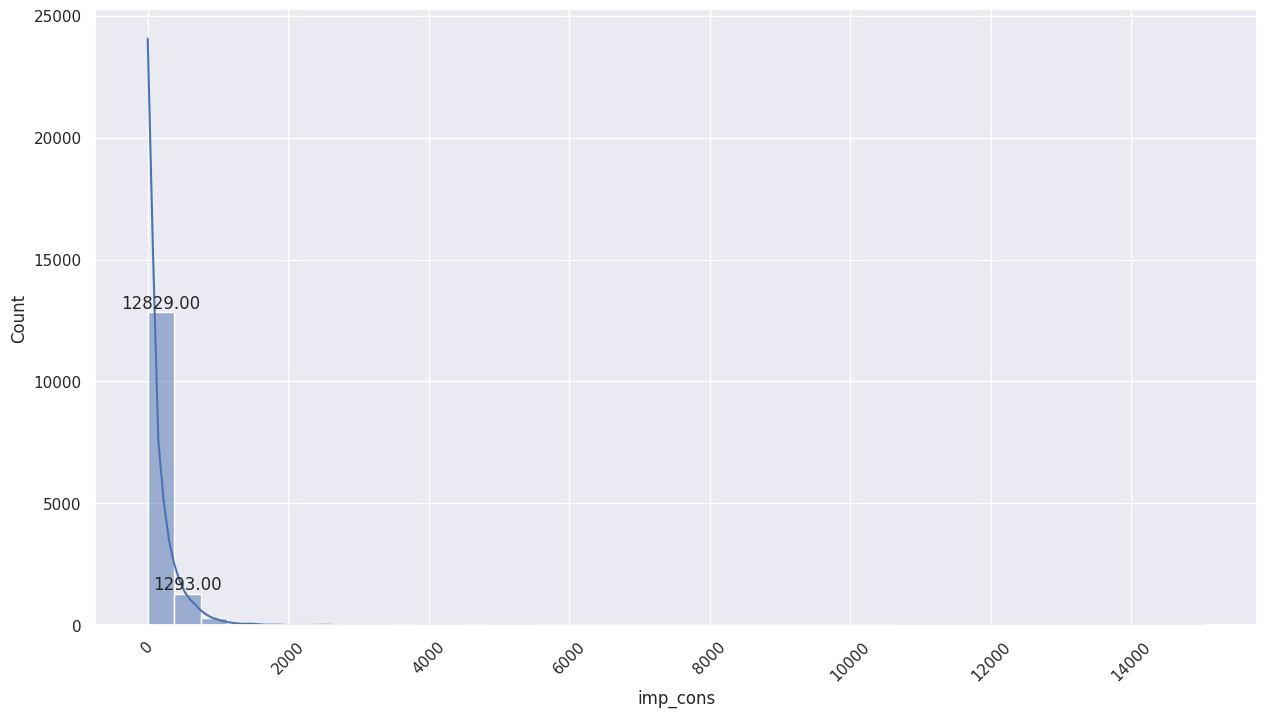

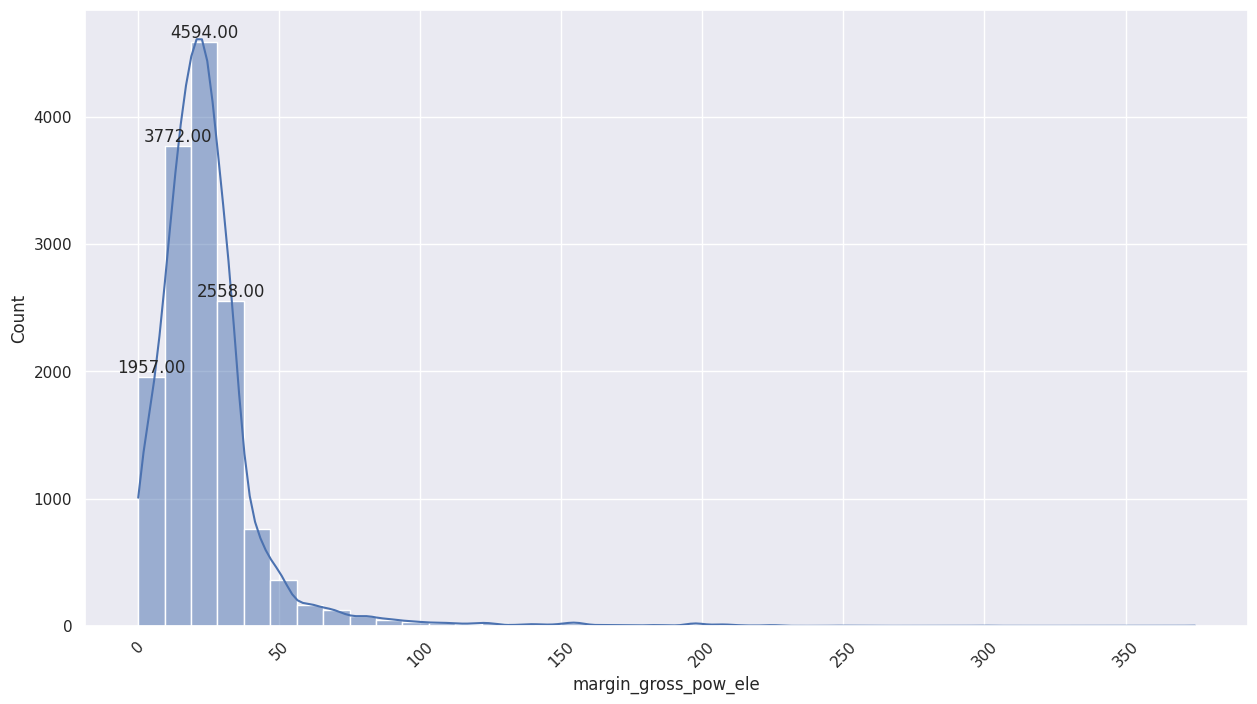

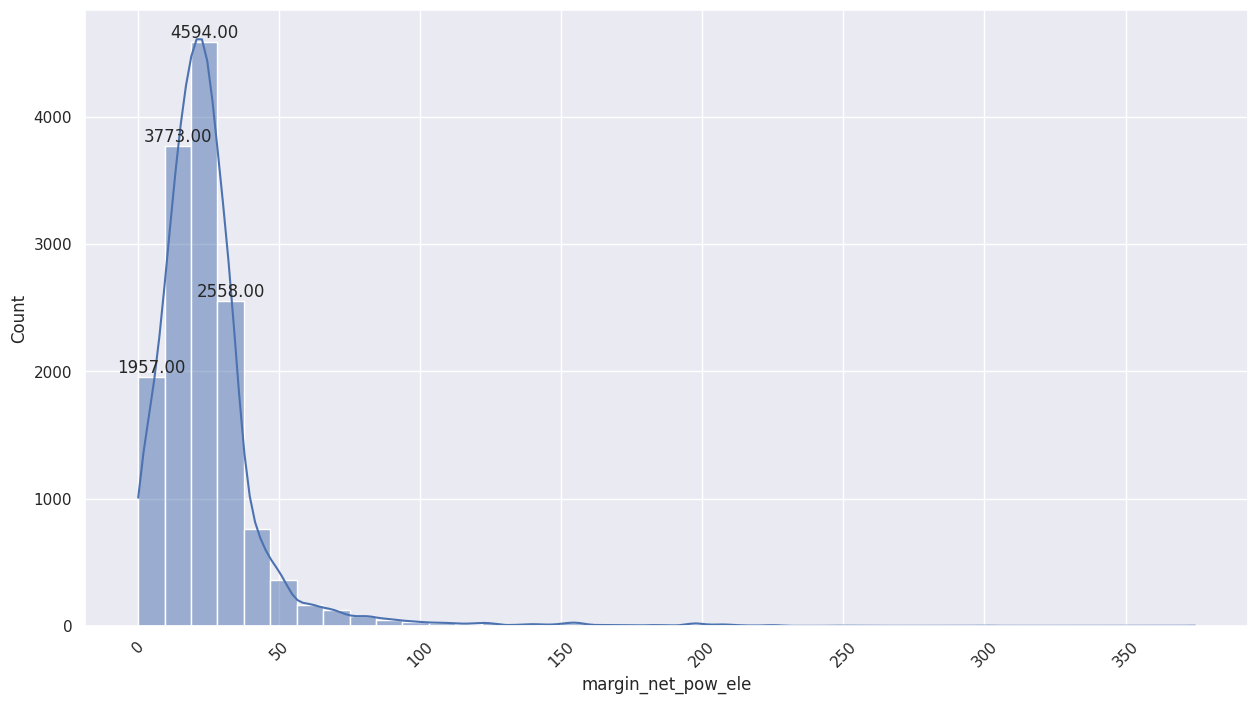

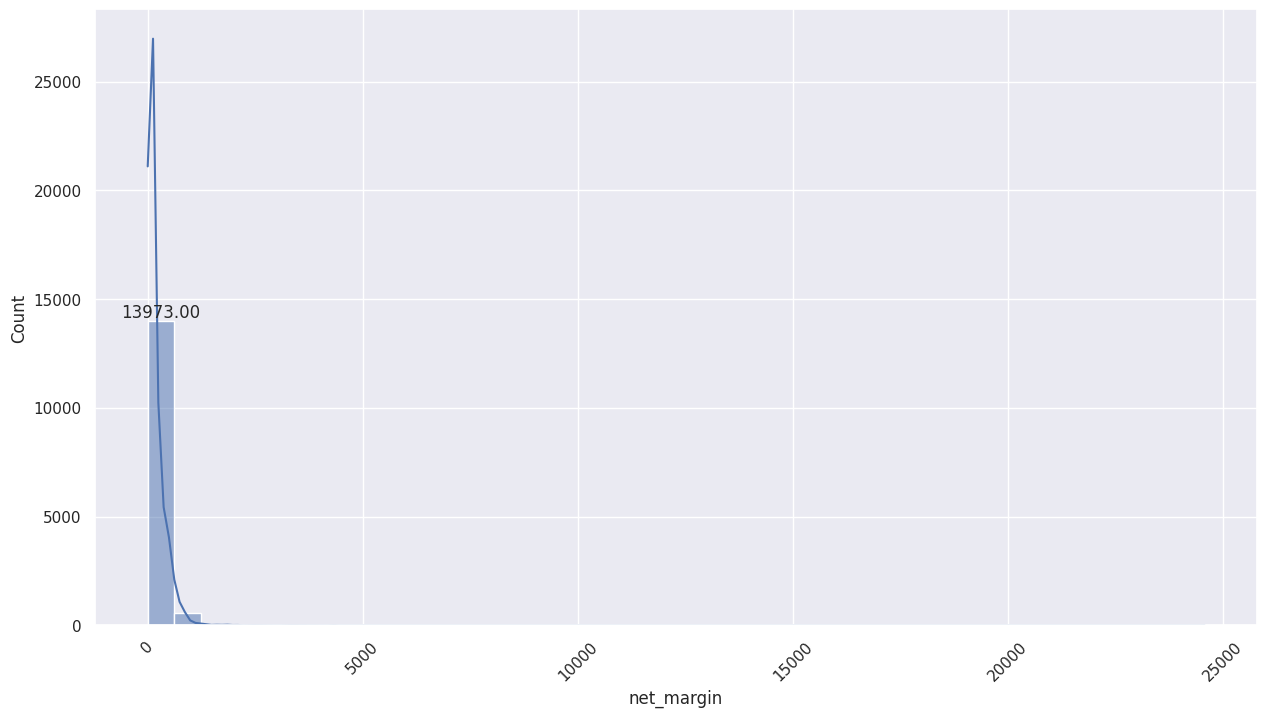

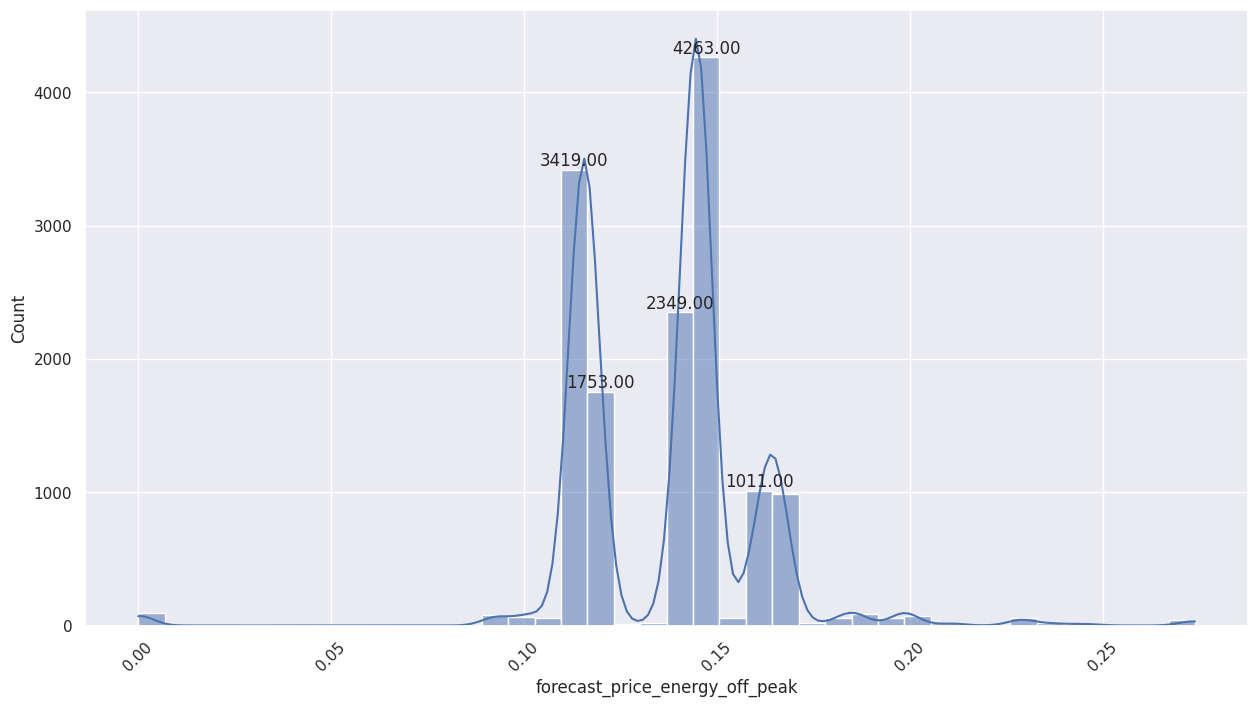

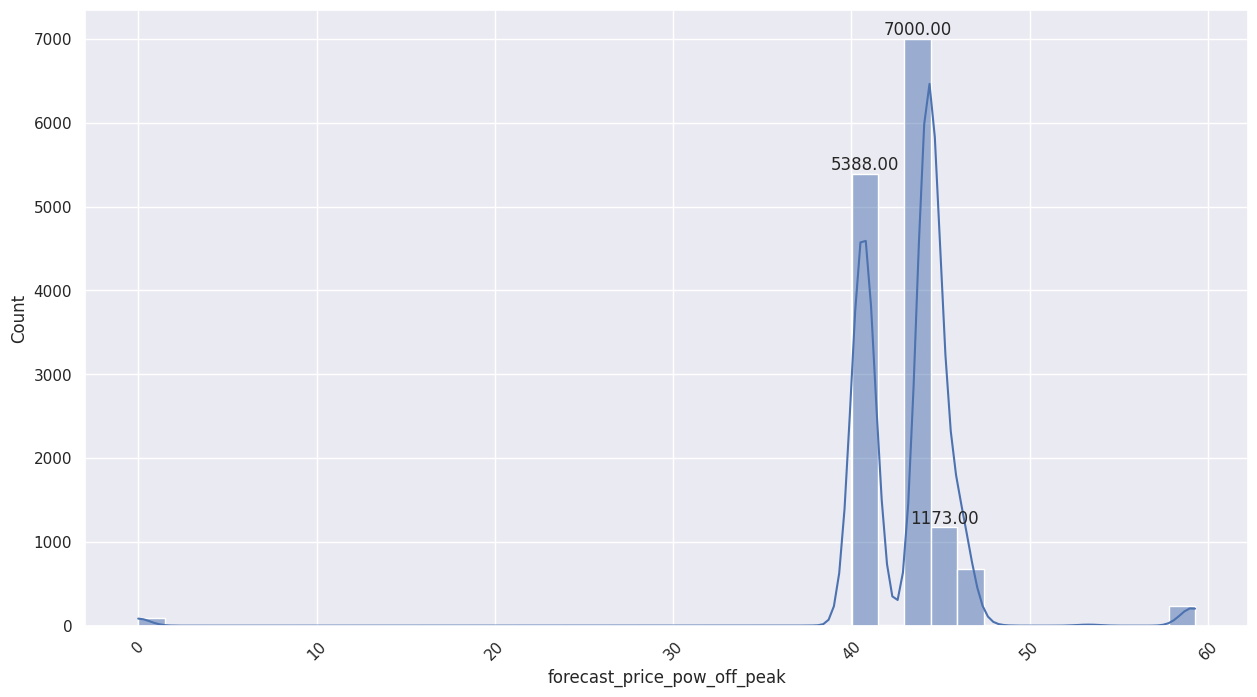

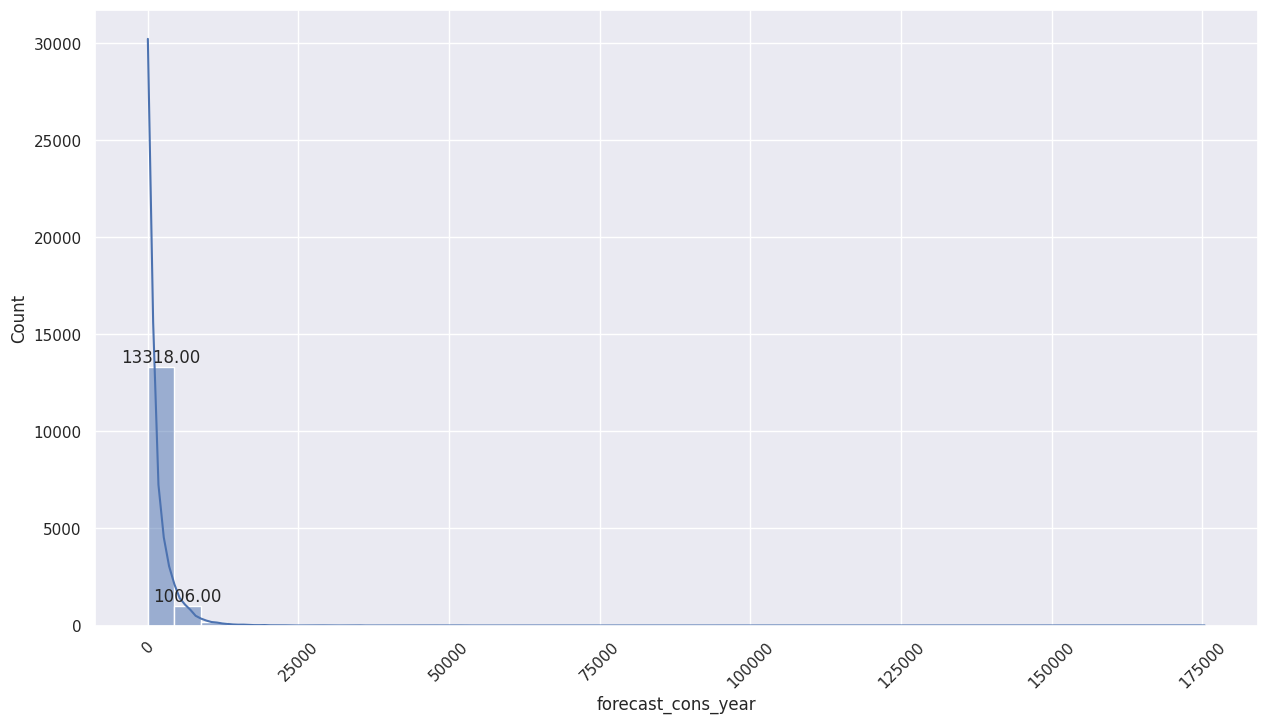

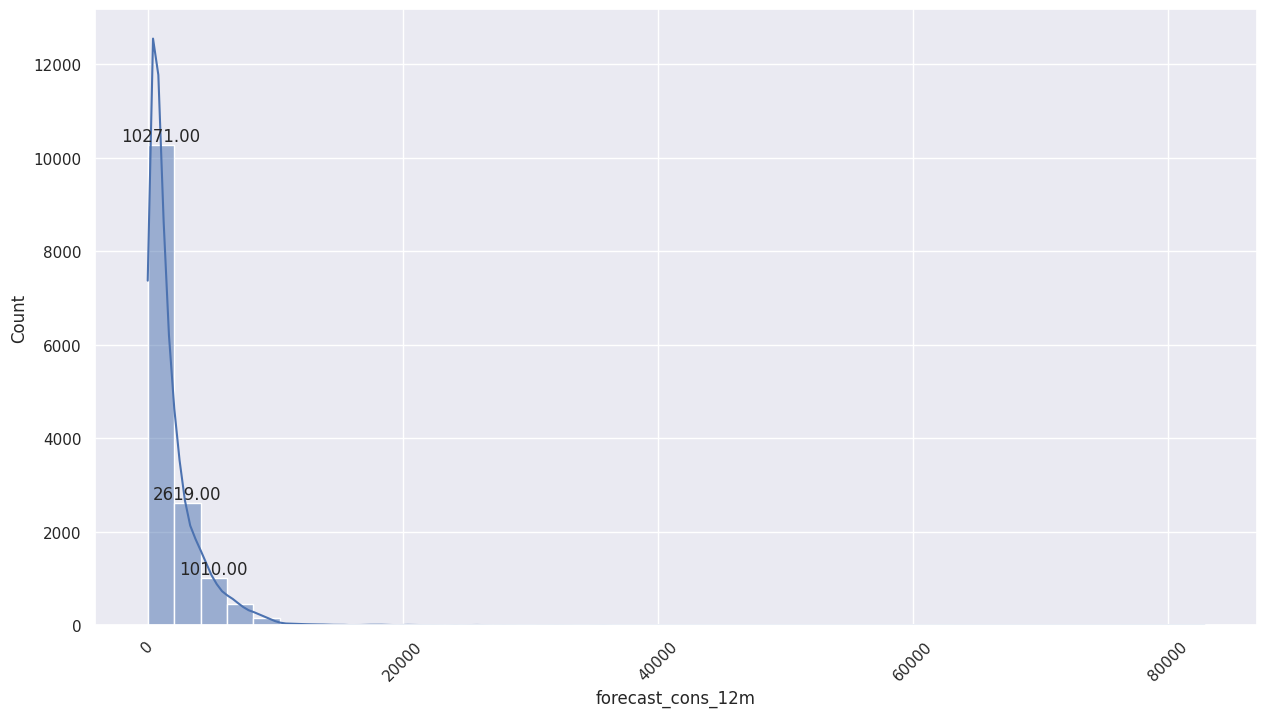

['cons_gas_12m',
 'forecast_meter_rent_12m',
 'pow_max',
 'forecast_price_energy_peak',
 'cons_last_month',
 'cons_12m',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'net_margin',
 'forecast_price_energy_off_peak',
 'forecast_price_pow_off_peak',
 'forecast_cons_year',
 'forecast_cons_12m']

In [36]:
## Numeric, continuous features
num_bins = 40
fig, ax = plt.subplots()
for feature in features_cont:        
    # plot the frequency histogram
    
    sns.histplot(data = client, x = feature, bins=num_bins, kde=True)    
    
    # Add annotations to bars exceeding the threshold
    threshold = 1000
    for patch in plt.gca().patches:
        height = patch.get_height()
        
        if height > threshold:
            plt.annotate(f'{height:.2f}', (patch.get_x() + patch.get_width() / 2, height),
                         ha='center', va='bottom')
    
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show();
features_cont

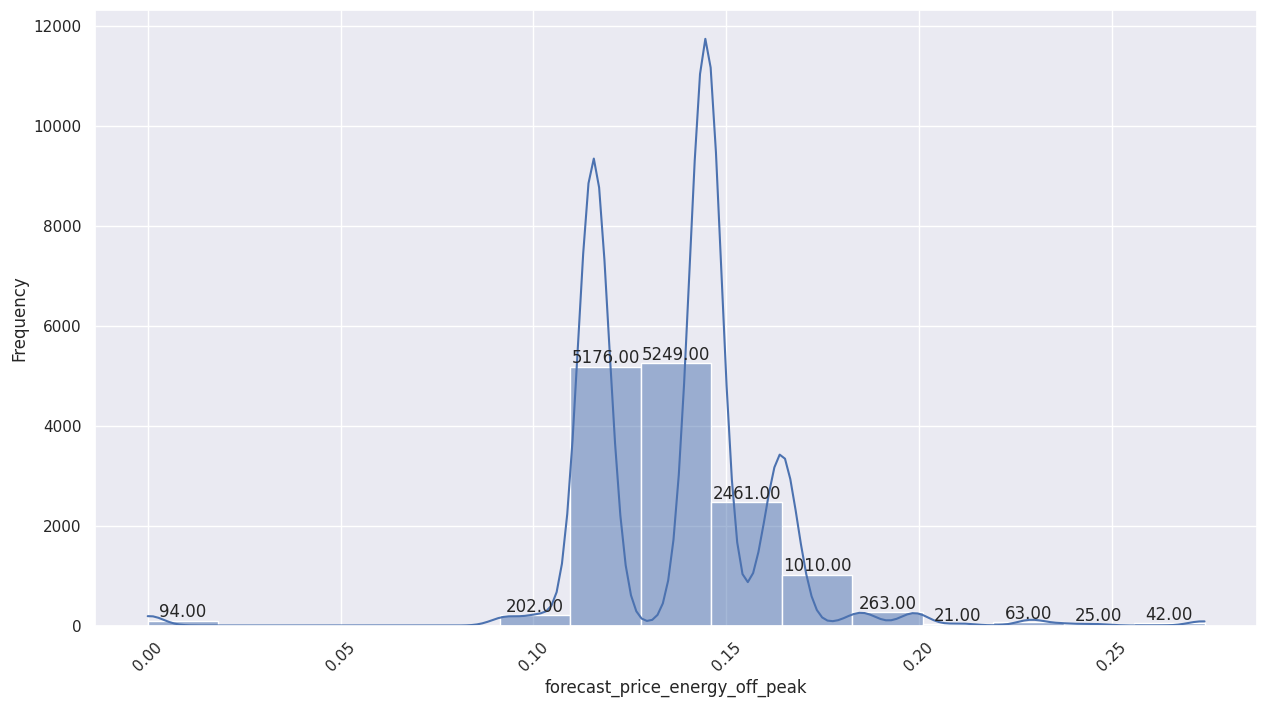

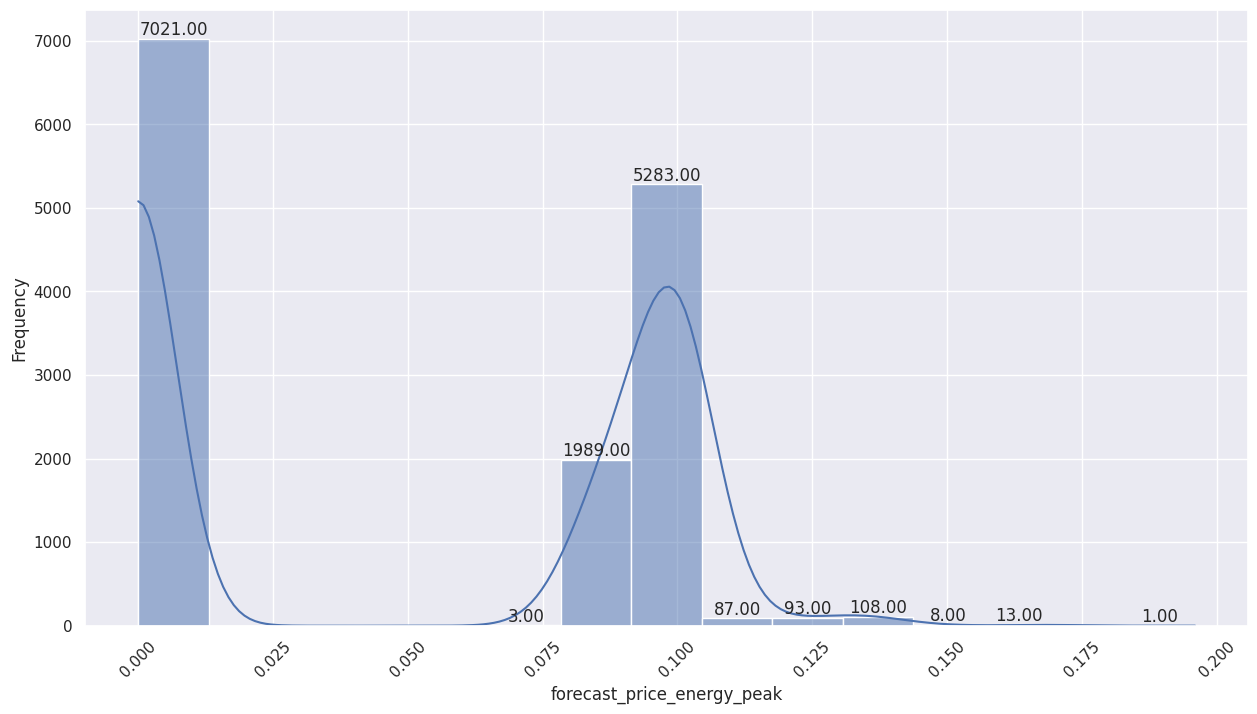

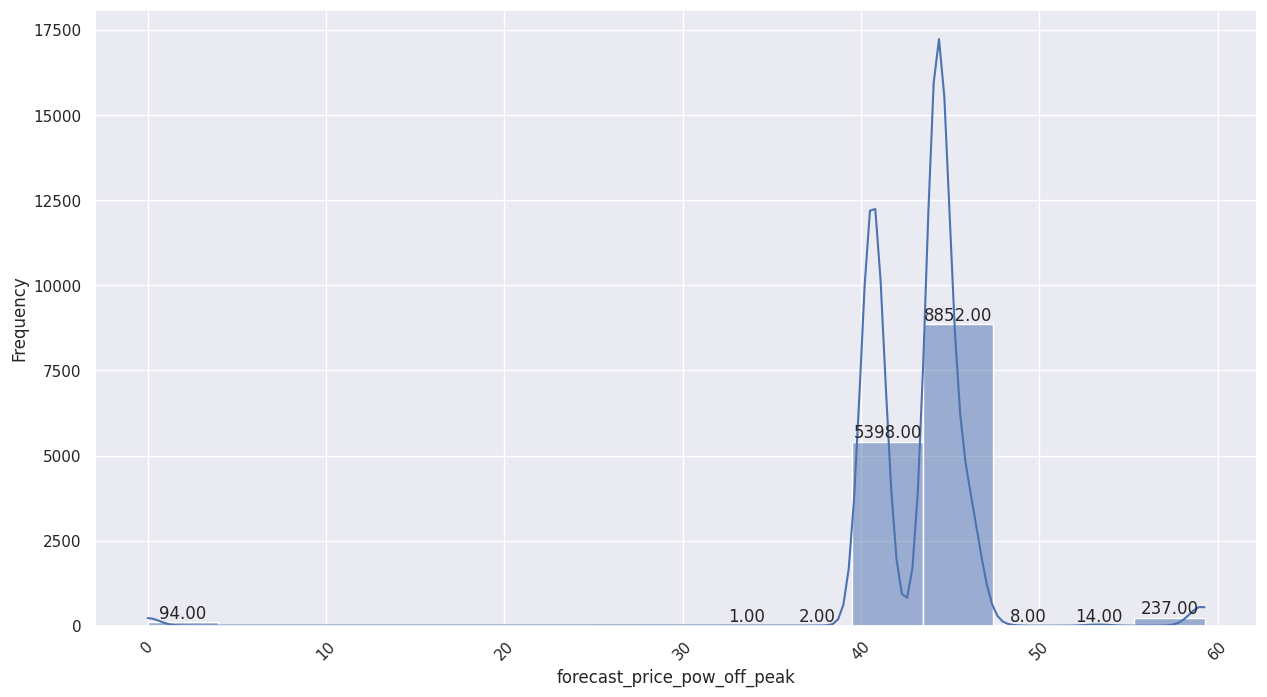

['cons_gas_12m',
 'forecast_meter_rent_12m',
 'pow_max',
 'forecast_price_energy_peak',
 'cons_last_month',
 'cons_12m',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'net_margin',
 'forecast_price_energy_off_peak',
 'forecast_price_pow_off_peak',
 'forecast_cons_year',
 'forecast_cons_12m']

In [21]:
## Numeric, continuous features
num_bins = 15
forecast_features = ['forecast_price_energy_off_peak', 
                     
                     'forecast_price_energy_peak', 'forecast_price_pow_off_peak']
for i in forecast_features:        
    # plot the frequency histogram
    fig, ax = plt.subplots()
    sns.histplot(client[i], bins=num_bins, kde=True)    
    
    # Add annotations to bars exceeding the threshold
    threshold = 0.001
    for patch in plt.gca().patches:
        height = patch.get_height()
        
        if height > threshold:
            plt.annotate(f'{height:.2f}', (patch.get_x() + patch.get_width() / 2, height),
                         ha='center', va='bottom')
    
    ax.set_xlabel(i)
    ax.set_ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
features_cont

## Observations from the histplots
1. Highly skewed distribution. Might need to apply log-normal transformations in the feature engineering stage.
2. Multiple modes observed in forecast features. Further investigation is needed into the features to establish if churn class has any effect.
3. Out of 14606 PowerCo's customers, nearly 13000 customers consumed similar levels of electricity in the last month. Similar consumption of nearly 13000 customers in the 12 months preceding the date of observation. This implies, nearly 1000 customers are outliers and do not fit the bill (pun intended).

In [21]:
client['cons_12m'].max()

6207104

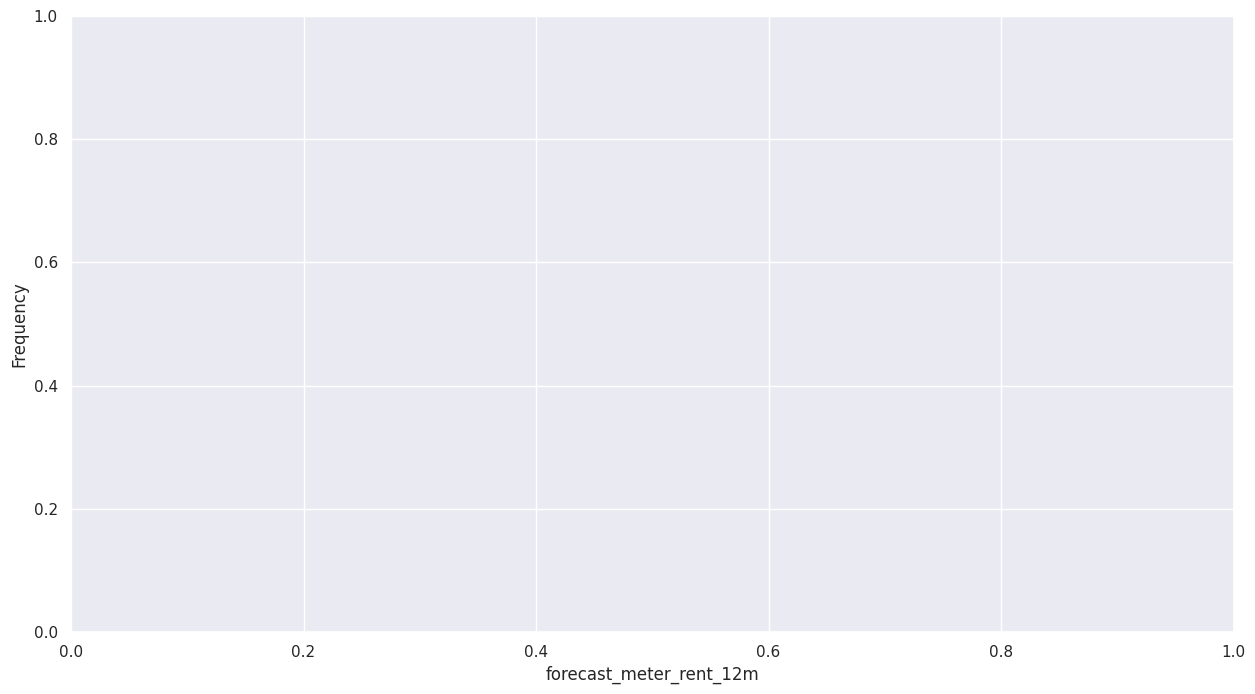

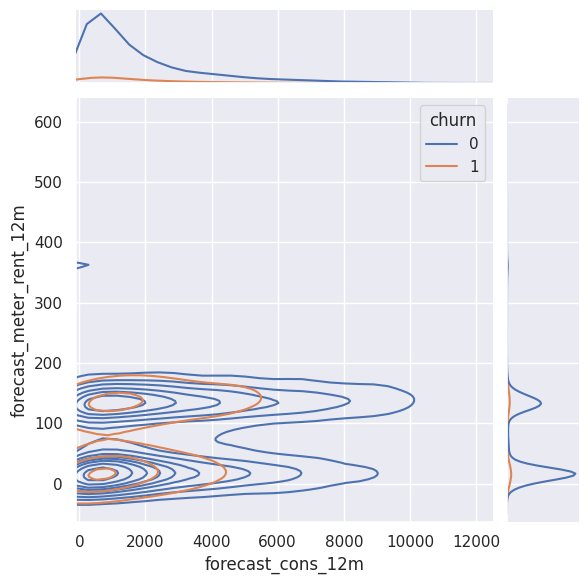

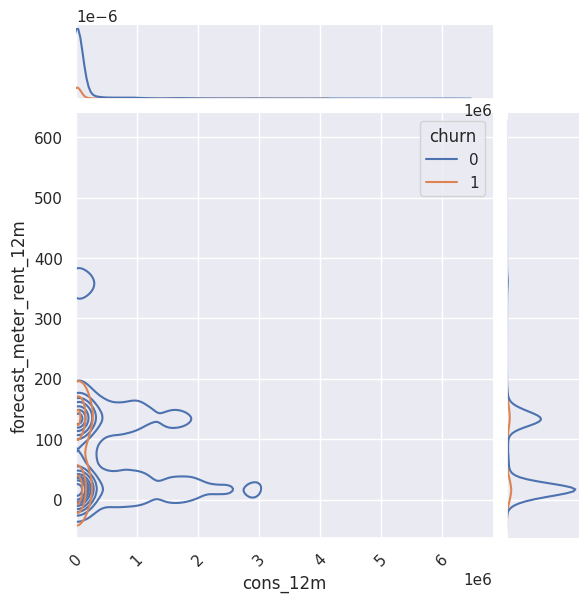

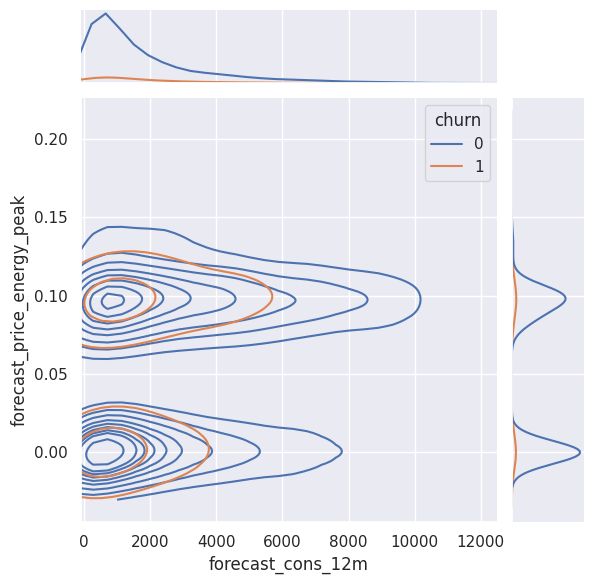

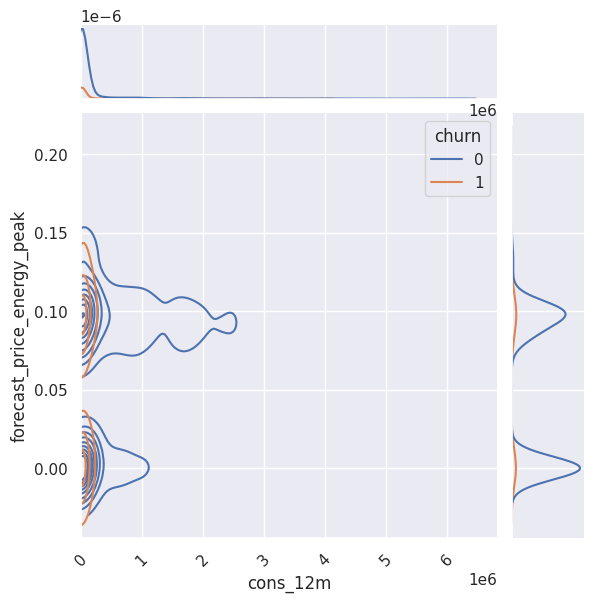

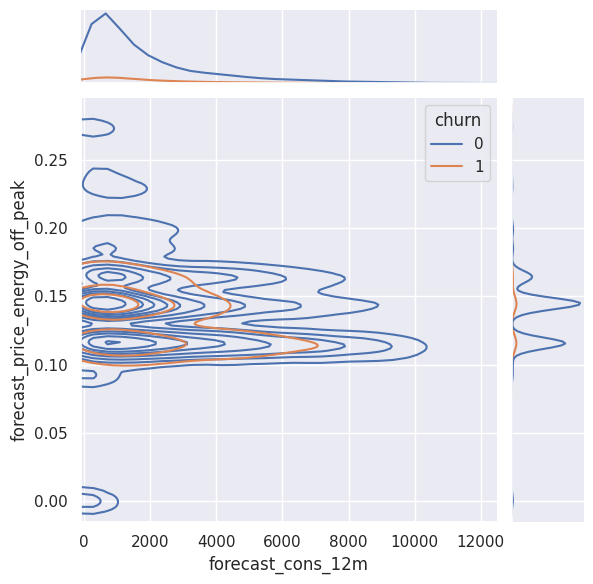

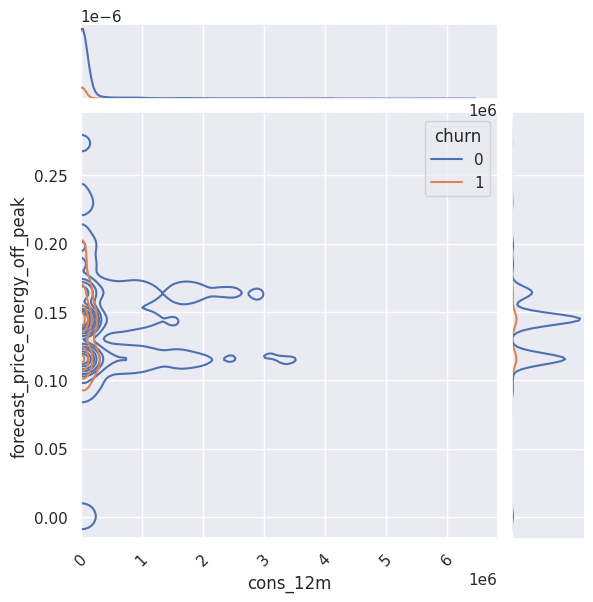

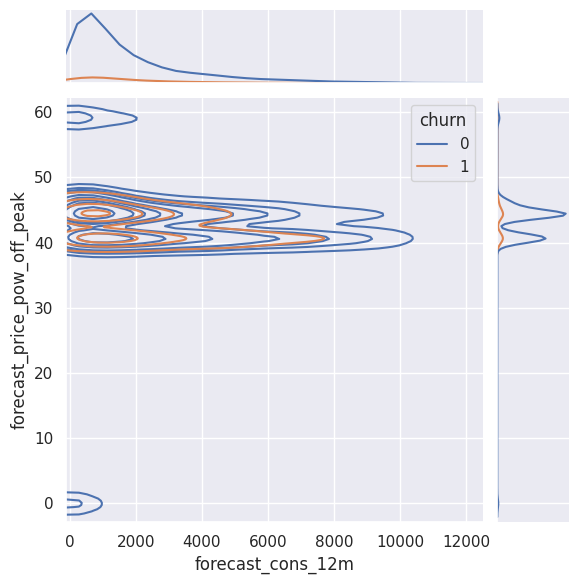

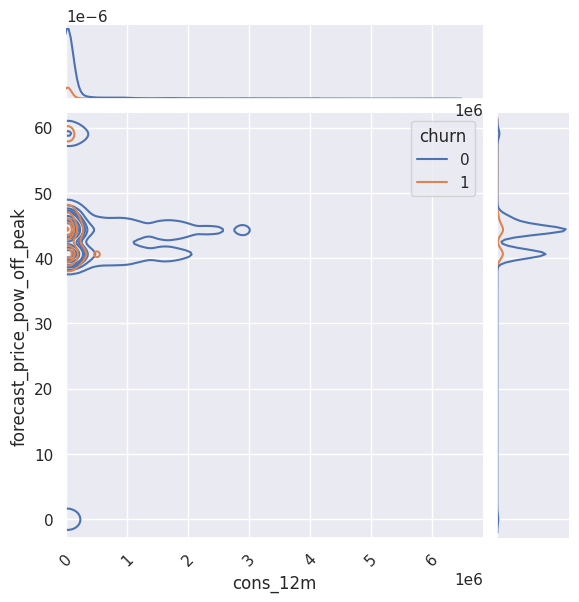

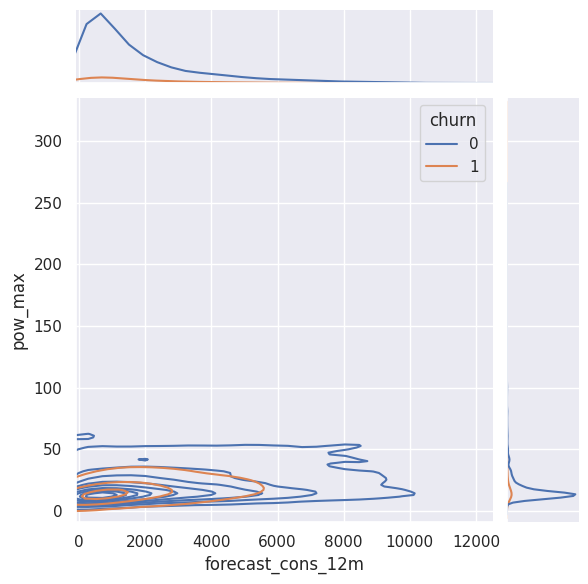

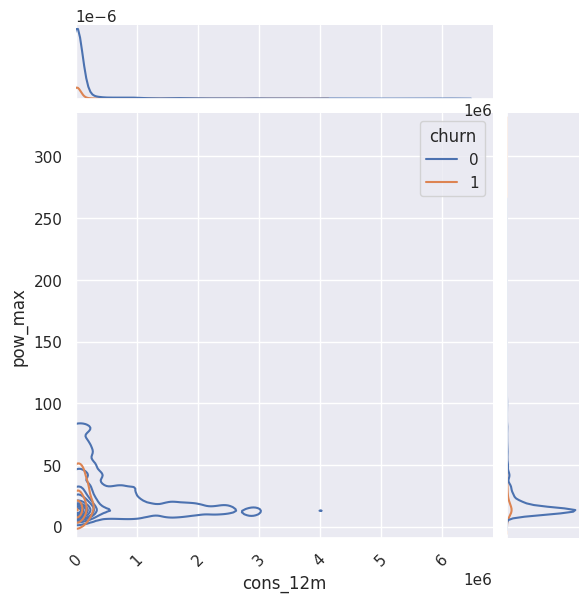

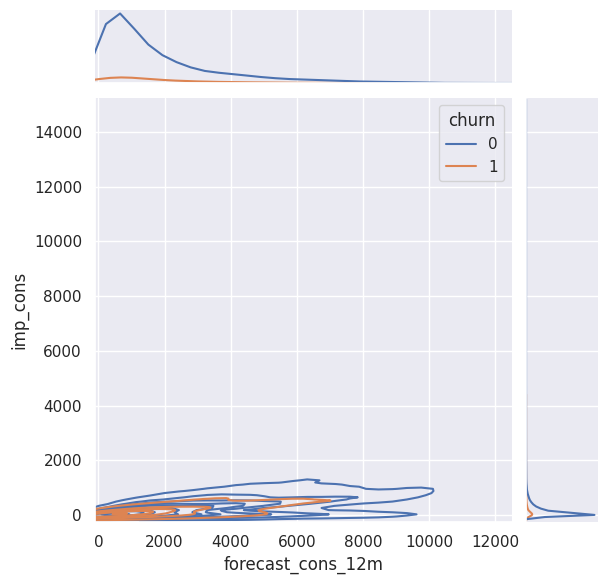

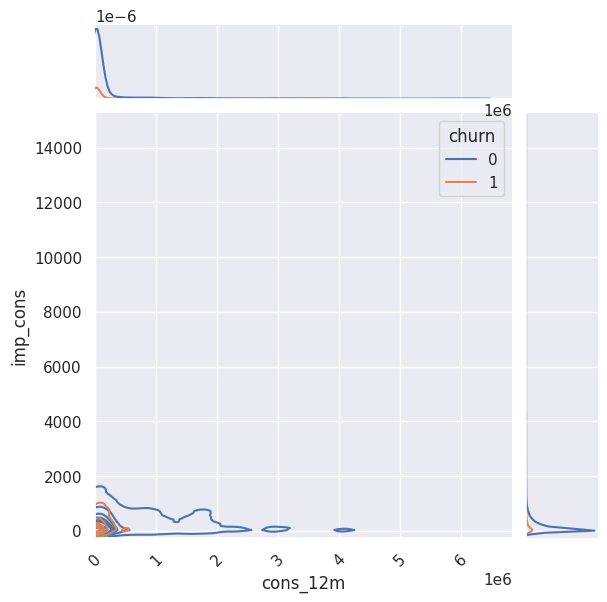

In [22]:
multi_mode_features = ['forecast_meter_rent_12m',
              'forecast_price_energy_peak',
              'forecast_price_energy_off_peak', 
              'forecast_price_pow_off_peak',
              'pow_max',
              'imp_cons']

fig, ax = plt.subplots()
#nrows = 6, ncols=2
#ax.set_xlim(0, 20000)
 
for i in multi_mode_features:
    graph1 = sns.jointplot(data=client, y=i, x= 'forecast_cons_12m', hue ='churn', kind = 'kde', xlim =(-100, 12500))
    graph2 = sns.jointplot(data=client, y=i, x= 'cons_12m', hue ='churn', kind = 'kde', xlim =(client['cons_12m'].min()*0.8, client['cons_12m'].max()*1.1))

    ax.set_xlabel(i)
    ax.set_ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show();

### 1. This is really interesting. The kde plots reveal that customers who consumed less, churned more than the clients who didnt churn. Is underutilization a possible reason for churn?? Or are they underutilizing because of their price sensitivity?? Needs more investigation.

### 2. Some outliers with massive values in cons_12m can be observed. How and why these customers consumed this heavily and whether this impacts our final model will be explored in the next stage of this challenge.

### 3. There are at least 2 distinct groups in both churn classes with distinct forecasted consumption patterns. We will analyze these groups using the forecast_price_energy_peak feature with the threshold of 0.05.

### 4. Pow_max feature at both forecasted and past consumption levels not increasing with consumption. Which leads me to believe that customers are ridiculously underutilizing. Whether the marketing campaigns or pricing packages have anything with this remains to be seen. 




In [23]:
group_1 = client[client.forecast_price_energy_peak > 0.05]

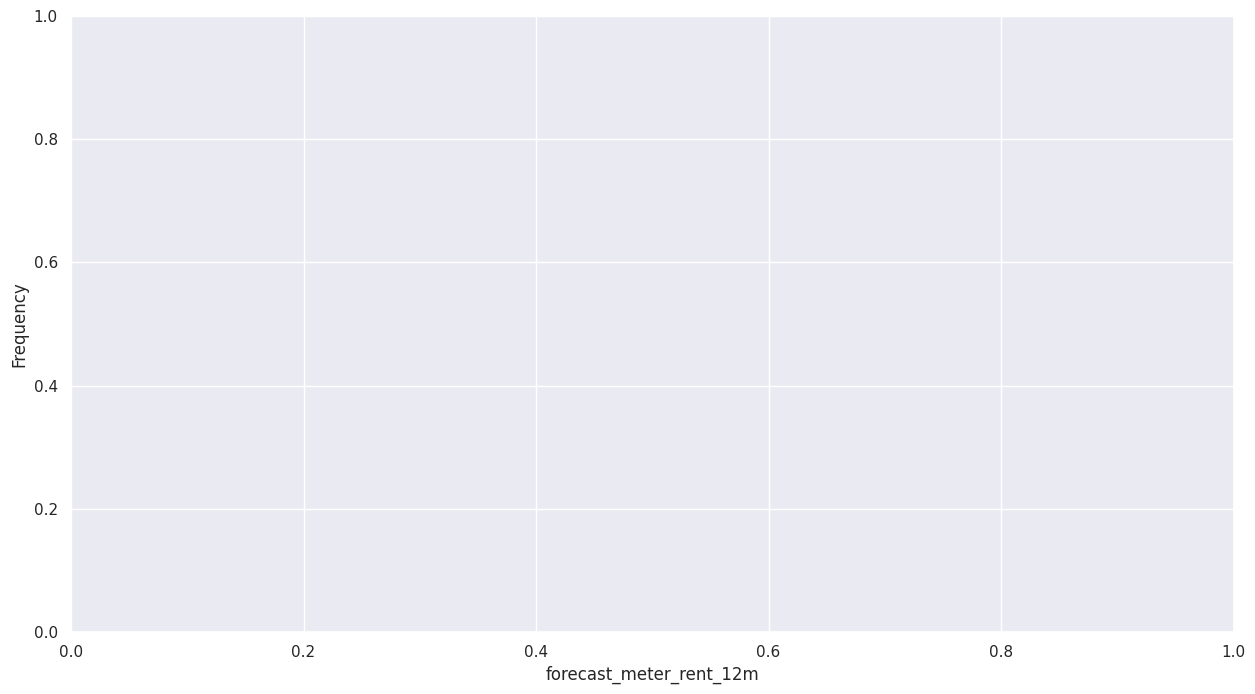

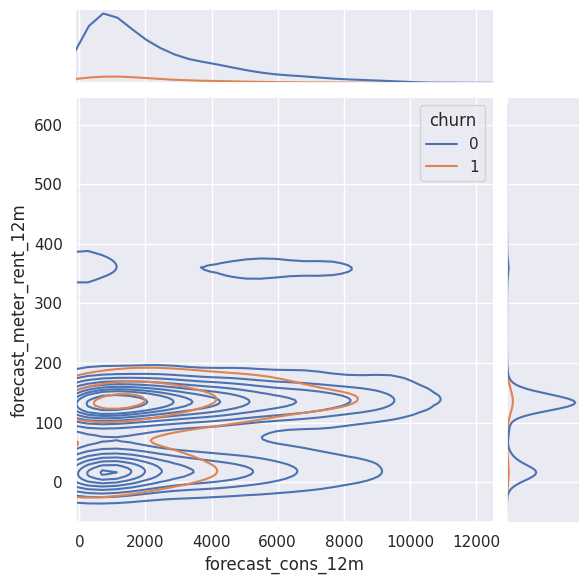

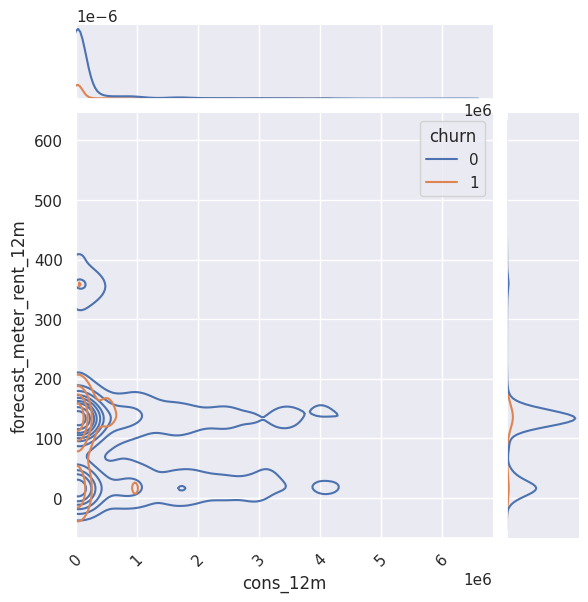

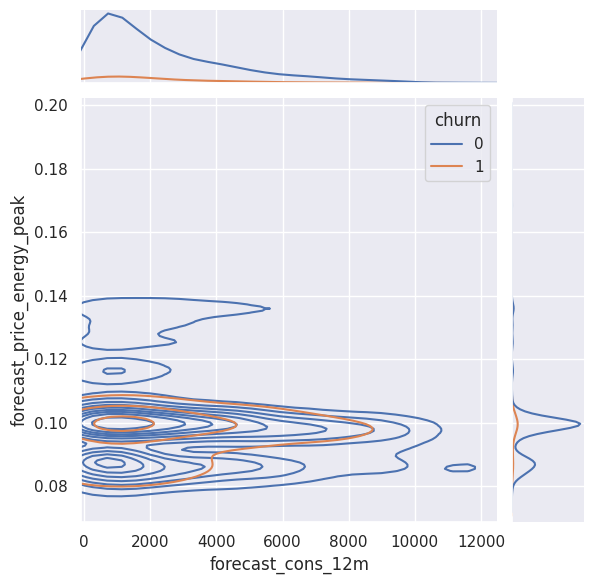

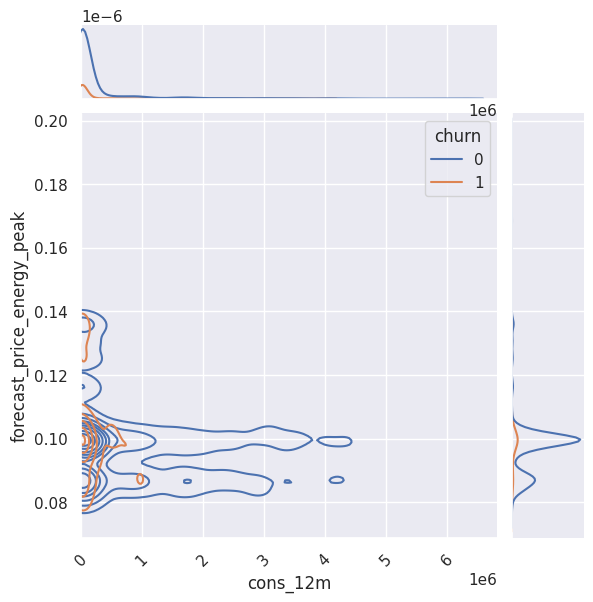

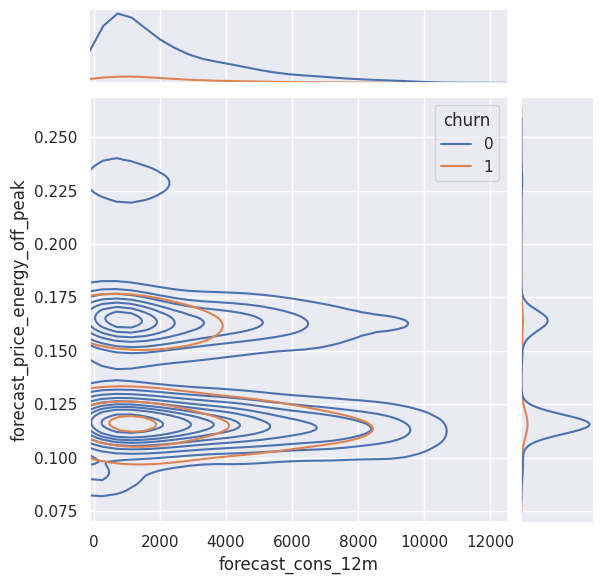

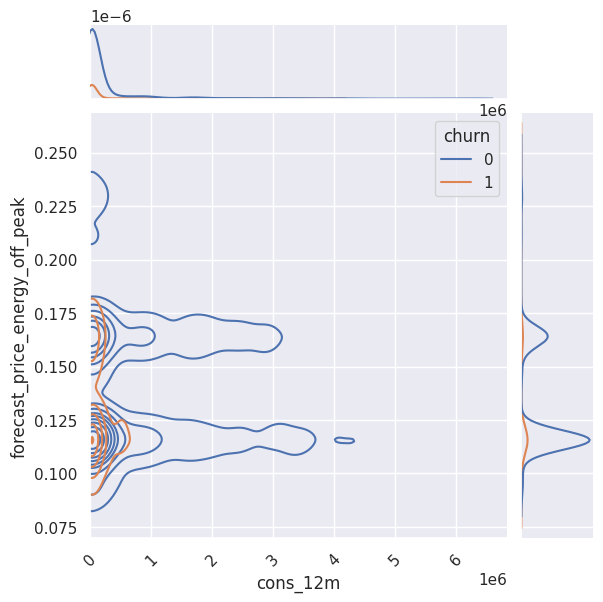

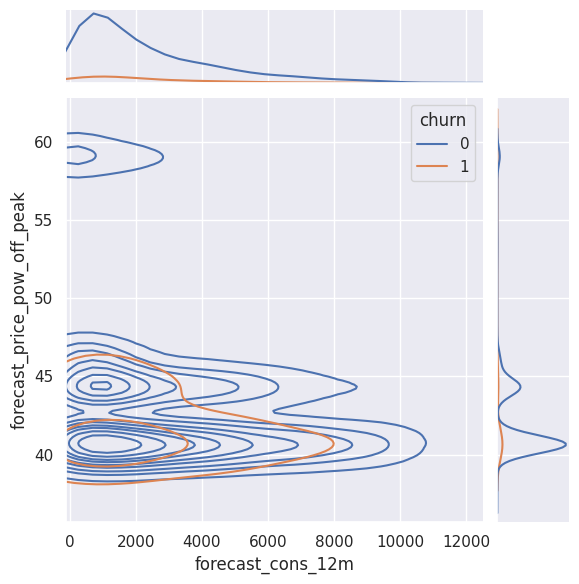

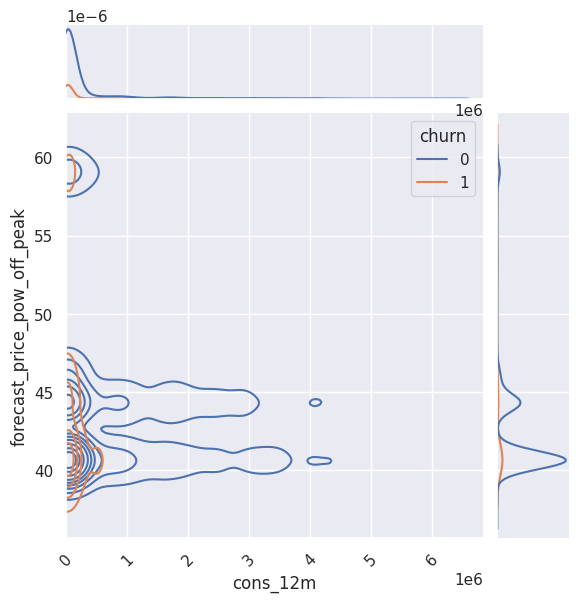

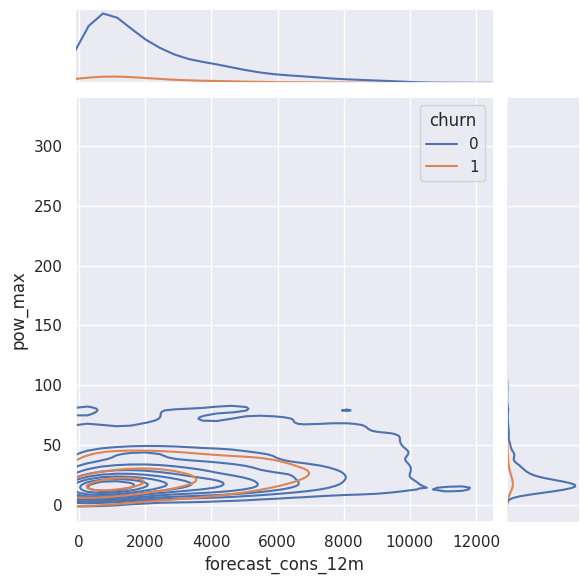

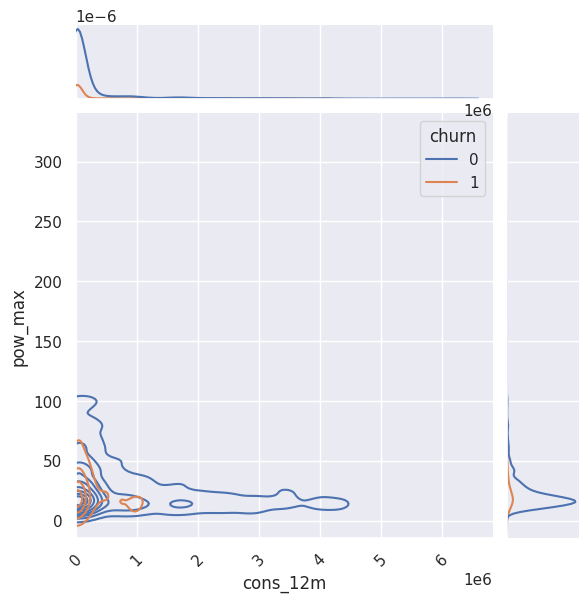

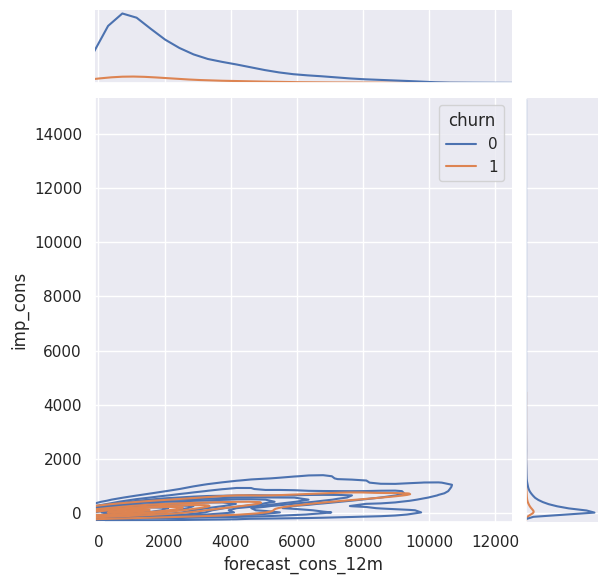

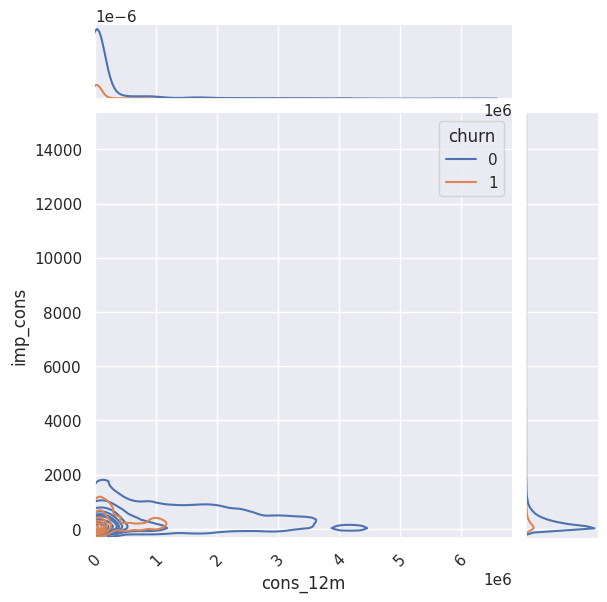

In [24]:
multi_mode_features = ['forecast_meter_rent_12m',
              'forecast_price_energy_peak',
              'forecast_price_energy_off_peak', 
              'forecast_price_pow_off_peak',
              'pow_max',
              'imp_cons']

fig, ax = plt.subplots()
#nrows = 6, ncols=2
#ax.set_xlim(0, 20000)
 
for i in multi_mode_features:
    graph1 = sns.jointplot(data=group_1, y=i, x= 'forecast_cons_12m', hue ='churn', kind = 'kde', xlim =(-100, 12500))
    graph2 = sns.jointplot(data=group_1, y=i, x= 'cons_12m', hue ='churn', kind = 'kde', xlim =(group_1['cons_12m'].min()*0.8, group_1['cons_12m'].max()*1.1))

    ax.set_xlabel(i)
    ax.set_ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show();

## More groupings are revealed in the features of the subset group 1. Random Forest Classifier could be more useful in solving this problem.

## Let's explore the individual class distributions in numeric features in a quantile boxplot (boxenplot)

In [ ]:
fig,ax=plt.subplots(nrows=7, ncols=2, figsize=(30,90), sharex = True)

for variable, subplot in zip(features_cont,ax.flatten()):    
    sns.boxenplot(x=client.churn,y=client_num[variable],ax=subplot)
    
    subplot.set_xlabel('Churn', fontsize = 24)
    subplot.set_ylabel(variable, fontsize = 24)
    
    subplot.xaxis.set_tick_params(labelsize=20)
    subplot.yaxis.set_tick_params(labelsize=20)
    
plt.tight_layout()

### There's no clear variability in target class distribitions among the continuous numeric features. Although its apparent that customers who havent churned have consumed and are forecasted to consume way higher than customers who churned, it isn't immediately clear why there is such a stark contrast in consumption levels.

### It is to be noted that there is no significant margin that high consuming customers bring to the company (PowerCo) which might imply that some of these are outliers and can be safely removed before model training.

## Lets explore discrete numeric features

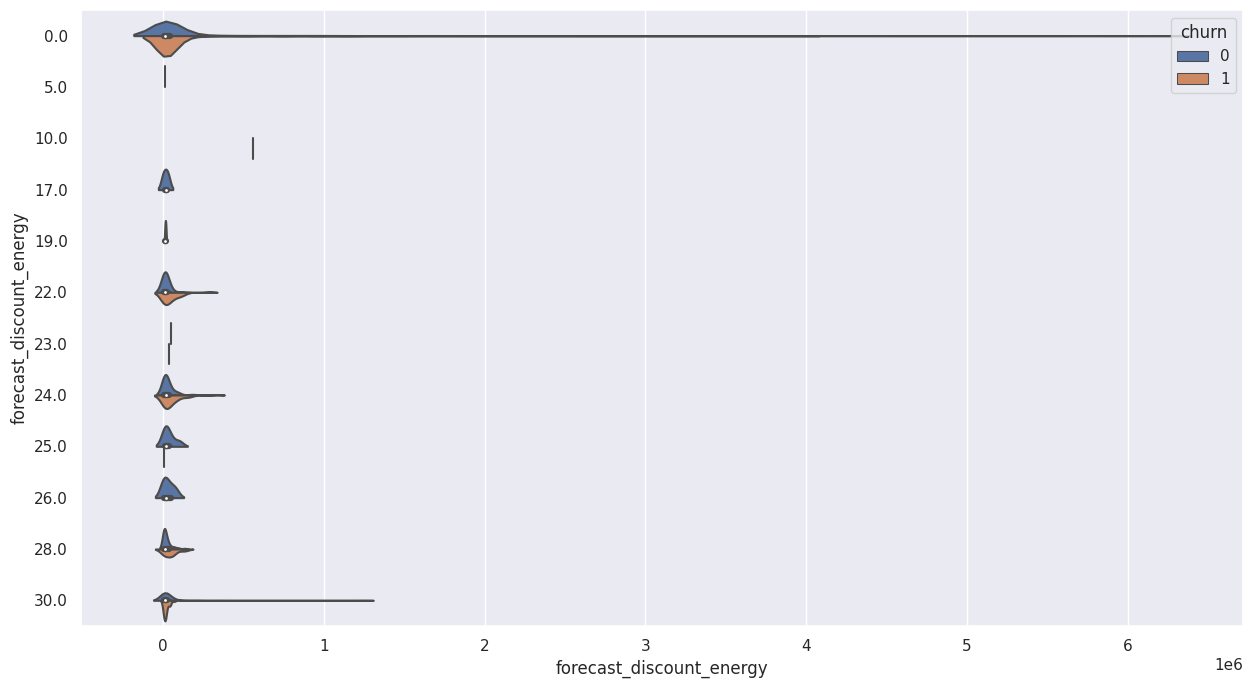

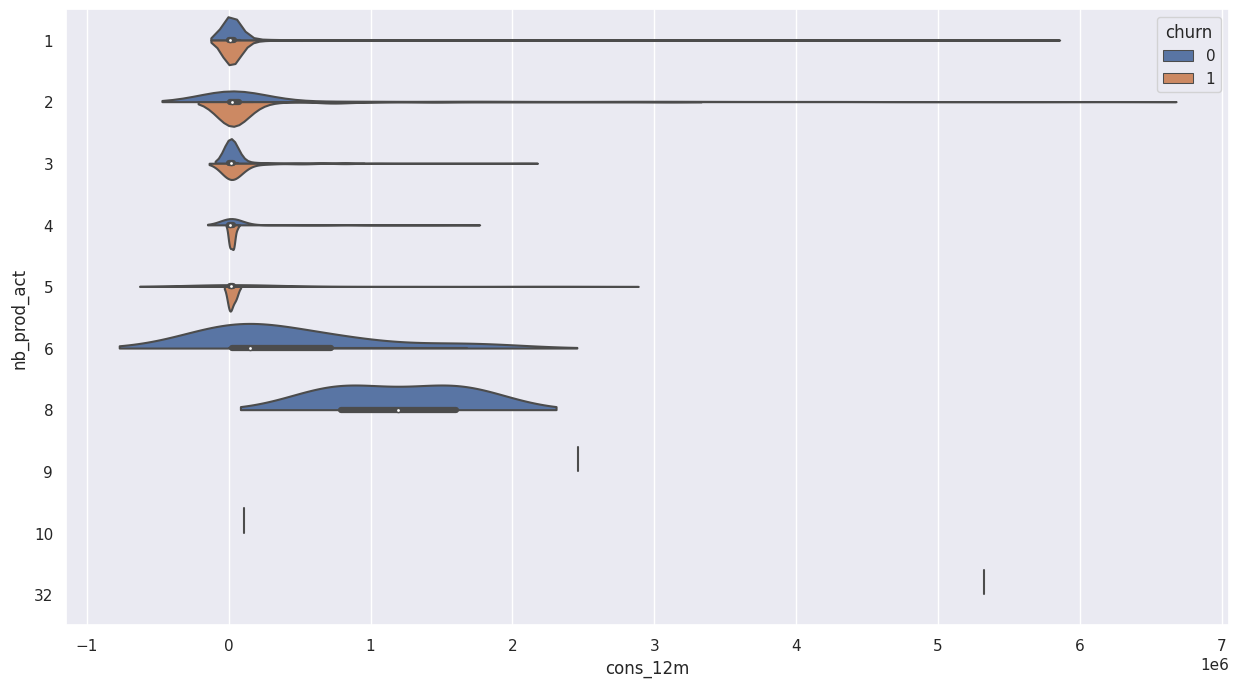

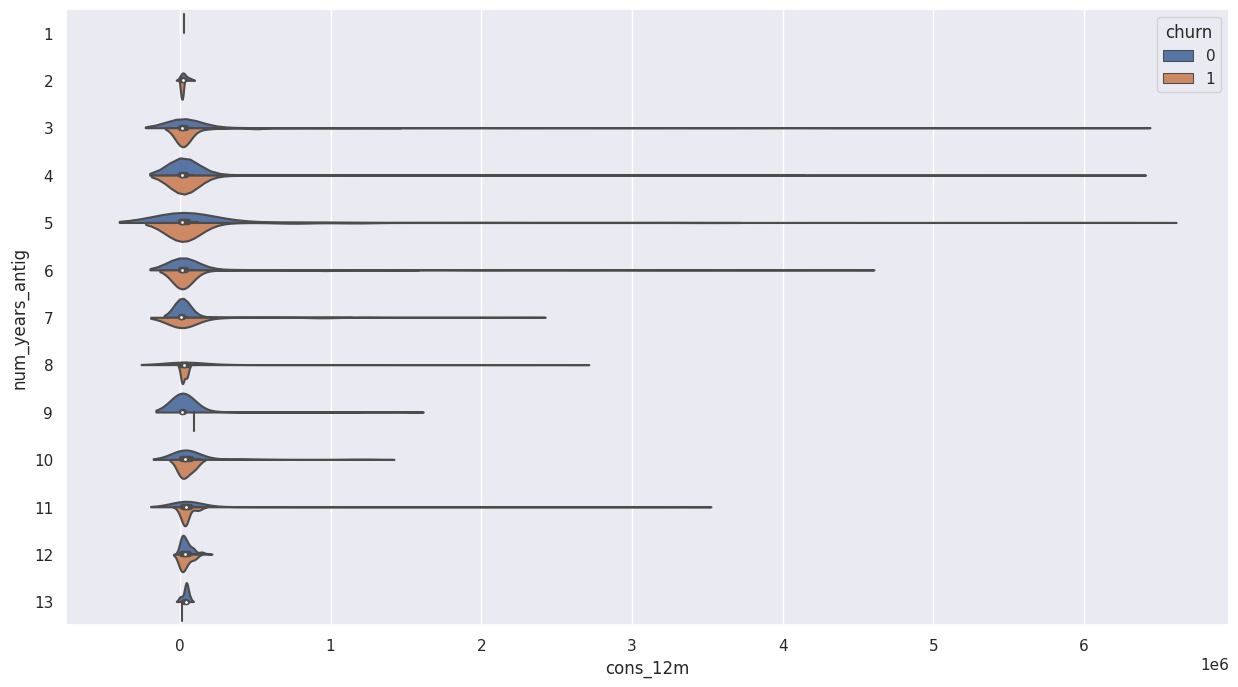

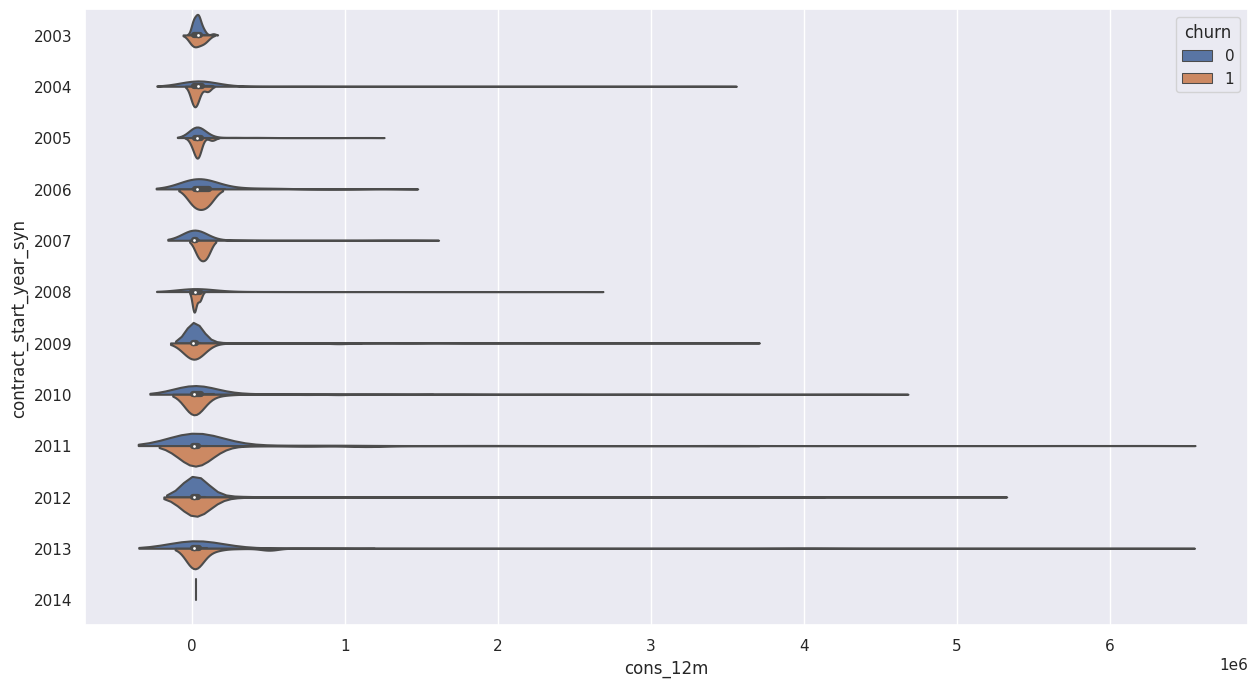

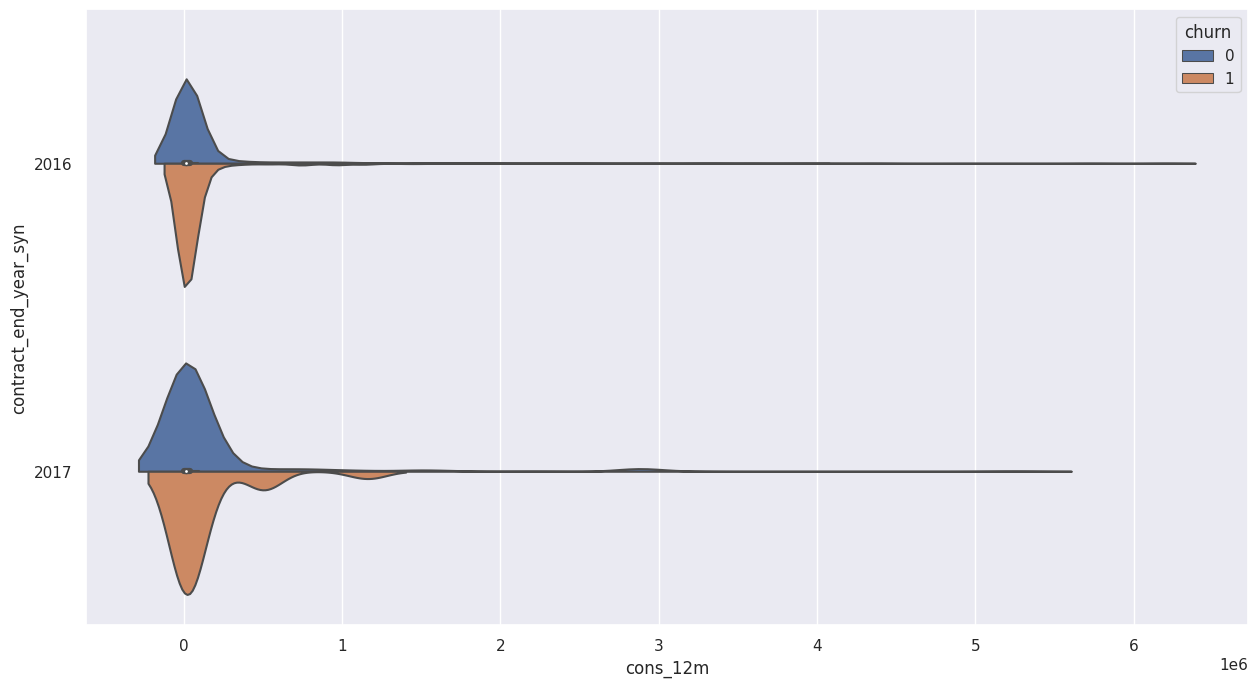

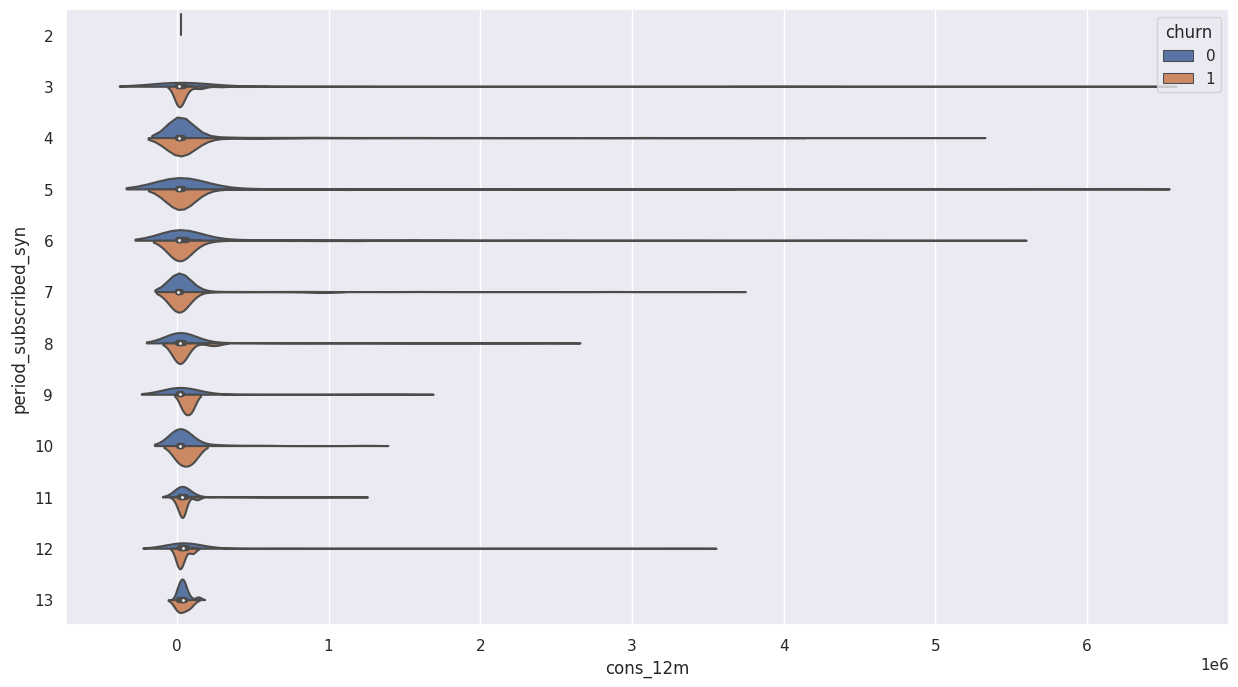

In [26]:
## Discrete numeric features

df = client_num_discrete.drop('churn', axis=1)
cols = df.columns.to_list()
fig, ax = plt.subplots()

for feature in cols:
    g1 = sns.violinplot(data=df, y=feature, x=client['cons_12m'], hue = client['churn'], split=True, orient='h')
    ax.set_xlabel(feature)
    plt.show();    

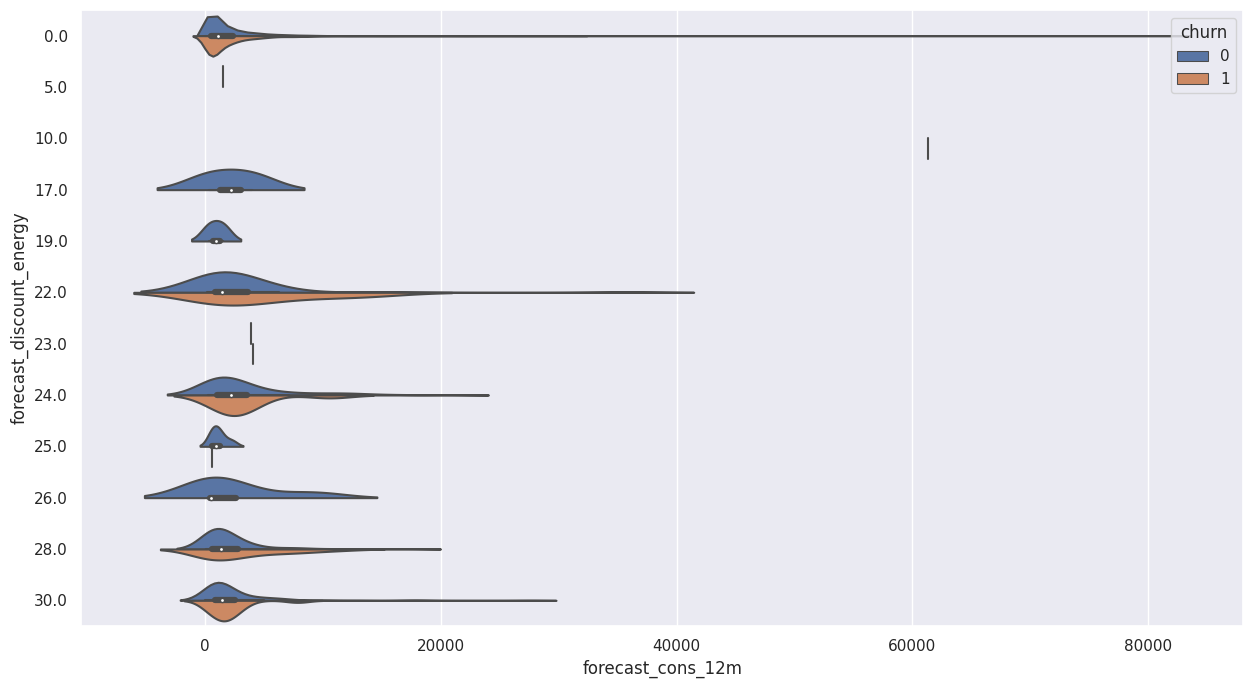

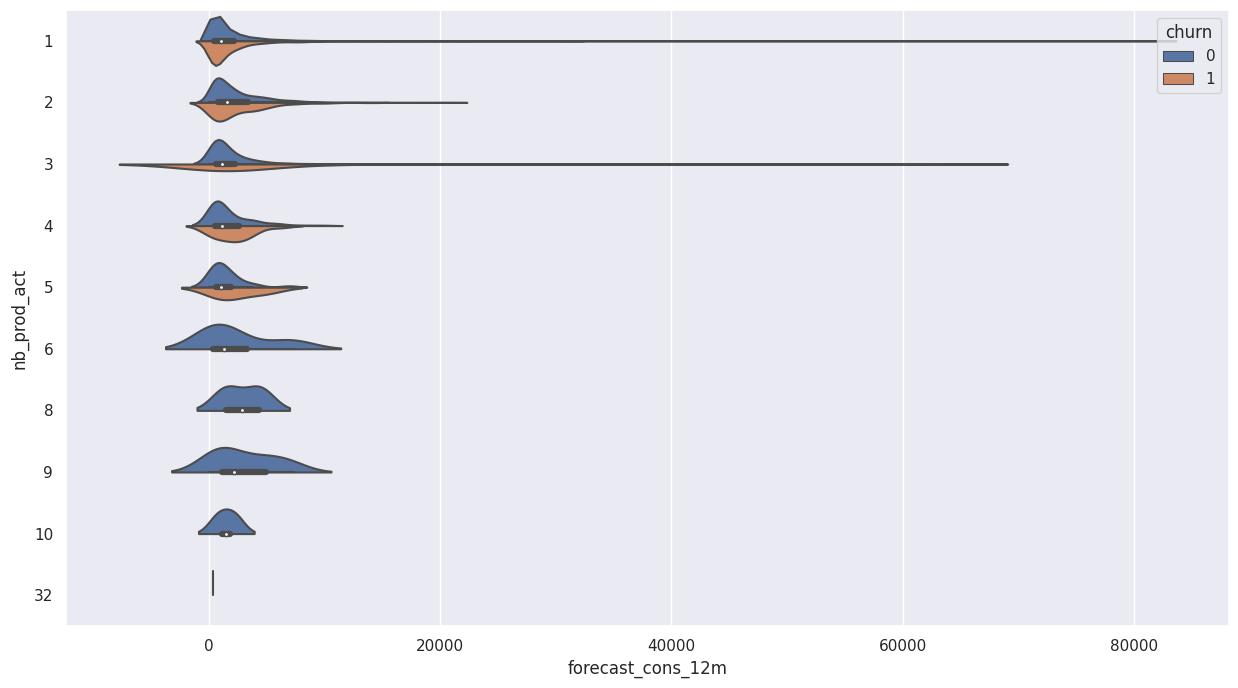

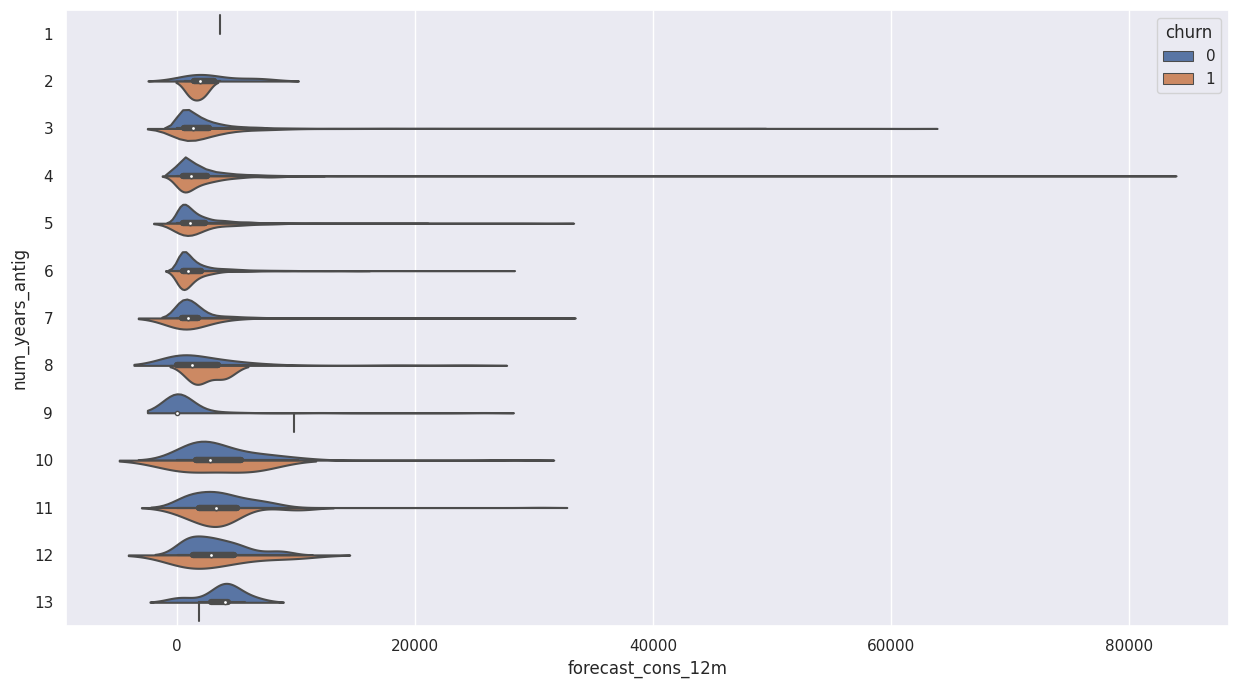

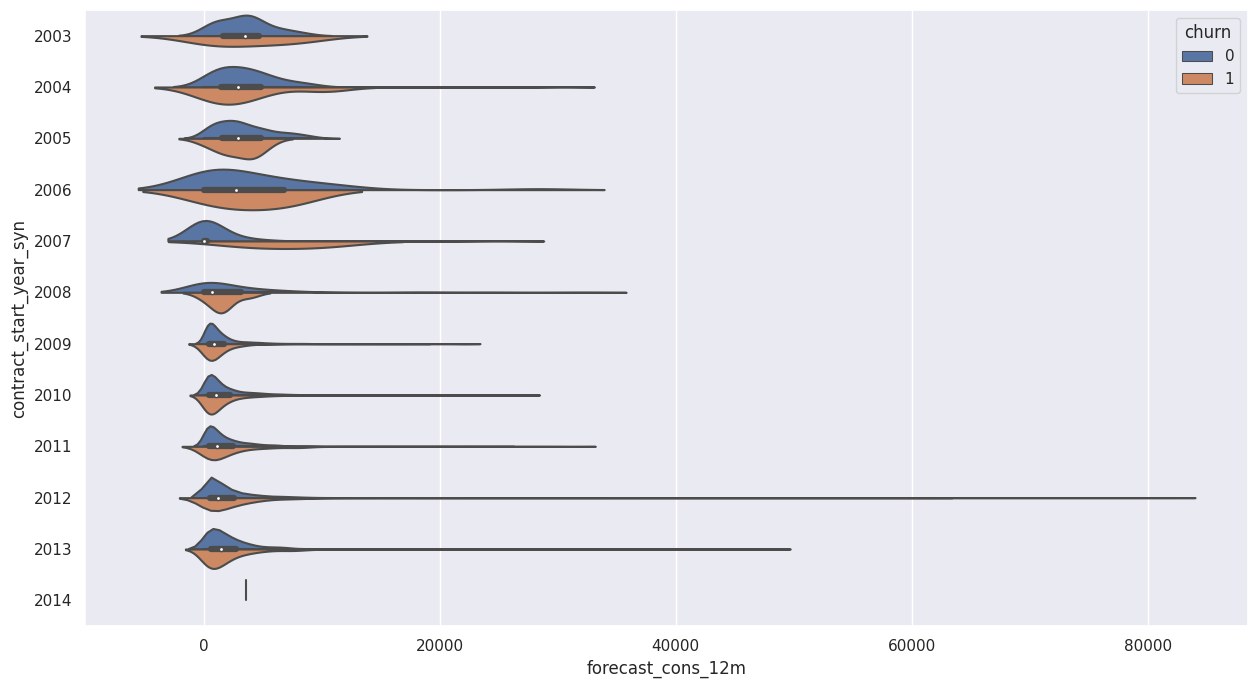

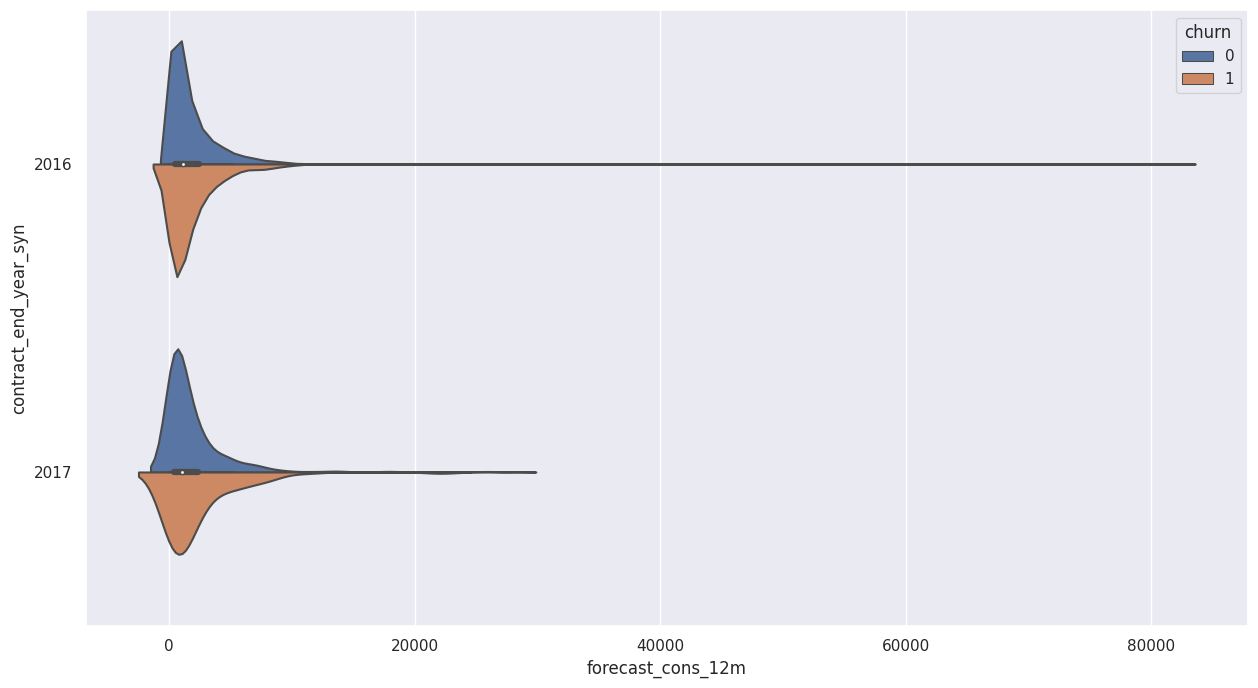

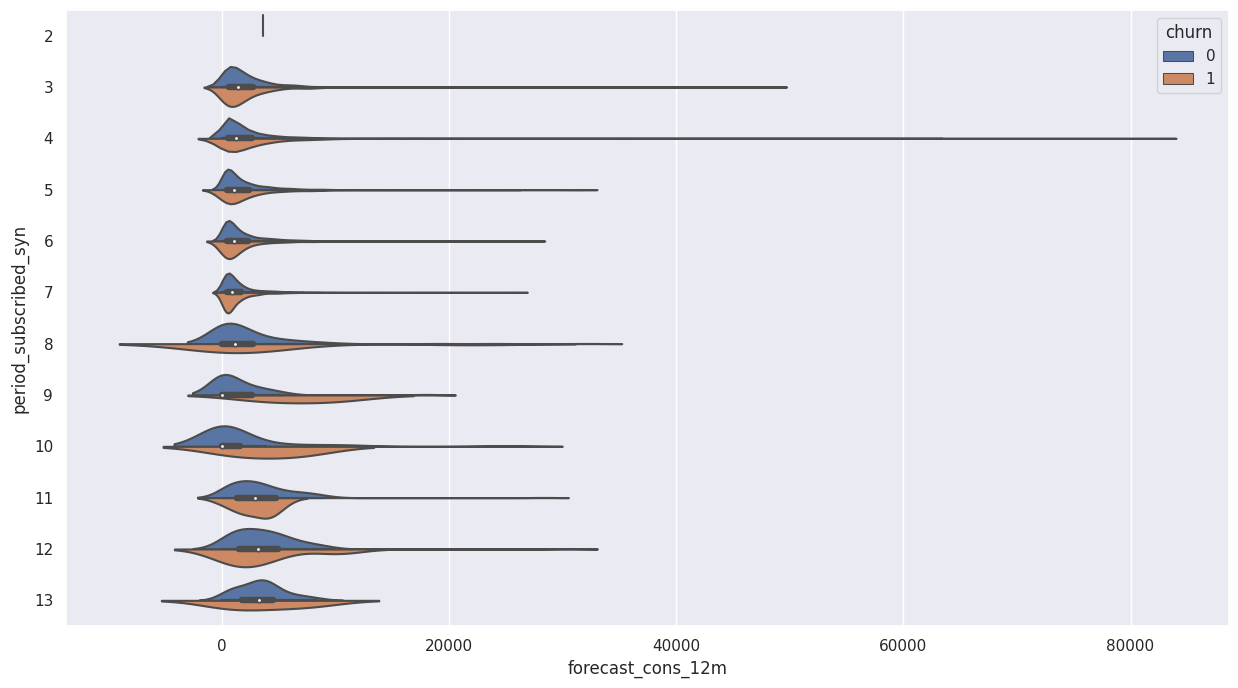

In [27]:
for feature in cols:    
    g2 = sns.violinplot(data=df, y=feature, x=client['forecast_cons_12m'], hue = client['churn'], split=True, orient = 'h')    
    ax.set_xlabel(feature)
    plt.show();

1. Churners have number of activated products less than 6. In fact, a large portion of them are limited to 3 products with decreasing count towards higher counts of 4 and 5, as observed from the orange spread.

2. The nb_prod_act feature shows variability for non-churners above a count of 5. 

3. Theres a clear trend where some older, outlier consumers have higher consumption levels than newer outlier consumers.


# Let's merge client and price datsets to track price changes per customer

In [ ]:
merged_data = pd.merge(client, price, on='id', how='inner')

In [29]:
merged_data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'contract_start_year_syn', 'contract_end_year_syn',
       'period_subscribed_syn', 'price_date', 'price_off_peak_var',
       'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix',
       'price_peak_fix', 'price_mid_peak_fix', 'fixed_price_component',
       'var_price_component', 'off_peak_price_component',
       'mid_peak_price_component', 'peak_price_component', 'monthly_bill'],
      dtype='object')

## Now that we've merged both, let's first address the ambiguity in feature descriptions of price dataset 

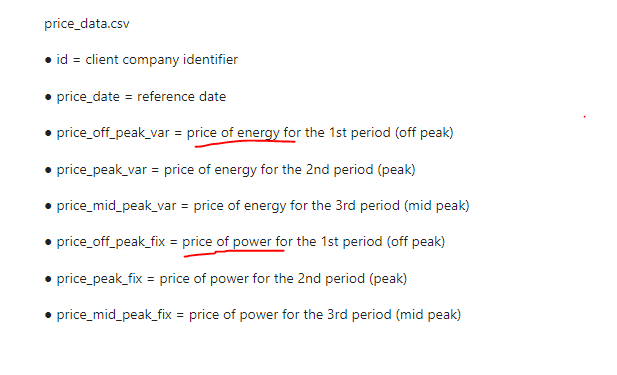

Using both the terms energy and power is confusing. Dividing Energy by Power should return the time span of consumption. Lets test this.

In [30]:
df = merged_data.copy()

In [31]:
df['cons_off_peak'] = df.price_off_peak_var/df.price_off_peak_fix
df['cons_mid_peak'] = df.price_mid_peak_var/df.price_mid_peak_fix
df['cons_peak'] = df.price_peak_var/df.price_peak_fix

In [32]:
df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  175149.000    175149.000       175149.000         175149.000   
mean   159260.579     28080.718        16095.518           1868.344   
std    573541.331    162940.034        64376.742           2387.560   
min         0.000         0.000            0.000              0.000   
25%      5674.000         0.000            0.000            494.980   
50%     14115.000         0.000          792.000           1112.610   
75%     40763.000         0.000         3383.000           2400.350   
max   6207104.000   4154590.000       771203.000          82902.830   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count          175149.000                175149.000               175149.000   
mean             1399.782                     0.967                   63.075   
std              3248.331                     5.109                   66.144   
min                 0.000                     0.000                    0.000   
25%                 0.000                     0.000                   16.180   
50%               314.000                     0.000                   18.790   
75%              1745.000                     0.000                  131.030   
max            175375.000                    30.000                  599.310   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                      175149.000                  175149.000   
mean                            0.137                       0.050   
std                             0.025                       0.049   
min                             0.000                       0.000   
25%                             0.116                       0.000   
50%                             0.143                       0.084   
75%                             0.146                       0.099   
max                             0.274                       0.196   

       forecast_price_pow_off_peak   imp_cons  margin_gross_pow_ele  \
count                   175149.000 175149.000            175149.000   
mean                        43.130    152.790                24.567   
std                          4.487    341.427                20.234   
min                          0.000      0.000                 0.000   
25%                         40.607      0.000                14.280   
50%                         44.311     37.390                21.640   
75%                         44.311    193.990                29.880   
max                         59.266  15042.790               374.640   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
count          175149.000   175149.000  175149.000       175149.000   
mean               24.564        1.292     189.245            4.998   
std                20.234        0.710     311.847            1.612   
min                 0.000        1.000       0.000            1.000   
25%                14.280        1.000      50.710            4.000   
50%                21.640        1.000     112.500            5.000   
75%                29.880        1.000     243.000            6.000   
max               374.640       32.000   24570.650           13.000   

         pow_max      churn  contract_start_year_syn  contract_end_year_syn  \
count 175149.000 175149.000               175149.000             175149.000   
mean      18.135      0.097                 2010.577               2016.065   
std       13.536      0.296                    1.653                  0.246   
min        3.300      0.000                 2003.000               2016.000   
25%       12.500      0.000                 2010.000               2016.000   
50%       13.856      0.000                 2011.000               2016.000   
75%       19.180      0.000                 2012.000               2016.000   
max      320.000      1.000                 2014.000               2017.000   

       period_subscribed_syn  pric

### The df.describe reveals some values of  the 3 new consumption features (extreme right) are np.inf and the IQR values dont match the order of magnitude of any of the consumption features (first 5 columns in the describe function output). Hence I choose to ignore these and continue with the assumption that all price features are reflective of consumption at actuals and not rates.  

In [33]:
merged_data.head(30)

id                     channel_sales  \
0   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
3   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
4   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
5   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
6   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
7   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
8   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
9   24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
10  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
11  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
12  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
13  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
14  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
15  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
16  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
17  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
18  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
19  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
20  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
21  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
22  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
23  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
24  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
25  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
26  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
27  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
28  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
29  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

    cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0          0         54946                0 2013-06-15 2016-06-15   
1          0         54946                0 2013-06-15 2016-06-15   
2          0         54946                0 2013-06-15 2016-06-15   
3          0         54946                0 2013-06-15 2016-06-15   
4          0         54946                0 2013-06-15 2016-06-15   
5          0         54946                0 2013-06-15 2016-06-15   
6          0         54946                0 2013-06-15 2016-06-15   
7          0         54946                0 2013-06-15 2016-06-15   
8          0         54946                0 2013-06-15 2016-06-15   
9          0         54946                0 2013-06-15 2016-06-15   
10         0         54946                0 2013-06-15 2016-06-15   
11         0         54946                0 2013-06-15 2016-06-15   
12      4660             0                0 2009-08-21 2016-08-30   
13      4660             0                0 2009-08-21 2016-08-30   
14      4660             0                0 2009-08-21 2016-08-30   
15      4660             0                0 2009-08-21 2016-08-30   
16      4660             0                0 2009-08-21 2016-08-30   
17      4660             0                0 2009-08-21 2016-08-30   
18      4660             0                0 2009-08-21 2016-08-30   
19      4660             0                0 2009-08-21 2016-08-30   
20      4660             0                0 2009-08-21 2016-08-30   
21      4660             0                0 2009-08-21 2016-08-30   
22      4660             0                0 2009-08-21 2016-08-30   
23      4660             0                0 2009-08-21 2016-08-30   
24       544  

In [34]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  object        
 1   channel_sales                   175149 non-null  object        
 2   cons_12m                        175149 non-null  int64         
 3   cons_gas_12m                    175149 non-null  int64         
 4   cons_last_month                 175149 non-null  int64         
 5   date_activ                      175149 non-null  datetime64[ns]
 6   date_end                        175149 non-null  datetime64[ns]
 7   date_modif_prod                 175149 non-null  datetime64[ns]
 8   date_renewal                    175149 non-null  datetime64[ns]
 9   forecast_cons_12m               175149 non-null  float64       
 10  forecast_cons_year              175149 non-null  int64  

## These features - channel_sales , origin_up, has_gas are nominal. So we will encode them.

In [35]:
a, b = client.channel_sales.unique(), client.origin_up.unique()

replace_dict = {**{i:i[:5] for i in a},
                 **{i:i[:5] for i in b}} ## concat dictionaries
replace_dict

{'foosdfpfkusacimwkcsosbicdxkicaua': 'foosd',
 'MISSING': 'MISSI',
 'lmkebamcaaclubfxadlmueccxoimlema': 'lmkeb',
 'usilxuppasemubllopkaafesmlibmsdf': 'usilx',
 'ewpakwlliwisiwduibdlfmalxowmwpci': 'ewpak',
 'epumfxlbckeskwekxbiuasklxalciiuu': 'epumf',
 'sddiedcslfslkckwlfkdpoeeailfpeds': 'sddie',
 'fixdbufsefwooaasfcxdxadsiekoceaa': 'fixdb',
 'lxidpiddsbxsbosboudacockeimpuepw': 'lxidp',
 'kamkkxfxxuwbdslkwifmmcsiusiuosws': 'kamkk',
 'ldkssxwpmemidmecebumciepifcamkci': 'ldkss',
 'usapbepcfoloekilkwsdiboslwaxobdp': 'usapb',
 'ewxeelcelemmiwuafmddpobolfuxioce': 'ewxee'}

In [36]:
## one hot encoding
merged_data = merged_data.replace(replace_dict)
merged_data = pd.get_dummies(merged_data, columns=['channel_sales' , 'origin_up'])

## label encoding 
has_gas_encoder = LabelEncoder()
merged_data['has_gas'] = has_gas_encoder.fit_transform(merged_data['has_gas']) #t=1, f=0

## **Price Sensitivity and Churn**
#### Now would be a good stage to define price sensitivity of customers. The price sensitivity is a measure of the customer's willingness to pay an additional unit of good/service at a certain price point. In other words, its a measure of change of customer's purchasing behaviour ata certain price.

#### Price Sensitivity is influenced by various factors: 
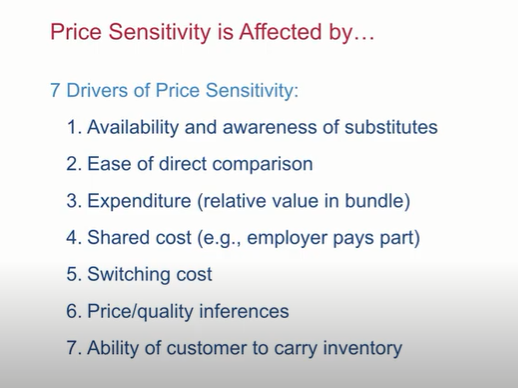

As the **Law of Diminishing Demand** states, the demand for a (normal) good decreases with increase in price. Here's an [article](https://www.investopedia.com/terms/p/priceelasticity.asp#:~:text=is%20quite%20elastic.-,What%20is%20price%20elasticity%20of%20demand%3F,when%20a%20product's%20price%20changes.) for better understanding. Demand curves are downward sloping in microeconomic models since each additional unit of a good or service is put toward a less valuable use.

**Inelastic demand** of a good/service implies there is **no significant % change in demand with change in price. And in this case, client does not churn.**

**Elastic demand** of a good/service implies there is **significant % change in demand with change in price. Here, the client churns.** The price threshold for churn is the price above which the customer churns.

One of our tasks in this step of the challenge would be to come up with definition for this price sensitivity for a client. We will deal with this later in this notebook.

We have our demand/consumption details in place. So let's test the validity of the Law of Demand for the utilities of gas and electricity supply. Price sensitivity/elasticity of demand is defined as **(change in demand/original demand)/(change in price/old price)**

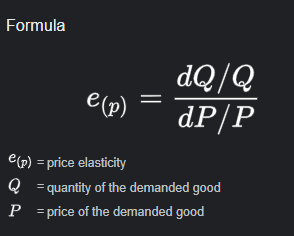


Demand curves are downward sloping in microeconomic models since each additional unit of a good or service is put toward a less valuable use.

In [ ]:
merged_df = merged_data.copy()
merged_df.info()
#id_encoder = LabelEncoder()
#merged_df['id'] = id_encoder.fit_transform(merged_df['id'])

In [ ]:
merged_df[merged_df.churn==1]

In [38]:
## grouping columns for ease
id = 'id'
cons = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 
        'forecast_cons_12m', 'forecast_cons_year',  'pow_max']
dates = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'contract_start_year', 'contract_end_year']       
forecast = ['forecast_discount_energy','forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak'], 
has_gas = 'has_gas',
churn = 'churn'
current_consumption = 'imp_cons' 
profit_margins = ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin'] 
num_products = 'nb_prod_act',
aging =[ 'num_years_antig', 'period_subscribed'] 
campaign = 'origin_up',
price_features = ['price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'total_price']

In [39]:
merged_df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
2  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
3  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
4  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   

  date_activ   date_end date_modif_prod date_renewal  forecast_cons_12m  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23              0.000   
1 2013-06-15 2016-06-15      2015-11-01   2015-06-23              0.000   
2 2013-06-15 2016-06-15      2015-11-01   2015-06-23              0.000   
3 2013-06-15 2016-06-15      2015-11-01   2015-06-23              0.000   
4 2013-06-15 2016-06-15      2015-11-01   2015-06-23              0.000   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                     0.000                    1.780   
1                   0                     0.000                    1.780   
2                   0                     0.000                    1.780   
3                   0                     0.000                    1.780   
4                   0                     0.000                    1.780   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                           0.114                       0.098   
1                           0.114                       0.098   
2                           0.114                       0.098   
3                           0.114                       0.098   
4                           0.114                       0.098   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                       40.607        1     0.000                25.440   
1                       40.607        1     0.000                25.440   
2                       40.607        1     0.000                25.440   
3                       40.607        1     0.000                25.440   
4                       40.607        1     0.000                25.440   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
0              25.440            2     678.990                3   43.648   
1              25.440            2     678.990                3   43.648   
2              25.440            2     678.990                3   43.648   
3              25.440            2     678.990                3   43.648   
4              25.440            2     678.990                3   43.648   

   churn  contract_start_year_syn  contract_end_year_syn  \
0      1                     2013                   2016   
1      1                     2013                   2016   
2      1                     2013                   2016   
3      1                     2013                   2016   
4      1                     2013                   2016   

   period_subscribed_syn price_date  price_off_peak_var  price_peak_var  \
0                      3 2015-01-01               0.126           0.103   
1                      3 2015-02-01               0.126           0.103   
2                      3 2015-03-01               0.126           0.103   
3                      3 2015-04-01               0.126           0.103   
4                      3 2015-05-01               0.126           0.103   

   price_mid_peak_var  price_off_peak_fix  price_peak_fix  price_mid_peak_fix  \
0               0.072              40.566          24.340              16.226   
1               0.072              40.566          24.340              16.226   
2               0.072              40.566          24.340              16.226   
3               0.072              40.566          24.340              16.226   
4               0.072              40.566          24.340              16.226   

   fixed_price_component  var_price_component 

## This is interesting. The billing schedule from the price dataset gave us the price changes but not the corresponding shifts in monthly consumption levels. We would need this information from PowerCo to safely estimate price sensitivity of their customers.

# We will still go ahead and explore the features to gather more insights.
I'll define a method to visualize the correlation matrix and use Spearman's rank-order correlation check for monotonicity between different features.

In [40]:
def corr_map(df, title, method='spearman', numeric_only = True, tick_size = 16, annot_size=18, annot_kws=14):
    mask = np.triu(np.ones_like(df.corr(method=method,numeric_only=numeric_only), dtype=bool))
    heatmap = sns.heatmap(df.corr(method=method, numeric_only = numeric_only), fmt = '.1f',  annot = True, annot_kws = {'size': annot_kws}, mask=mask, cmap='BrBG')#
    plt.xticks(rotation=80, fontsize= tick_size)
    plt.yticks( fontsize= tick_size)
    
    heatmap.set_title(title, fontdict={'fontsize':annot_size}, pad=12)
    plt.show();

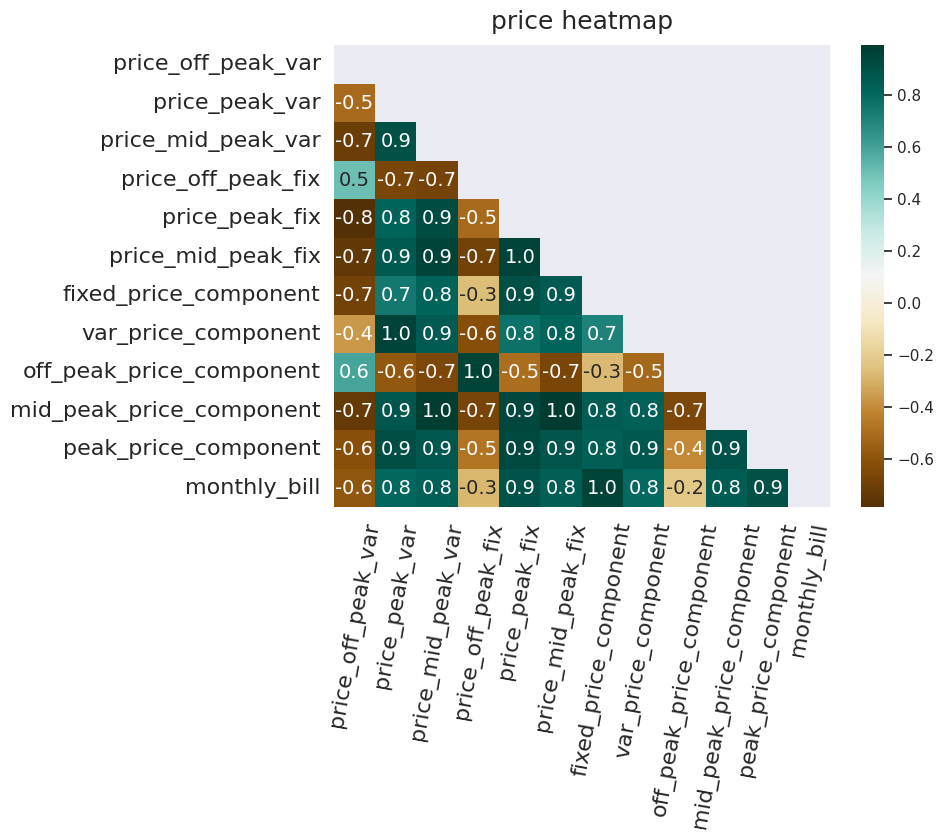

In [41]:
plt.figure(figsize=(8, 6))
corr_map(price, 'price heatmap')

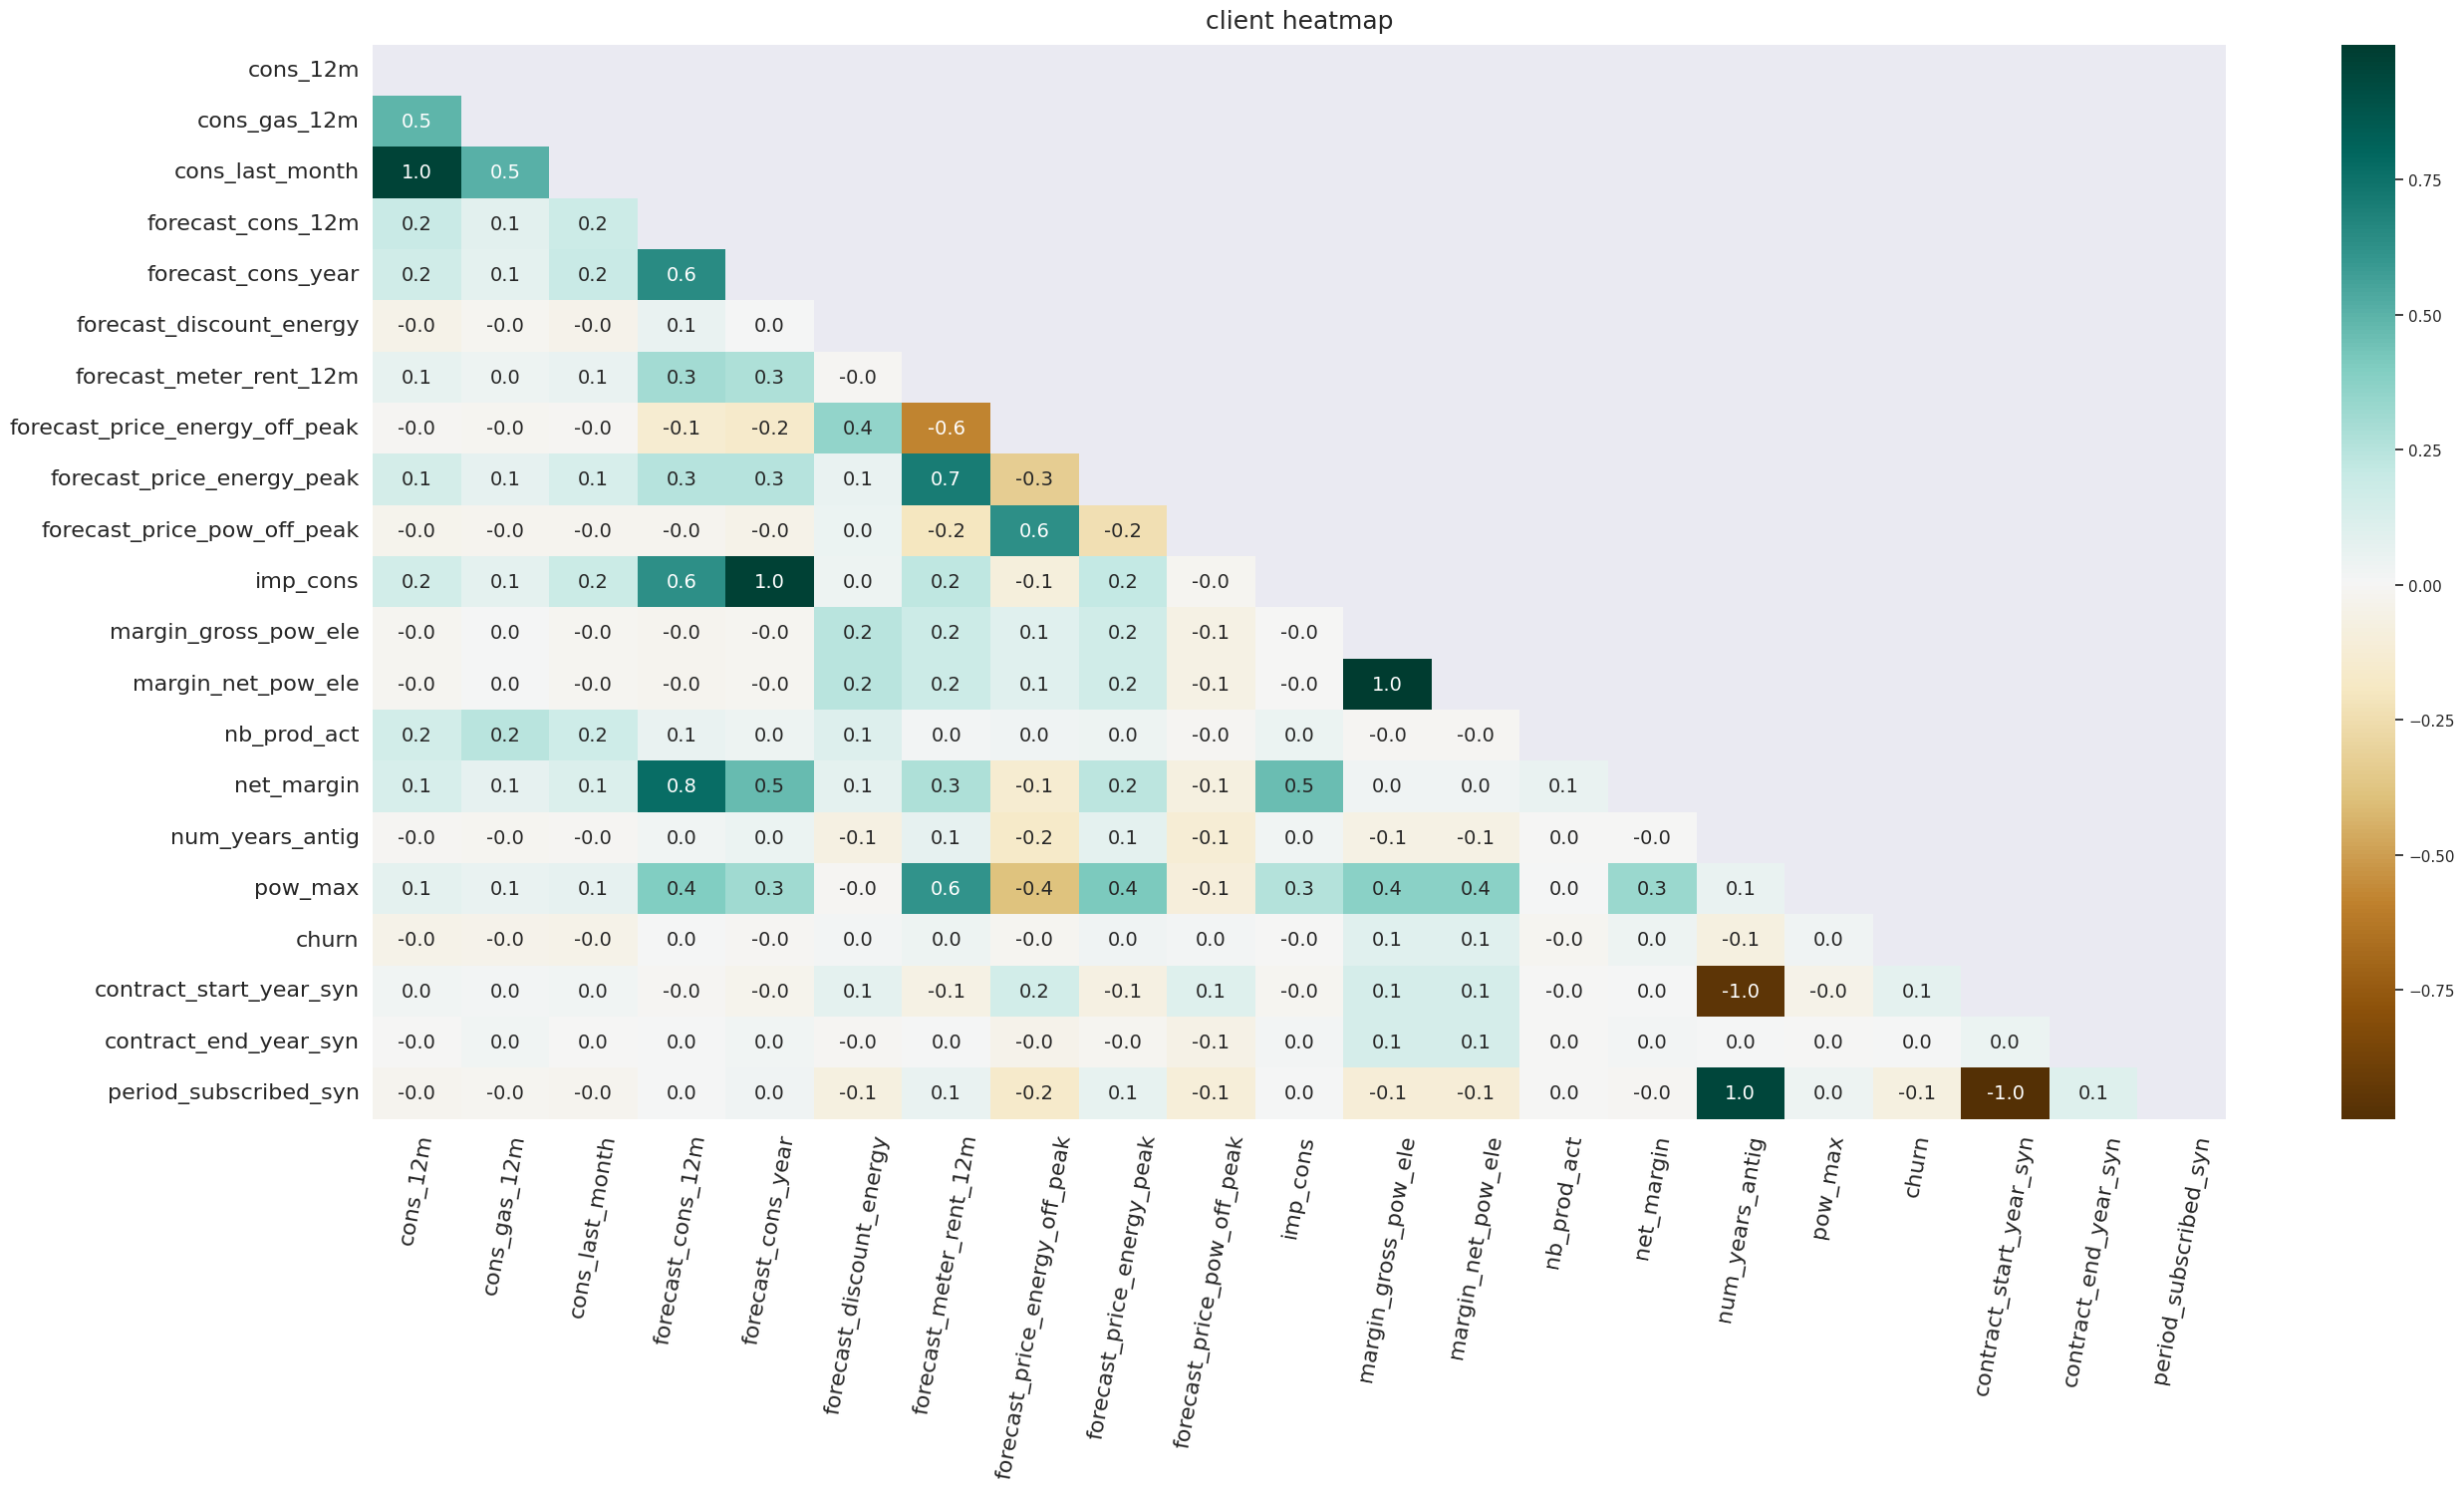

In [42]:
plt.figure(figsize=(30, 14))
corr_map(client, 'client heatmap', 'pearson')

### This shows a lot of weak Pearson correlations between the features. Let's take this a step further and explore the monotonicity.

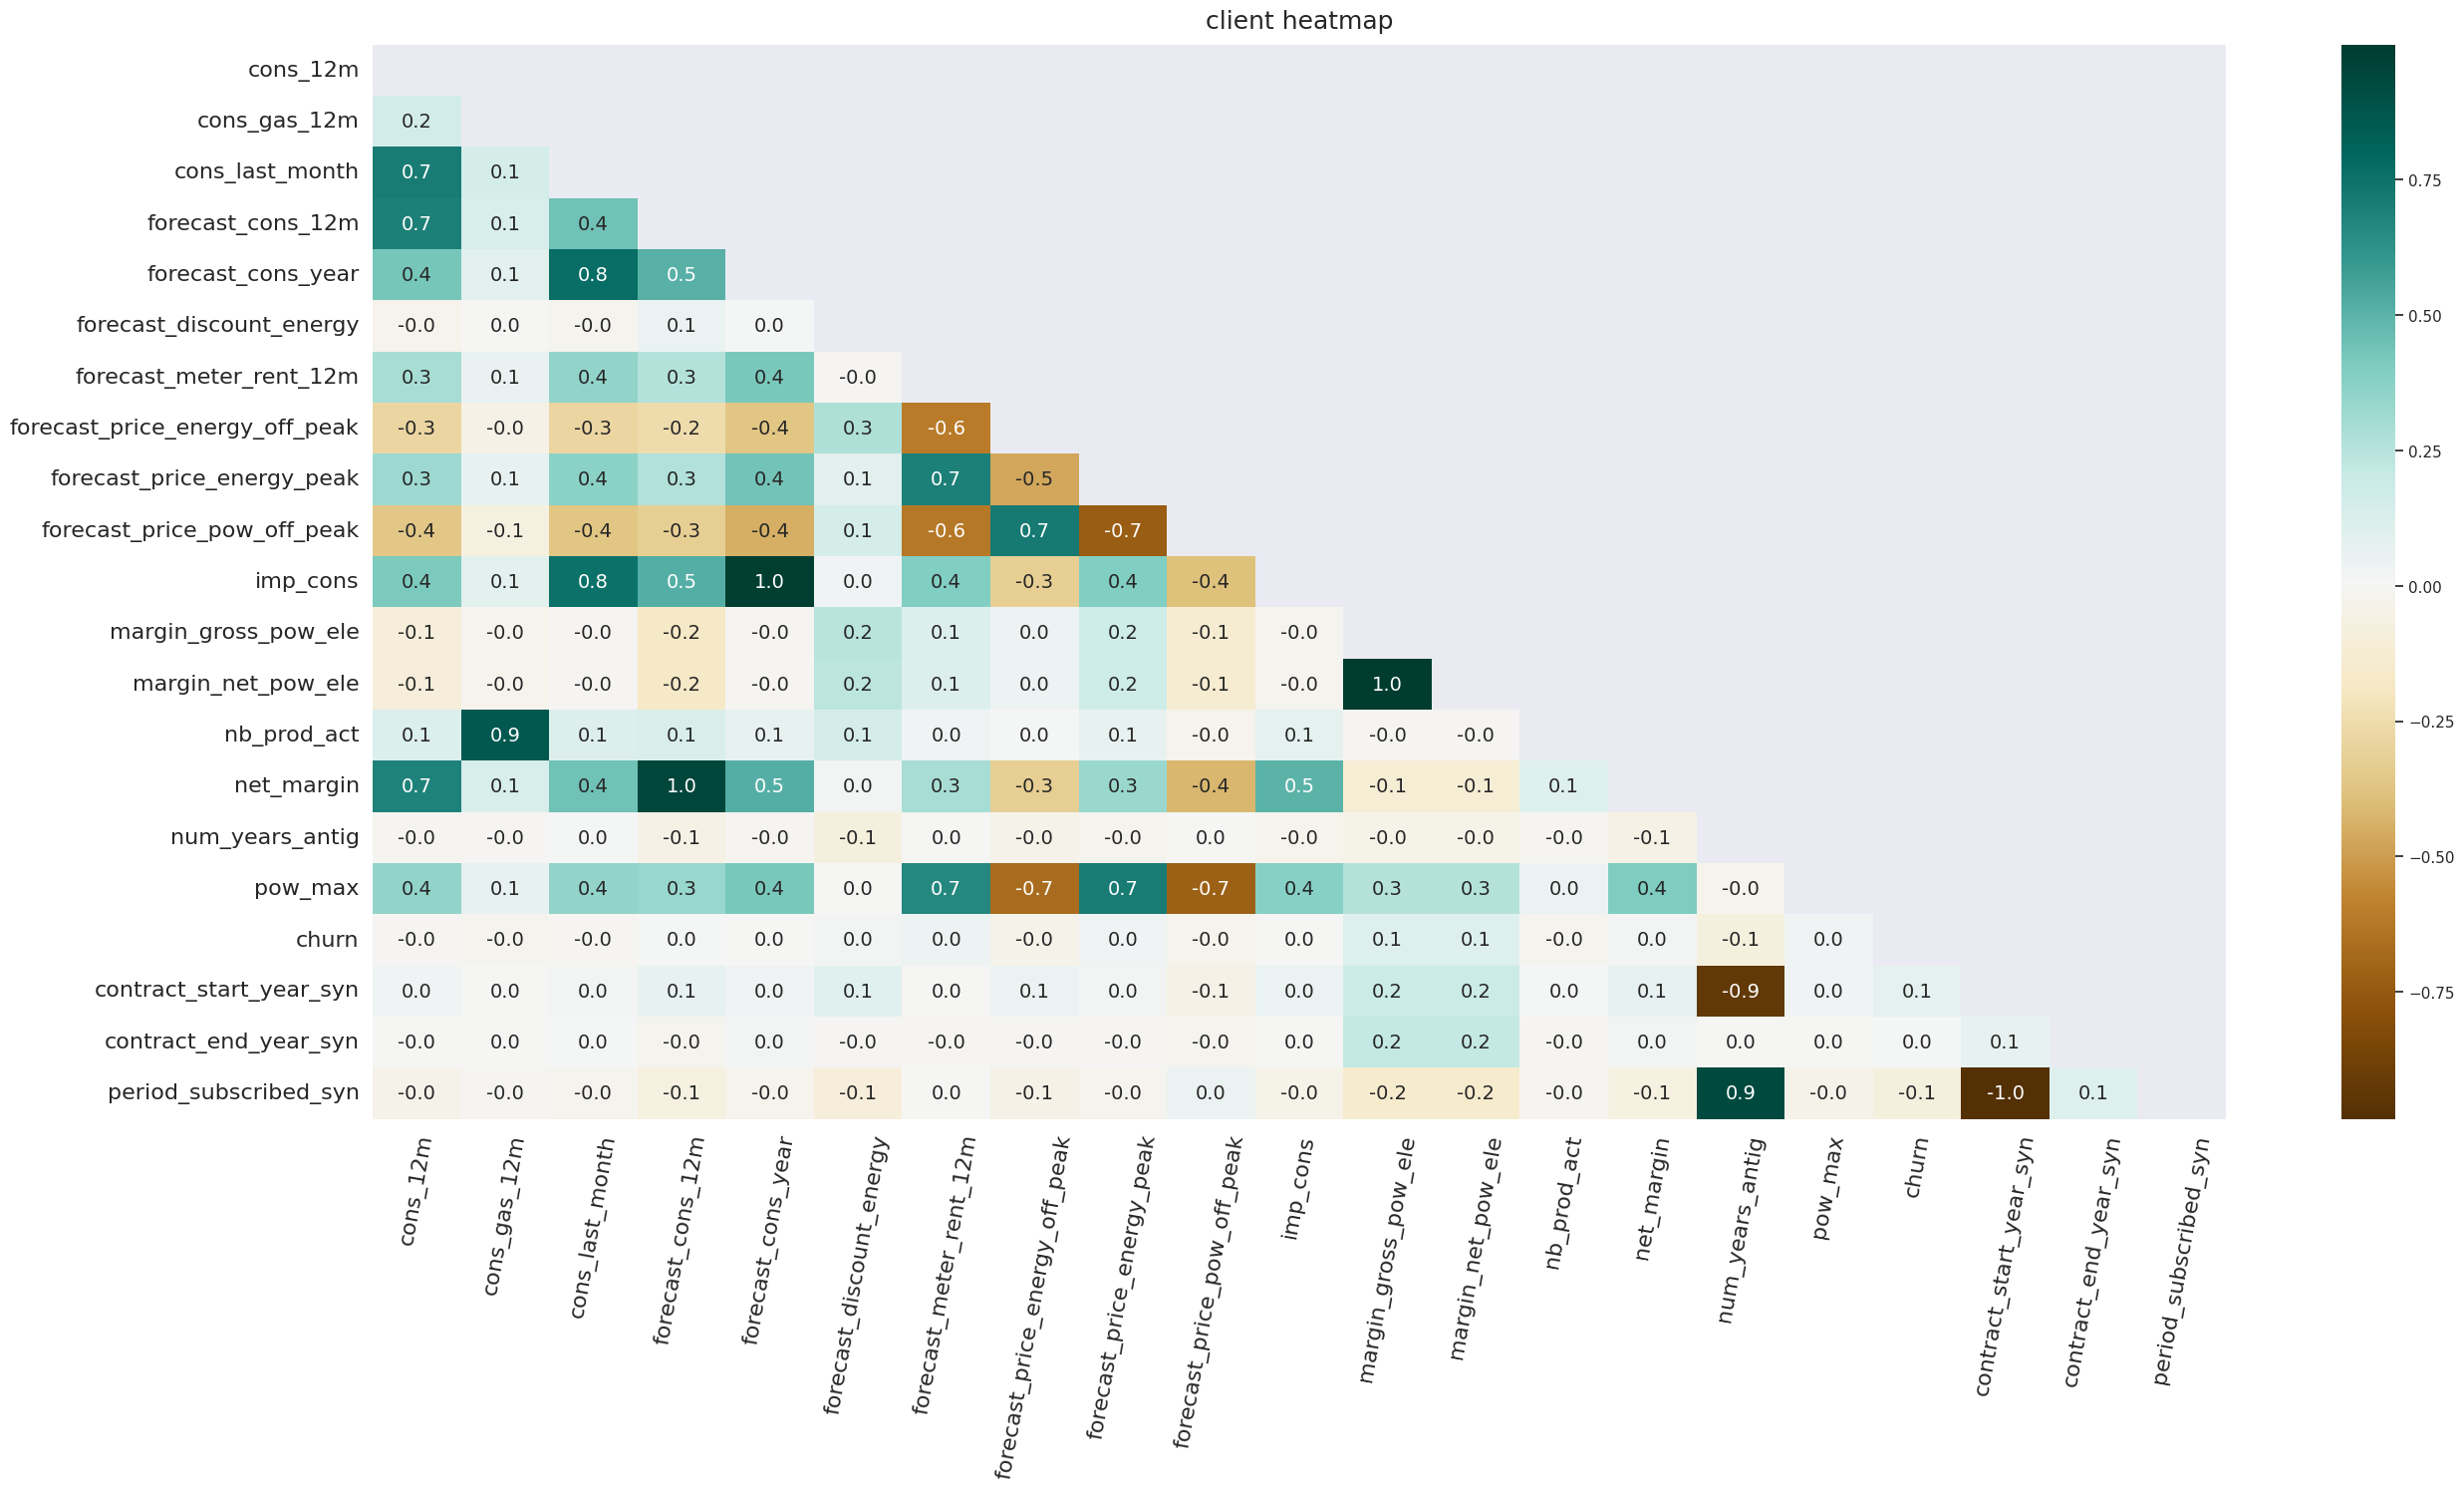

In [43]:
plt.figure(figsize=(30, 14))
corr_map(client, 'client heatmap')

Now this is far more revealing. There's strong trends between a lot of features.

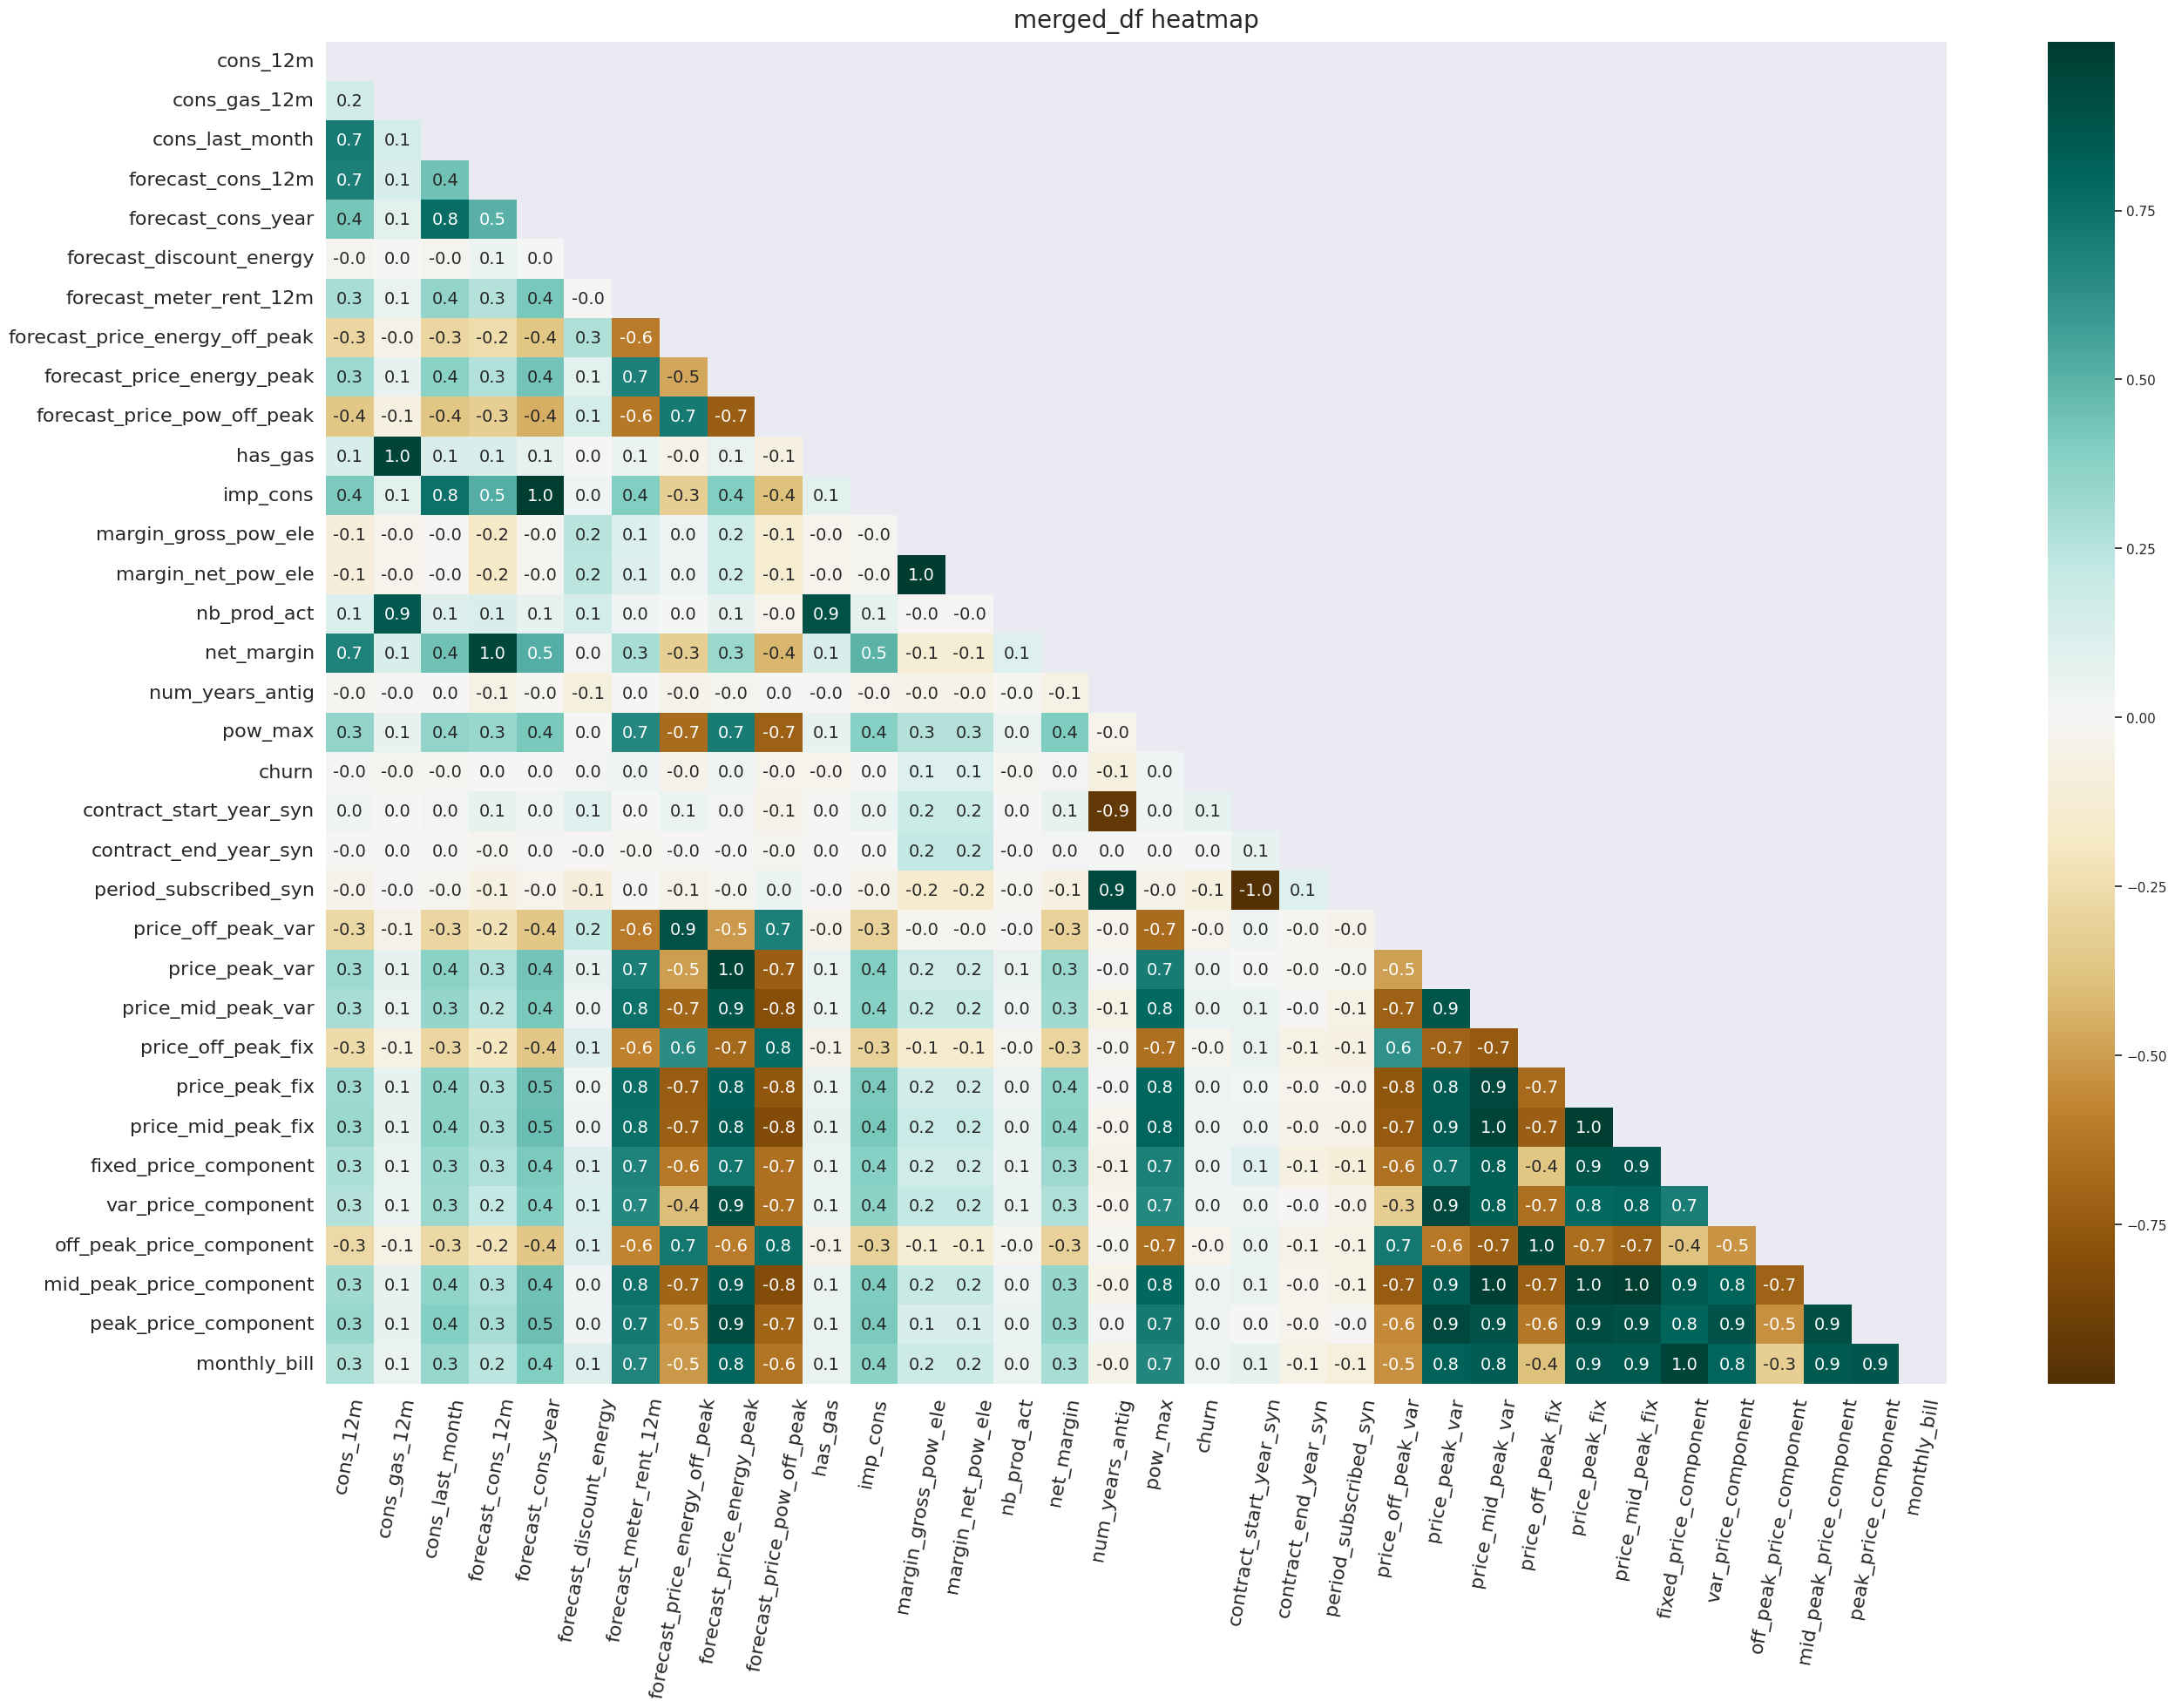

In [47]:
encoded = ['channel_sales_MISSI',
       'channel_sales_epumf', 'channel_sales_ewpak', 'channel_sales_fixdb',
       'channel_sales_foosd', 'channel_sales_lmkeb', 'channel_sales_sddie',
       'channel_sales_usilx', 'origin_up_MISSI', 'origin_up_ewxee',
       'origin_up_kamkk', 'origin_up_ldkss', 'origin_up_lxidp',
       'origin_up_usapb']

plt.figure(figsize=(30, 20))
corr_map(merged_df.drop(encoded, axis = 1), 'merged_df heatmap', 'spearman', annot_size=20)

# Key observations from the heatmaps:

1. forecast_cons_12m and imp_cons, the features describing **future and current demand are monotonic**, as expected.

2. The pairs, (forecast_cons_12m, cons_12m) (forecast_cons_12m, net_margin), and (cons_12m, net_margin) are strongly correlated, which means, the **current demand, future demand of electricity and profits are strongly pairwise-correlated**.

3. **Counterintuitivey, cons_12m is weakly correlated with the other forecast variables** like 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m','forecast_price_energy_off_peak','forecast_price_energy_peak', forecast_price_pow_off_peak'. Market research into competitors, changing privatized landscape of power distribution should be conducted to understand this inconsistency.

4. Most gas consumers also tend to use 2 products.

5. The forecasted price features are strongly correlated with each other and with the maximum power subscribed (pow_max). 

6. The forecasted price features also are strongly correlated with the pricing dataset features.

7. Off-peak prices seem to be negatively correlated to the other price components. This makes sense, off-peak consumption load decreses as the peak consumption increases and vice-versa. This is a clue that the pricing is indicative of demand.

8. Off-peak fixed price component contributes little to the monthly demand variability.

9. The billing pattern seem to strongly follow the maximum power subscribed, which could imply that the clients' utilization levels are extremely high.

10. The trends are not linear, which means feature transformations need be carried out.

### Lets explore the relationships between price features to the monthly bill, and the churn class.

In [48]:
price.columns[2:]

Index(['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix',
       'fixed_price_component', 'var_price_component',
       'off_peak_price_component', 'mid_peak_price_component',
       'peak_price_component', 'monthly_bill'],
      dtype='object')

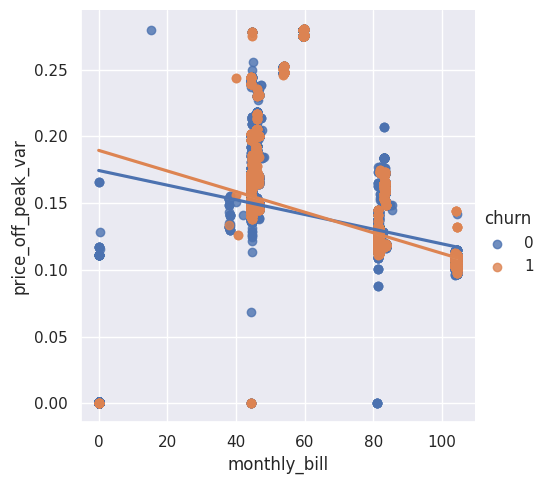

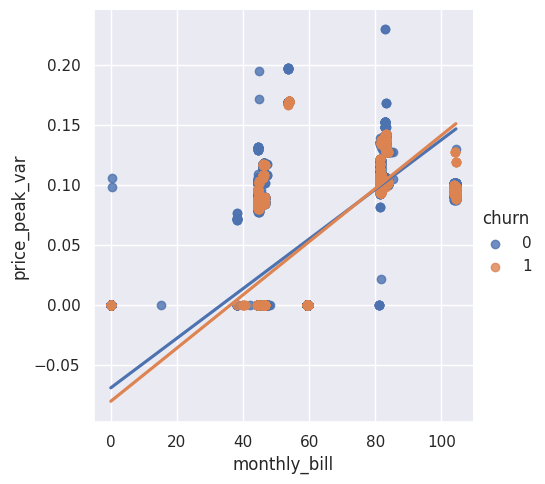

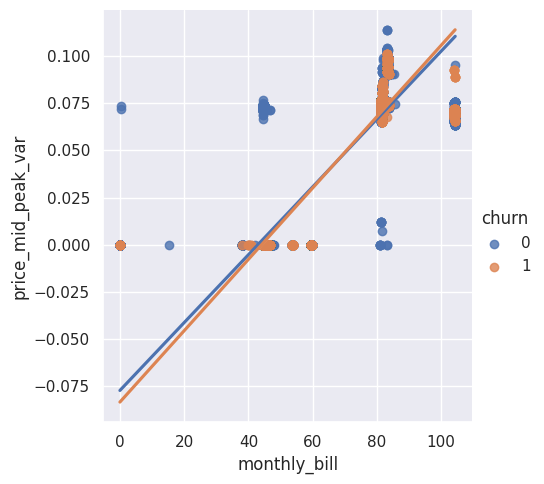

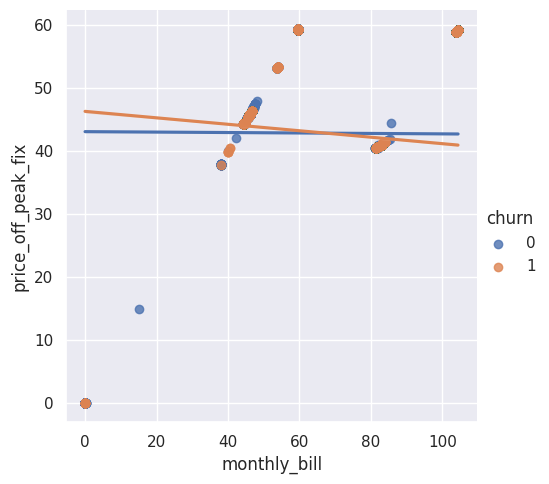

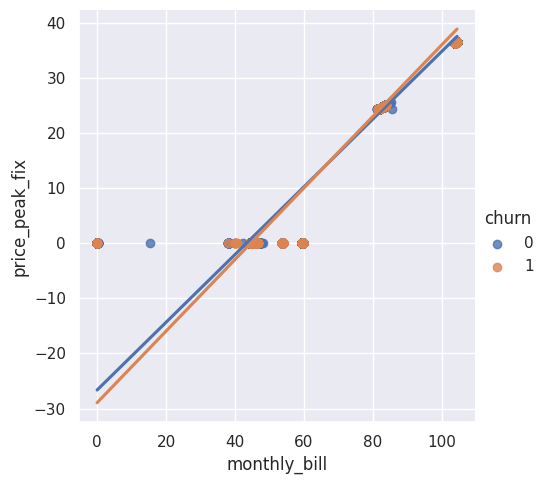

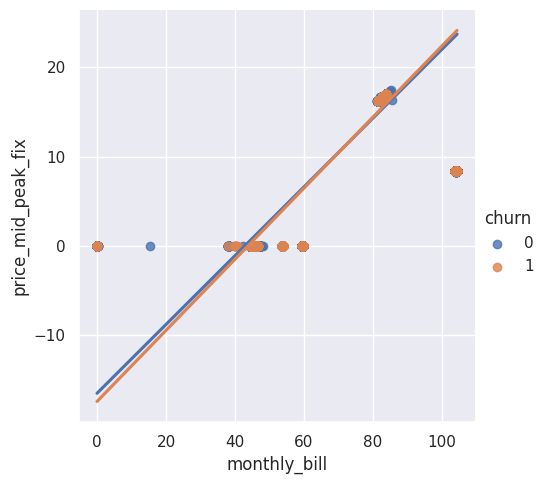

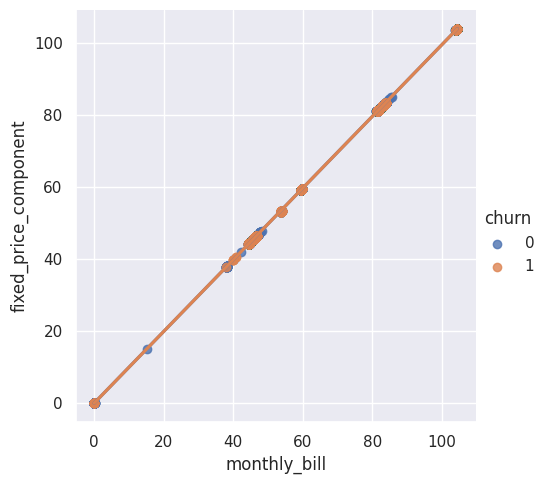

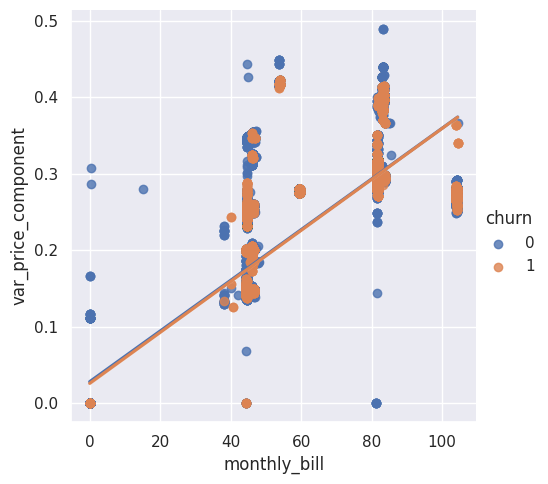

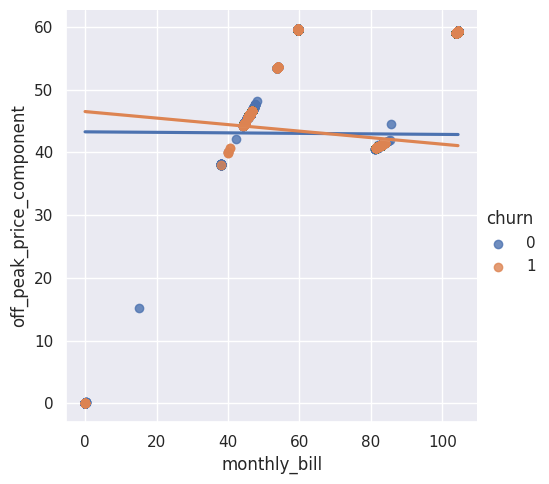

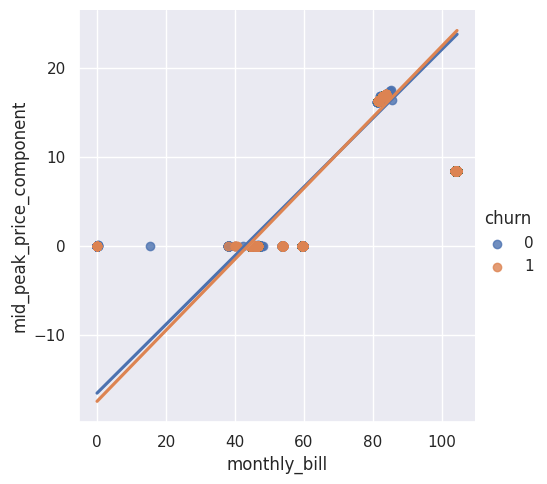

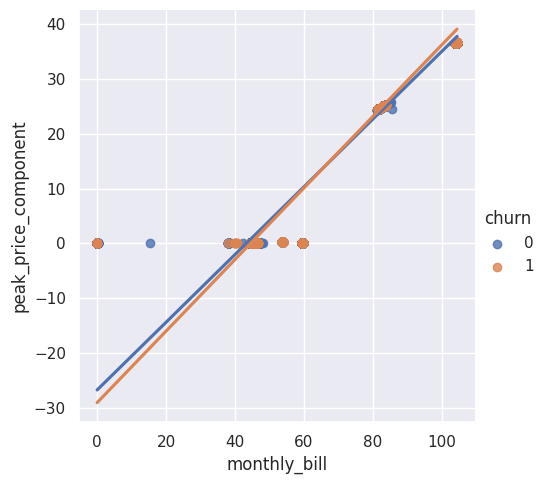

In [65]:
for feature in price.columns[2:-1]:
    sns.lmplot(data=merged_df, y = feature, x = 'monthly_bill', hue = 'churn')
    plt.show()

#### Observations:
1. Churn class seems to cause little variability in different price components.
2. Off-peak price component has little contribution to the variability of average monthly bill for both churn classes.

In [54]:
## grouping columns for ease
id = 'id'
cons = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 
        'forecast_cons_12m', 'forecast_cons_year', 'pow_max']
dates = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'contract_start_year', 'contract_end_year']       
forecast = ['forecast_discount_energy','forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak'], 
has_gas = 'has_gas',
churn = 'churn'
current_consumption = 'imp_cons' 
profit_margins = ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin'] 
num_products = 'nb_prod_act',
aging =[ 'num_years_antig', 'period_subscribed'] 
campaign = 'origin_up',
price_features = ['price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'total_price']

In [55]:
def descr_cat_features(dataset):
    cat_columns = dataset.dtypes[dataset.dtypes=='O'].index.tolist()
    if len(cat_columns)!=0:
        print('Categorical variables are', cat_columns,'\n'+'=='*40)
        for cat in cat_columns:
            describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
            describe_frame['proportion'] = describe_frame['count']/len(dataset)
            print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
    else:
        print('There is no categorical variables in the dataset')
        
# dataset: a pandas dataframe;
def descr_num_features(dataset):
    # for numeric columns whose values are discrete, display values and their frequency
    int_columns = dataset.dtypes[dataset.dtypes=='int'].index.tolist()
    # for numeric columns whose values are continuous, plot their value distribution
    float_columns = dataset.dtypes[dataset.dtypes=='float'].index.tolist()
    if len(int_columns)+len(float_columns)!=0:
        print('Numeric variables are', int_columns+float_columns,'\n'+'=='*40)
        # integer numeric feature
        if len(int_columns)!=0:    
            for cat in int_columns:
                describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
                describe_frame['proportion'] = describe_frame['count']/len(dataset)
                print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
        # 
        print(dataset[int_columns + float_columns].describe().loc[['min','max','mean','50%']].T.rename(columns={'50%':'median'}), '\n'+'--'*40)
    else:
        print('There is no numeric variables in the dataset')

In [56]:
descr_cat_features(merged_df), descr_num_features(merged_df)

Categorical variables are ['id'] 
                                     id  count  proportion
0      0002203ffbb812588b632b9e628cc38d     12       0.000
1      ab5fb8fe182d617dc401dcf3519b3f52     12       0.000
2      aae9af7a9d81f755a15368a0d016ac5a     12       0.000
3      aaead5adc0b7510a07ce5795d4d34197     12       0.000
4      aaef3eb2e22b70d14899ddc42308eb3d     12       0.000
...                                 ...    ...         ...
14601  61022f00c0541d5cf95c5b16e20db0eb      9       0.000
14602  3e459d61dc831e29f8a9a9a59f95efd2      8       0.000
14603  c5dcd5c506e565aaabffa29bc1ec0a37      7       0.000
14604  bf89f2d8c1b133a134fd93603cb4c947      7       0.000
14605  15b36e47cf04bf151e3f4438d12672e5      7       0.000

[14606 rows x 3 columns] 
--------------------------------------------------------------------------------
Numeric variables are ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_year', 'has_gas', 'nb_prod_act', 'num_years_antig', 'churn', 'con

(None, None)

Theres some interesting observations made from this.

1. Older customers (earlier cohorts) tended to drop off or churn more.
3. Almost all clients have consumed electricity in the last 12 months while less than 20% have consumed gas in the last 12 months.
4. Almost all clients have subscribed for a period of 3-6 years ('num_years_antig').
5. We will explore some more using visualizations.

#### Let's define some functions for visualizing the relationships between features and target


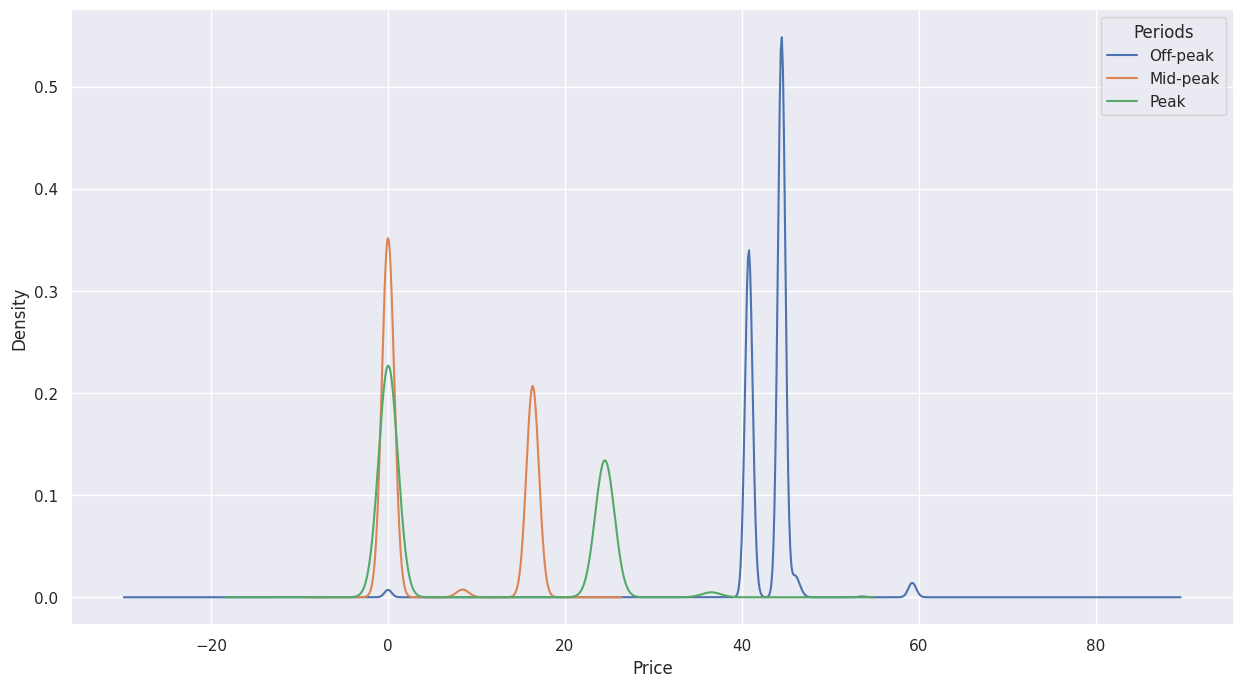

In [57]:
# Visualize the distribution of energy prices for different periods
price_variable = ['off_peak_price_component', 'mid_peak_price_component',
       'peak_price_component'] #['price_off_peak_var', 'price_mid_peak_var','price_peak_var' ] 
#for i in price_variable:
#sns.kdeplot(data = merged_df[price_variable], x= price_variable, hue = merged_df.churn)

merged_df[price_variable].plot(kind='kde')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Periods', labels=['Off-peak', 'Mid-peak' , 'Peak'])
plt.show()


# **Observations and Data Augmentation Requirements:**

#### **client.csv dataset**
1. There is some inconsistency in the distributions between the new feature created, **period_subscribed** and the dataset feature **num_years_antig**. I need additional information about num_years_antig to analyze this inconsistency, especially about what it represents.

2. Almost all contracts **(contract_end_year feature) end mostly in 2016** and the rest in 2017. Was the scope of this analysis limited to pre-2018 consumption? And did churn happen only in these two years? Need additional insight ito this.

3. There's a **sudden rise in subscriptions after the year 2009**, although the subsequent increase wasnt consistent. **95% of all subscriptions** took place after 2009.

4. **2, 3, & 4 (encoded) electricity campaigns** were the most effective for consumers.

5. **25% of channel_sales** has the value 'MISSING'. Need further information on whether this implies whether these were legacy customers or if data is not collected. Either way, I have encoded this using LabelEncoder() to preserve this information.

6. **Nearly 78%** have subscribed to 1 product and around 16% subscribed to 2 products (nb_prod_act).

7. **Nearly 10%** customers have churned in the period considered for this study.

8. Theres a **near consistent churn** among clients who have subscribed to 5 products or lesser and **zero churn** among those subscribed to more than 5.

9. Something happens **after 9th year of being subscribed.** Theres a decreasing trend of churn as customer age with PowerCo increases, but beyond 9 years, churn increases with age. Possible dissatisfaction / introduction of better products from suppliers other than PowerCo?

#### **price.csv dataset**

1. The variable description in the price.csv dataset uses the words 'energy' and 'power' for fix and var price features. Need clarity on whether this is mean to be used interchangeably or does this mean I'm supposed to engineer an new feature based on the relation between energy and power remains to be seen.

2. There seems to be something funny going on between fixed and var price features, despite the ambiguity in nomenclature. These relationships are worth exploring, because of some linear trends.

3. The price features with values as zero: Some sort of ambiguity in what these values represent. Were these clients provided free-service? Or were they simply missing/not-applicable observations? Need clarity from PowerCo.

4. **Feature definitions in price.csv dataset seem to be wrong** when comparing the data kernel density distribution with independent sources:
According to the information given below, price-off peak referes to a discounted price when theres low demand. However, the kde plot depicts the off-peak averages on the higher side. There's clearly some inconsistency here. Need further insights from PowerCo on this matter.

[energyaustralia](https://www.energyaustralia.com.au/home/electricity-and-gas/compare-electricity-and-gas-plans/what-peak-electricity)

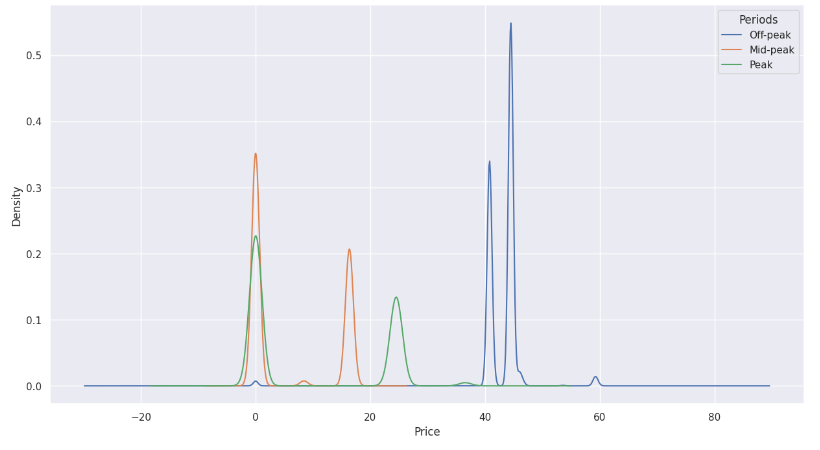

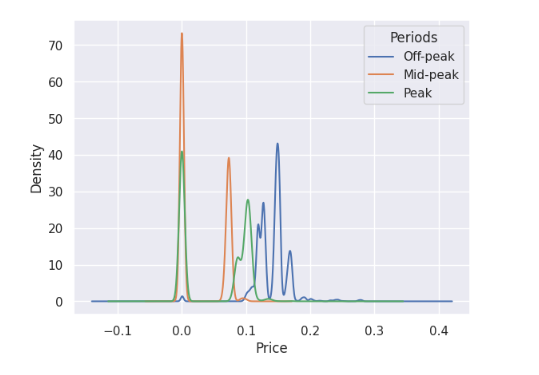

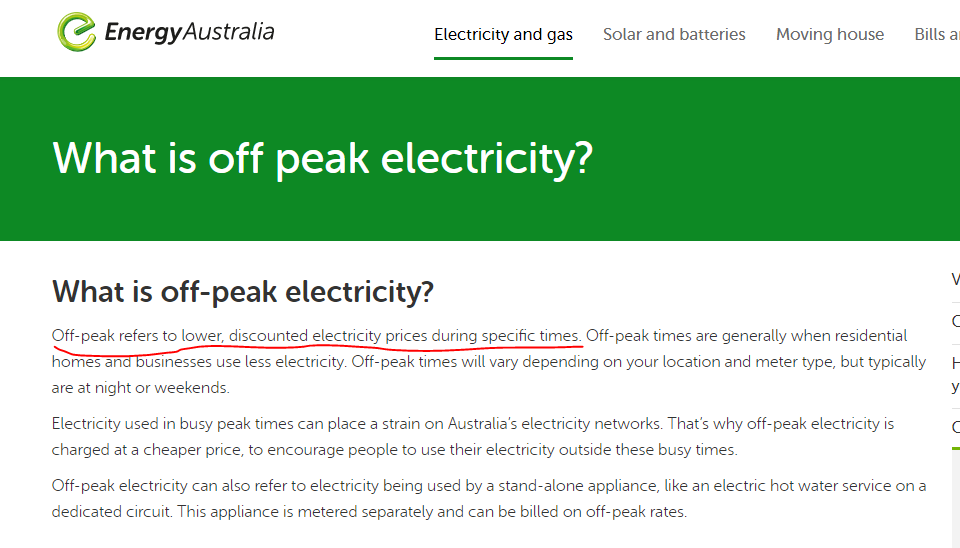






'''Define a function to calculate the price sensitivity of churn for a given reference price'''
def calculate_sensitivity(reference_price):
    '''# Calculate the PED for each customer'''
    data['ped'] = data.apply(lambda row: calculate_ped(row, reference_price), axis=1)
    '''# Calculate the average PED and churn rate for each PED bin'''
    ped_bins = pd.cut(data['ped'], bins=[-np.inf, -2.0, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0, np.inf], include_lowest=True)
    ped_bins_data = data.groupby(ped_bins).agg({'ped': 'mean', 'churn': 'mean', 'id': 'count'})
    '''# Plot the sensitivity curve'''
    plt.plot(ped_bins_data['ped'], ped_bins_data['churn'], label=f"Price = {reference_price}")
    plt.xlabel("Price Elasticity of Demand")
    plt.ylabel("Churn Rate")
    plt.legend()

'''# Calculate the sensitivity curve for different reference prices'''
reference_prices = [100, 80, 60, 40, 20]
for i in reference_prices:
    calculate_sensitivity(i)

plt.show()


### define a function to plot bar chart to display a feature's distribution with percent labels.
def plot_bar_chart_with_percent_label(df, target_variable, if_sort=False, gap_label_bar=0, figsize=(9,6)):
    # prepare data
    plot_data = client[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order, hue='churn')
    plt.xticks(rotation =45)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100), xy=(x, y), ha='center')
    ax.margins(y=0.1)
    plt.show();

### plot stacked bar chart with percent label by churn
def plot_stacked_bar_with_percent_label_by_churn(df, target_variable, if_sort=False, figsize=(9,6)):
    if target_variable != 'churn':
        plot_data = df.groupby([target_variable,'churn']).size().reset_index(name='count')
        plot_data = plot_data.pivot(index=target_variable, columns='churn', values='count').fillna(0)
        plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)
        if if_sort:
            plot_data = plot_data.sort_values(by=[0])
        ax = plot_data.plot(kind='bar', rot=False, stacked=True, figsize=figsize)
        plt.xticks(rotation=45)
        plt.legend(['stay', 'switch'], loc='upper center', ncol=2)
        # add label
        for p in ax.patches:
            percentage = '{:.1f}%'.format(p.get_height()*100)
            if percentage!='0.0%':
                x = p.get_x() + p.get_width()/2
                y = 1 - p.get_height()/1.8
                ax.annotate(text=percentage, xy=(x, y), ha='center')
        ax.margins(y=0.1)
        plt.show();